In [103]:
# file names with data
ifile = "Electron_gun_pTScan_full.root"

In [104]:
import ROOT

In [113]:
from scipy import stats

In [105]:
# import libraries
import uproot3 as uproot
import uproot as uproot4
import numpy as np
#import numba
import awkward as ak

In [106]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import                                                                                                                  
import mplhep as hep
plt.style.use(hep.style.ROOT)
import os,sys
import pandas as pd
from scipy.stats import halfnorm

In [107]:
from sklearn.cluster import KMeans
import random
from scipy.stats import binned_statistic
from scipy.optimize import curve_fit
from scipy.stats import crystalball
from lmfit import Model
import copy
#from coffea import hist

In [108]:
# Process Data
def getData(fname="", procName="Events"):
    kn_dict = uproot.open(fname)["Events"].arrays()
    kn_dict_ak1 = {name.decode(): ak.from_awkward0(array) for name, array in kn_dict.items()}
    kn_events = ak.zip({"Tracks":ak.zip({
                                      "n_tracks":   kn_dict_ak1["n_tracks"],
                                        "truthtrack_x_st3":   kn_dict_ak1["truthtrack_x_st3"],
                                        "truthtrack_y_st3":   kn_dict_ak1["truthtrack_y_st3"],
                                        "truthtrack_z_st3":   kn_dict_ak1["truthtrack_z_st3"],
                                        "truthtrack_x_st1":   kn_dict_ak1["truthtrack_x_st1"],
                                        "truthtrack_y_st1":   kn_dict_ak1["truthtrack_y_st1"],
                                        "truthtrack_z_st1":   kn_dict_ak1["truthtrack_z_st1"],
                                        "truthtrack_x_vtx":   kn_dict_ak1["truthtrack_x_vtx"],
                                        "truthtrack_y_vtx":   kn_dict_ak1["truthtrack_y_vtx"],
                                        "truthtrack_z_vtx":   kn_dict_ak1["truthtrack_z_vtx"],
                                      }),
                        "RecoTracks":ak.zip({
                                      "n_tracks":   kn_dict_ak1["n_tracks"],
                                        "track_x_CAL":   kn_dict_ak1["track_x_CAL"],
                                        "track_y_CAL":   kn_dict_ak1["track_y_CAL"],
                                      }),
                        "Electrons":ak.zip({
                                            "ge":      kn_dict_ak1["ge"],
                                            "gvx":      kn_dict_ak1["gvx"],
                                            "gvy":      kn_dict_ak1["gvy"],
                                            "gvz":      kn_dict_ak1["gvz"],
                                            "gpx":      kn_dict_ak1["gpx"],
                                            "gpy":      kn_dict_ak1["gpy"],
                                            "gpz":      kn_dict_ak1["gpz"],
                                        }),
                       }, depth_limit=1)
    return kn_events

In [100]:
kn_events = getData(ifile,"Events")

In [15]:
print(kn_events[:5]["Electrons"].ge)
print(kn_events[:5]["Electrons"].gpx)
print(kn_events[:5]["Tracks"].n_tracks)

[[10.5], [41.6], [49.1], [36.3], [3.52]]
[[3.26], [0.349], [0.292], [2.38], [-1.21]]
[0, 0, 0, 1, 0]


In [80]:
print(kn_events["Tracks"].n_tracks)

[[0], [0], [0], [1], [0], [0], [1], [0], ... [1], [0], [0], [0], [0], [0], [0], [1]]


In [88]:
print(kn_events["RecoTracks"].n_tracks)
print(kn_events["RecoTracks"].track_x_CAL)

[[], [], [], [1], [], [], [1], [], [], ... [], [1], [], [], [], [], [], [], [1]]
[[], [], [], [102], [], [], [73.7], [], ... [43.9], [], [], [], [], [], [], [33.6]]


In [36]:
#plt.hist(kn_events[:]["Electrons"].gpx)

In [37]:
#plt.hist(kn_events[:]["Tracks"].n_tracks)

In [101]:
pxs = []
pys = []
pzs = []
truthtrackX = []
truthtrackXst1 = []
ntracks = []
px_for_CAL = []
TTX_for_CAL = []
x_for_CAL = []
for i in range(0,100000):
    pxs.append(kn_events[i]["Electrons"].gpx[0])
    pys.append(kn_events[i]["Electrons"].gpy[0])
    pzs.append(kn_events[i]["Electrons"].gpz[0])
    ntracks.append(kn_events[i]["Tracks"].n_tracks[0])
    truthtrackX.append(kn_events[i]["Tracks"].truthtrack_x_st3[0])
    truthtrackXst1.append(kn_events[i]["Tracks"].truthtrack_x_st1[0])
    if(kn_events[i]["Tracks"].n_tracks[0] == 1):
        px_for_CAL.append(kn_events[i]["Electrons"].gpx[0])
        TTX_for_CAL.append(kn_events[i]["Tracks"].truthtrack_x_st3[0])
        x_for_CAL.append(kn_events[i]["RecoTracks"].track_x_CAL[0])

#stats.binned_statistic(np.array(pxs), np.array(ntracks), statistic='mean',bins=10)

In [42]:
#print(truthtrackX[:100])

In [41]:
#stats.binned_statistic(np.array(pxs), np.array(ntracks), statistic='mean',bins=20)[0]

In [40]:
#bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(pxs), np.array(ntracks), statistic='mean',bins=20)
#plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=2, label='binned statistic of data')
#plt.hlines(np.arange(-5,5,.2), stats.binned_statistic(np.array(pxs), np.array(ntracks), statistic='mean',bins=50).statistic)

Text(0, 1, 'Fraction of events with reconstructed track')

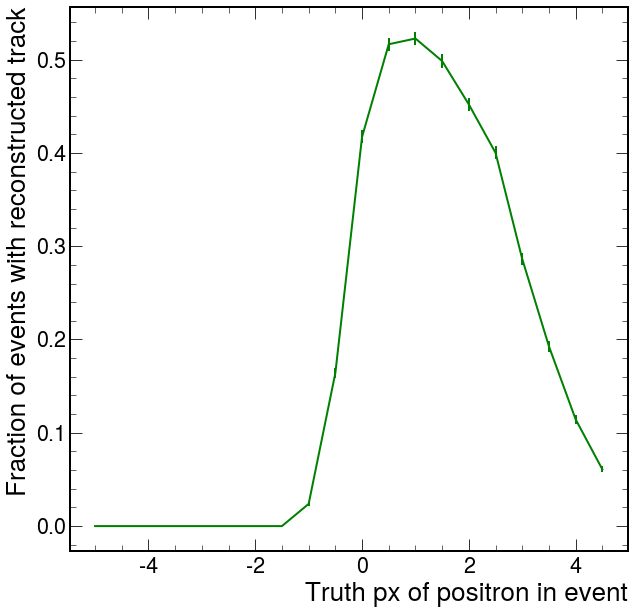

In [25]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(pxs), np.array(ntracks), statistic='mean',bins=20)
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pxs), np.array(ntracks), statistic='std',bins=20)
counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
plt.xlabel('Truth px of positron in event')
plt.ylabel('Fraction of events with reconstructed track')

In [72]:
print(len(bin_edges[:20]))
print(len(bin_means))

20
20


In [87]:
print(binnumber)
print(len(binnumber))
print(len([np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]))

[17 11 11 ...  6 18 12]
100000
20


Text(0, 1, 'Fraction of events with reconstructed track')

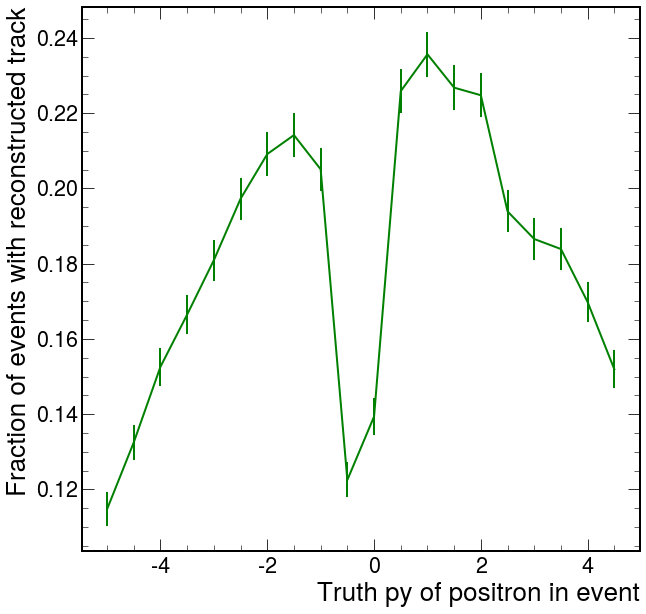

In [26]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(pys), np.array(ntracks), statistic='mean',bins=20)
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pys), np.array(ntracks), statistic='std',bins=20)
counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
plt.xlabel('Truth py of positron in event')
plt.ylabel('Fraction of events with reconstructed track')

Text(0, 1, 'Fraction of events with reconstructed track')

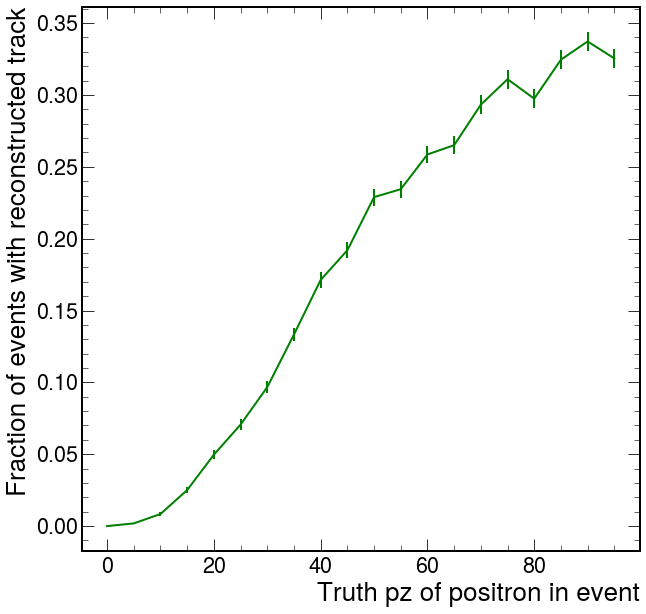

In [27]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(pzs), np.array(ntracks), statistic='mean',bins=20)
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pzs), np.array(ntracks), statistic='std',bins=20)
counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
plt.xlabel('Truth pz of positron in event')
plt.ylabel('Fraction of events with reconstructed track')

Text(0, 1, 'Truth pz of positron in event')

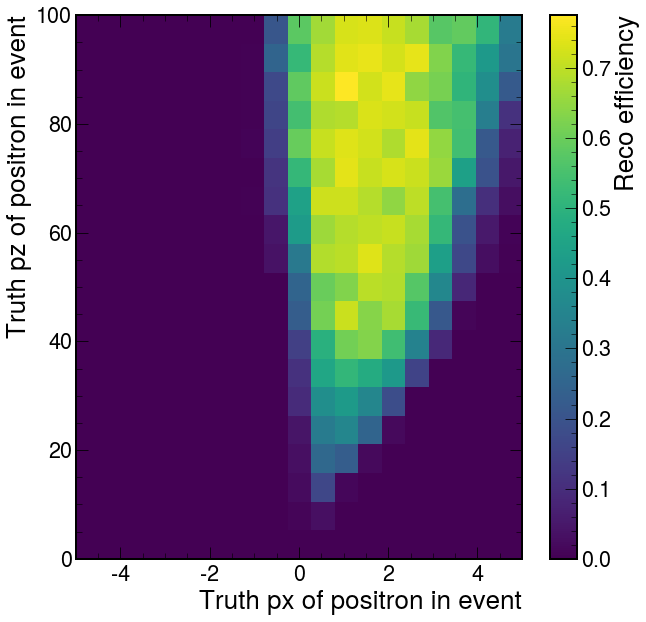

In [32]:
x_bins = np.linspace(-5, 5, 20)
y_bins = np.linspace(0, 100, 20)
bin_means = stats.binned_statistic_2d(np.array(pxs), np.array(pzs), np.array(ntracks), statistic='mean',bins=[x_bins, y_bins])
#bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pzs), np.array(ntracks), statistic='std',bins=20)
#counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
#plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
im = plt.imshow(np.flip(bin_means.statistic.T,0), extent=(-5, 5, 0, 100), aspect='auto')
#cax = plt.axes([.95, .15, .075, .7])
#plt.colorbar(cax=cax)
plt.colorbar(im, label='Reco efficiency')
plt.xlabel('Truth px of positron in event')
plt.ylabel('Truth pz of positron in event')

Text(0, 1, 'Truth pz of positron in event')

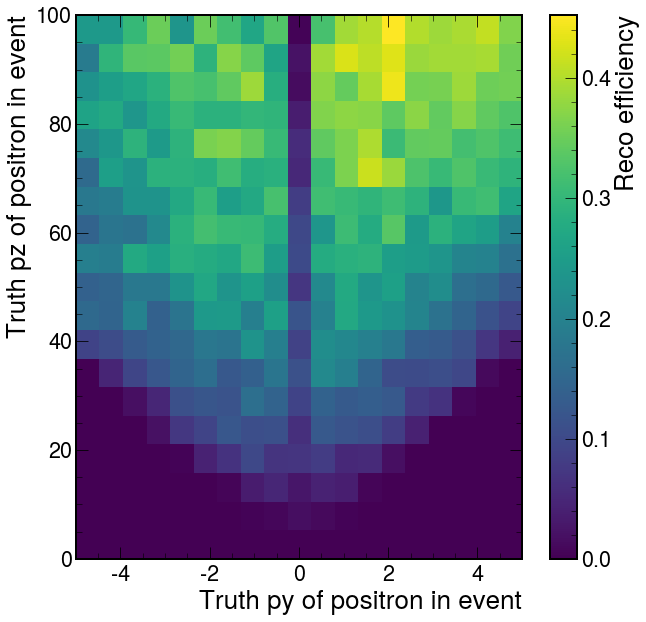

In [35]:
x_bins = np.linspace(-5, 5, 20)
y_bins = np.linspace(0, 100, 20)
bin_means = stats.binned_statistic_2d(np.array(pys), np.array(pzs), np.array(ntracks), statistic='mean',bins=[x_bins, y_bins])
#bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pzs), np.array(ntracks), statistic='std',bins=20)
#counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
#plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
im = plt.imshow(np.flip(bin_means.statistic.T,0), extent=(-5, 5, 0, 100), aspect='auto')
#cax = plt.axes([.95, .15, .075, .7])
#plt.colorbar(cax=cax)
plt.colorbar(im, label='Reco efficiency')
plt.xlabel('Truth py of positron in event')
plt.ylabel('Truth pz of positron in event')

Text(0, 1, 'Truth pz of positron in event')

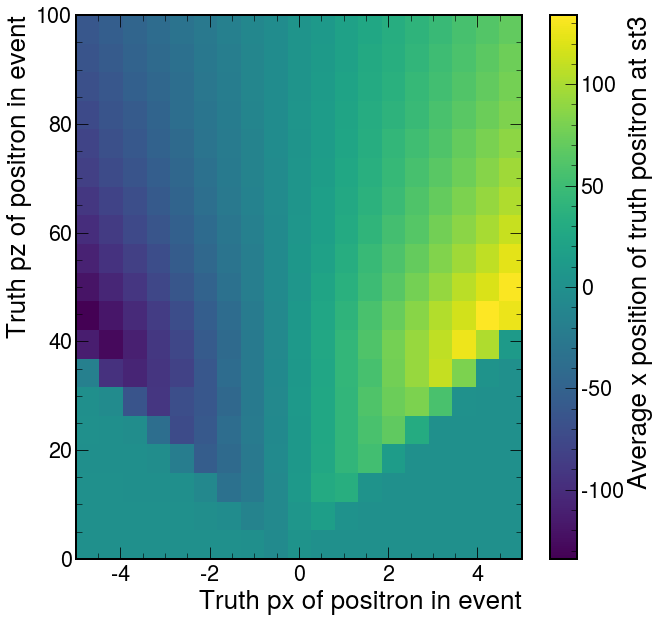

In [34]:
x_bins = np.linspace(-5, 5, 20)
y_bins = np.linspace(0, 100, 20)
bin_means = stats.binned_statistic_2d(np.array(pxs), np.array(pzs), np.array(truthtrackX), statistic='mean',bins=[x_bins, y_bins])
#bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pzs), np.array(ntracks), statistic='std',bins=20)
#counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
#plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
im = plt.imshow(np.flip(bin_means.statistic.T,0), extent=(-5, 5, 0, 100), aspect='auto')
#cax = plt.axes([.95, .15, .075, .7])
#plt.colorbar(cax=cax)
plt.colorbar(im, label='Average x position of truth positron at st3')
plt.xlabel('Truth px of positron in event')
plt.ylabel('Truth pz of positron in event')

Text(0, 1, 'Truth pz of positron in event')

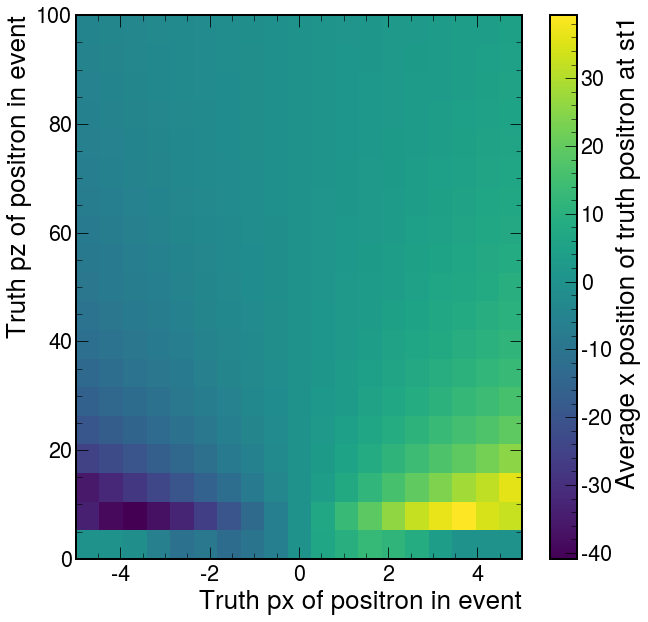

In [102]:
x_bins = np.linspace(-5, 5, 20)
y_bins = np.linspace(0, 100, 20)
bin_means = stats.binned_statistic_2d(np.array(pxs), np.array(pzs), np.array(truthtrackXst1), statistic='mean',bins=[x_bins, y_bins])
#bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pzs), np.array(ntracks), statistic='std',bins=20)
#counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
#plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
im = plt.imshow(np.flip(bin_means.statistic.T,0), extent=(-5, 5, 0, 100), aspect='auto')
#cax = plt.axes([.95, .15, .075, .7])
#plt.colorbar(cax=cax)
plt.colorbar(im, label='Average x position of truth positron at st1')
plt.xlabel('Truth px of positron in event')
plt.ylabel('Truth pz of positron in event')

In [121]:
# file names with data
ifileCH = "Electron_gun_pTScan_HighPZ_full_NOEXTRAPO.root"

In [122]:
kn_eventsCH = getData(ifileCH,"Events")

In [124]:
pxsch = []
pysch = []
pzsch = []
truthtrackXch = []
truthtrackXst1ch = []
ntracksch = []
px_for_CALch = []
TTX_for_CALch = []
x_for_CALch = []
for i in range(0,9000):
    pxsch.append(kn_eventsCH[i]["Electrons"].gpx[0])
    pysch.append(kn_eventsCH[i]["Electrons"].gpy[0])
    pzsch.append(kn_eventsCH[i]["Electrons"].gpz[0])
    ntracksch.append(kn_eventsCH[i]["Tracks"].n_tracks[0])
    truthtrackXch.append(kn_eventsCH[i]["Tracks"].truthtrack_x_st3[0])
    truthtrackXst1ch.append(kn_eventsCH[i]["Tracks"].truthtrack_x_st1[0])
    if(kn_eventsCH[i]["Tracks"].n_tracks[0] == 1):
        px_for_CALch.append(kn_eventsCH[i]["Electrons"].gpx[0])
        TTX_for_CALch.append(kn_eventsCH[i]["Tracks"].truthtrack_x_st3[0])
        x_for_CALch.append(kn_eventsCH[i]["RecoTracks"].track_x_CAL[0])

Text(0, 1, 'Fraction of events with reconstructed track')

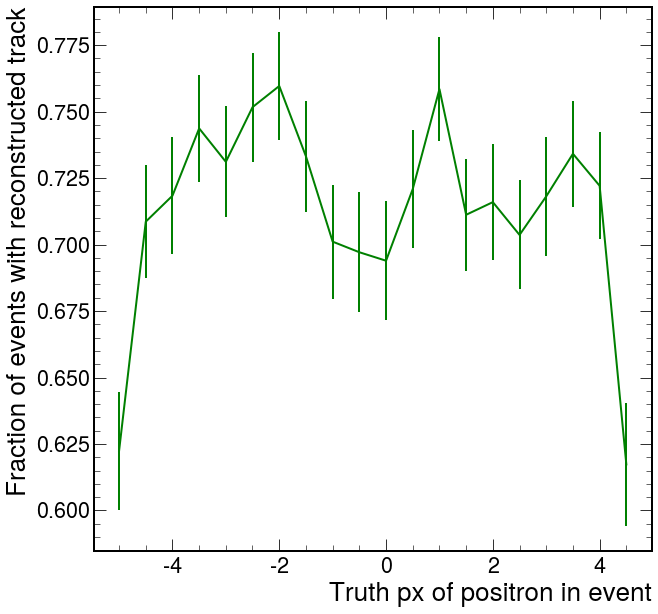

In [125]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(pxsch), np.array(ntracksch), statistic='mean',bins=20)
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pxsch), np.array(ntracksch), statistic='std',bins=20)
counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
plt.xlabel('Truth px of positron in event')
plt.ylabel('Fraction of events with reconstructed track')

Text(0, 1, 'Truth pz of positron in event')

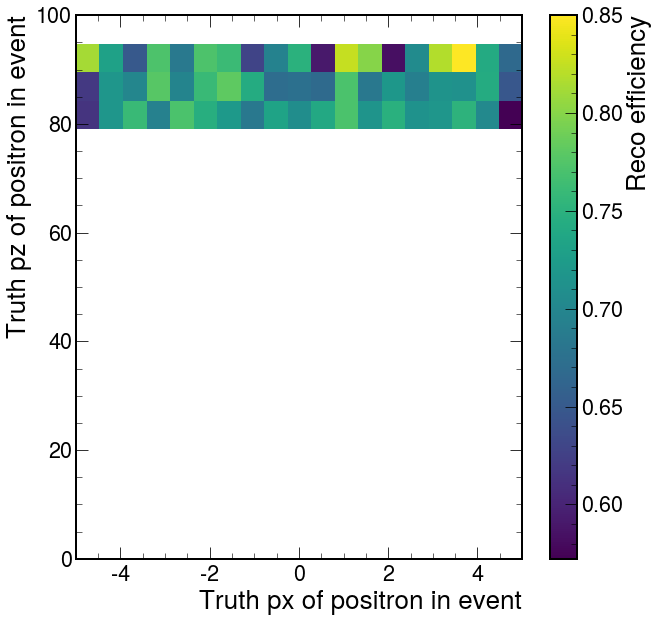

In [126]:
x_bins = np.linspace(-5, 5, 20)
y_bins = np.linspace(0, 100, 20)
bin_means = stats.binned_statistic_2d(np.array(pxsch), np.array(pzsch), np.array(ntracksch), statistic='mean',bins=[x_bins, y_bins])
im = plt.imshow(np.flip(bin_means.statistic.T,0), extent=(-5, 5, 0, 100), aspect='auto')
plt.colorbar(im, label='Reco efficiency')
plt.xlabel('Truth px of positron in event')
plt.ylabel('Truth pz of positron in event')

In [60]:
ifile2 = "Electron_gun_vtxScan_full.root"

In [61]:
kn_events2 = getData(ifile2,"Events")

In [62]:
pxs = []
pys = []
pzs = []
truthtrack_vtxX = []
truthtrack_vtxY = []
ntracks = []
for i in range(0,100000):
    pxs.append(kn_events2[i]["Electrons"].gpx[0])
    pys.append(kn_events2[i]["Electrons"].gpy[0])
    pzs.append(kn_events2[i]["Electrons"].gpz[0])
    ntracks.append(kn_events2[i]["Tracks"].n_tracks[0])
    truthtrack_vtxX.append(kn_events2[i]["Tracks"].truthtrack_x_vtx[0])
    truthtrack_vtxY.append(kn_events2[i]["Tracks"].truthtrack_y_vtx[0])

Text(0, 1, 'Fraction of events with reconstructed track')

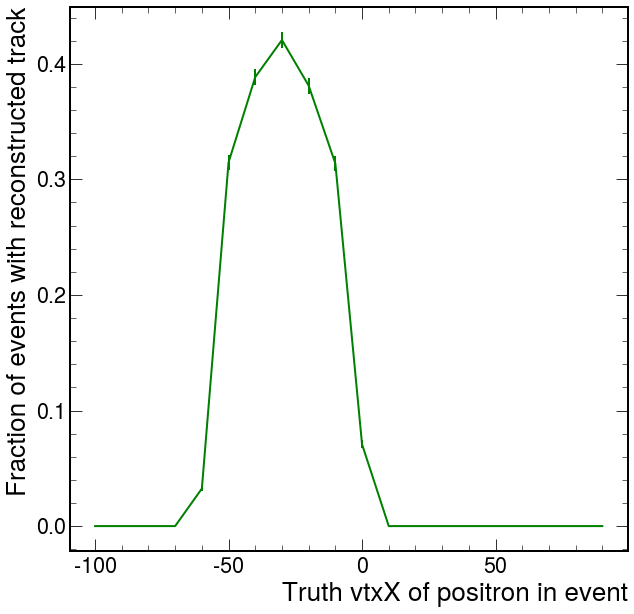

In [52]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(truthtrack_vtxX), np.array(ntracks), statistic='mean',bins=20)
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(truthtrack_vtxX), np.array(ntracks), statistic='std',bins=20)
counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
plt.xlabel('Truth vtxX of positron in event')
plt.ylabel('Fraction of events with reconstructed track')

Text(0, 1, 'Fraction of events with reconstructed track')

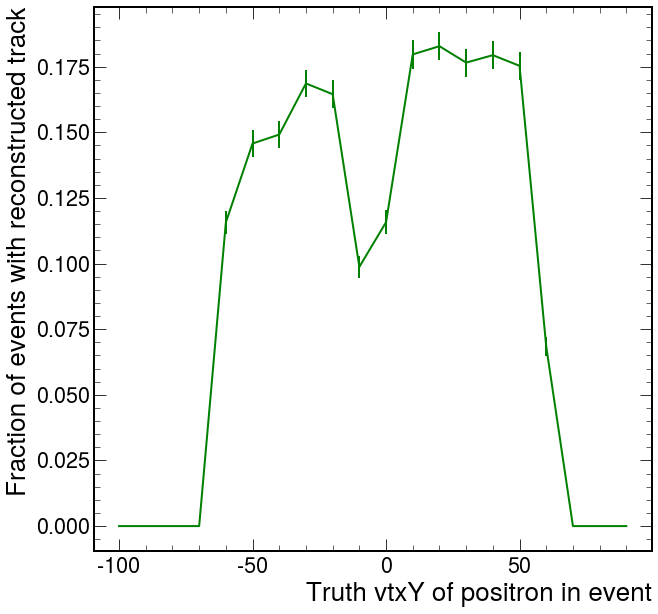

In [53]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(truthtrack_vtxY), np.array(ntracks), statistic='mean',bins=20)
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(truthtrack_vtxY), np.array(ntracks), statistic='std',bins=20)
counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
plt.xlabel('Truth vtxY of positron in event')
plt.ylabel('Fraction of events with reconstructed track')

Text(0, 1, 'Truth vtxY of positron in event')

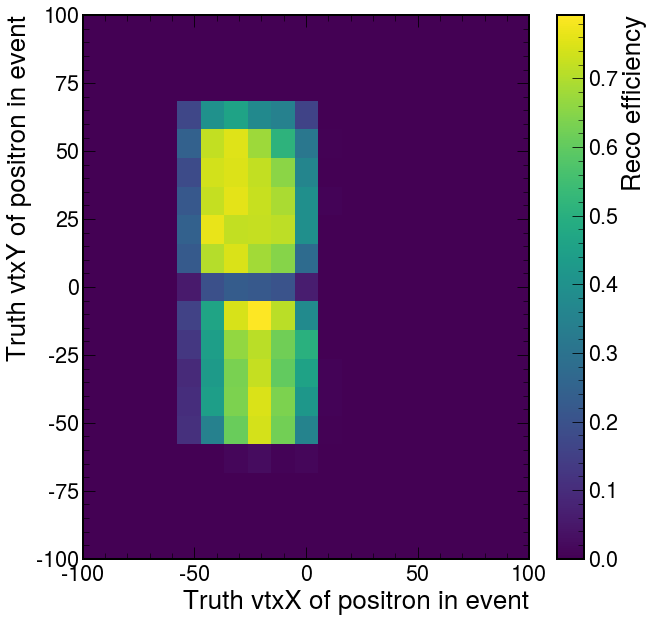

In [55]:
x_bins = np.linspace(-100, 100, 20)
y_bins = np.linspace(-100, 100, 20)
bin_means = stats.binned_statistic_2d(np.array(truthtrack_vtxX), np.array(truthtrack_vtxY), np.array(ntracks), statistic='mean',bins=[x_bins, y_bins])
#bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(pzs), np.array(ntracks), statistic='std',bins=20)
#counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
#plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
im = plt.imshow(np.flip(bin_means.statistic.T,0), extent=(-100, 100, -100, 100), aspect='auto')
#cax = plt.axes([.95, .15, .075, .7])
#plt.colorbar(cax=cax)
plt.colorbar(im, label='Reco efficiency')
plt.xlabel('Truth vtxX of positron in event')
plt.ylabel('Truth vtxY of positron in event')

In [56]:
ifile3 = "Electron_gun_vtxZScan_full.root"

In [57]:
kn_events3 = getData(ifile3,"Events")

In [58]:
pxs = []
pys = []
pzs = []
truthtrack_vtxX = []
truthtrack_vtxY = []
truthtrack_vtxZ = []
ntracks = []
for i in range(0,100000):
    pxs.append(kn_events3[i]["Electrons"].gpx[0])
    pys.append(kn_events3[i]["Electrons"].gpy[0])
    pzs.append(kn_events3[i]["Electrons"].gpz[0])
    ntracks.append(kn_events3[i]["Tracks"].n_tracks[0])
    truthtrack_vtxX.append(kn_events3[i]["Tracks"].truthtrack_x_vtx[0])
    truthtrack_vtxY.append(kn_events3[i]["Tracks"].truthtrack_y_vtx[0])
    truthtrack_vtxZ.append(kn_events3[i]["Tracks"].truthtrack_z_vtx[0])

Text(0, 1, 'Fraction of events with reconstructed track')

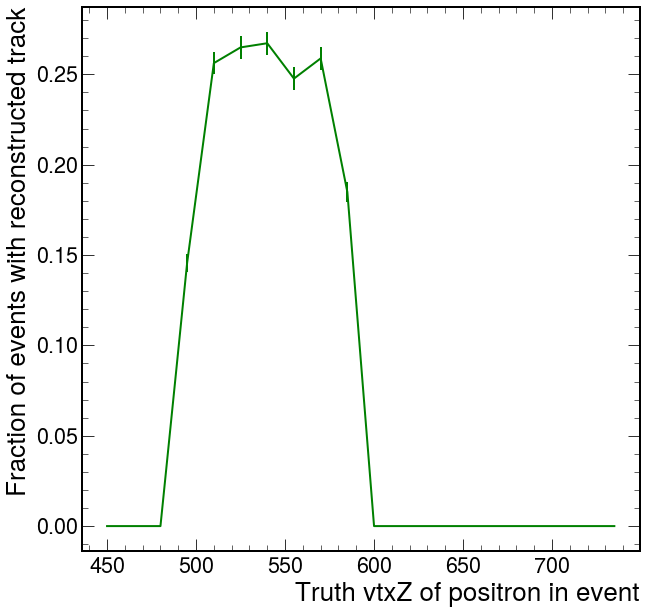

In [59]:
bin_means, bin_edges, binnumber = stats.binned_statistic(np.array(truthtrack_vtxZ), np.array(ntracks), statistic='mean',bins=20)
bin_stds, bin_edges, binnumber = stats.binned_statistic(np.array(truthtrack_vtxZ), np.array(ntracks), statistic='std',bins=20)
counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
plt.errorbar(bin_edges[:20], bin_means, bin_stds/np.sqrt(counts), color='g', lw=2, label='binned statistic of data')
plt.xlabel('Truth vtxZ of positron in event')
plt.ylabel('Fraction of events with reconstructed track')

In [139]:
print(np.flip(bin_means.statistic.T,0))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.20652174 0.57912458 0.66901408 0.72762646
  0.73431734 0.70930233 0.6745098  0.57407407 0.58802817 0.51020408
  0.32094595]
 [0.         0.         0.         0.         0.         0.
  0.         0.00387597 0.25085911 0.51851852 0.69       0.74087591
  0.7480916  0.72483221 0.74503311 0.62698413 0.51986755 0.41549296
  0.3024055 ]
 [0.         0.         0.         0.         0.         0.
  0.         0.00325733 0.1704918  0.58571429 0.71323529 0.77508651
  0.72202166 0.74637681 0.64561404 0.61594203 0.50840336 0.38434164
  0.2189781 ]
 [0.         0.         0.         0.         0.         0.
  0.         0.00371747 0.16064257 0.54212454 0.68301887 0.6875
  0.73021583 0.72118959 0.71052632 0.56551724 0.54511278 0.33105802
  0.11026616]
 [0.         0.         0.         0.         0.         0.
  0.         0.00719424 0.14233577 0.59558824 0.71119134 0.73605948
  0.72262774 0.68421053 0.7440273  0

In [134]:
print(bin_means.statistic.T)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.01145038 0.03292181 0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.0239726  0.16483516 0.01428571
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.03088803 0.26258993 0.22857143
  0.02097902 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.04362416 0.32352941 0.35460993
  0.25079365 0.01886792 0.         0.         0.         0.
  0.        ]
 [0.  

In [22]:
# Process Data
def getData(fname="", procName="Events"):
    kn_dict = uproot.open(fname)["Events"].arrays()
    kn_dict_ak1 = {name.decode(): ak.from_awkward0(array) for name, array in kn_dict.items()}
    kn_events = ak.zip({"Hits":ak.zip({
                                      "detID":   kn_dict_ak1["hit_detID"],
                                      "edep":    kn_dict_ak1["hit_edep"],
                                      "elmID":   kn_dict_ak1["hit_elmID"],
                                      "truthx":  kn_dict_ak1["hit_truthx"],
                                      "truthy":  kn_dict_ak1["hit_truthy"],
                                      "truthz":  kn_dict_ak1["hit_truthz"],
                                      }),
                        "Electrons":ak.zip({
                                            "ge":      kn_dict_ak1["ge"],
                                        }),
                       }, depth_limit=1)
    return kn_events

In [23]:
# Create selections/masks
def emcal_selection(arr):
    mask = (arr.detID == 100)
    return mask

def h2_selection(arr):
    mask = (arr.detID >= 35) & (arr.detID <= 38)
    return mask

def st2_selection(arr):
    mask = (arr.detID >= 13) & (arr.detID <= 18)
    return mask

def st3_selection(arr):
    mask = (arr.detID >= 19) & (arr.detID <= 30)
    return mask

def h4_selection(arr):
    mask = (arr.detID >= 41) & (arr.detID <= 46)
    return mask

In [24]:
def printemcalhits_byevent(ifile):
    kn_events = getData(ifile,"Events")
    kn_hits = kn_events["Hits"]
    ecal_mask = ak.any(kn_hits.detID == 100, axis=1)
    ecal_index = np.where(ecal_mask)
    print('Fraction of events with hits reaching EMCAL: ',len(ecal_index[0])/len(kn_events))
    print("Let's print the evt numbers we can use to plot EMCAL clusters")
    print('Indices of evts w. EMCAL hits:',ecal_index)

In [25]:
# load data
kn_events = getData(ifile,"Events")

In [26]:
def emcal_byevent(ifile,evtNum):
    # set up EMCAL
    ntowersx=72
    ntowersy=36
    sizex=5.53 # in cm
    sizey=5.53 # in cm

    ecalx=[-200,200] #size in cm
    ecaly=[-100,100]
    binsx=ecalx[1]-ecalx[0]
    binsy=ecaly[1]-ecaly[0]
    
    kn_hits = kn_events[evtNum]["Hits"]
    kn_electrons = kn_events[evtNum]["Electrons"]
    
    ge = kn_electrons.ge # truth energy
    
    emcal_mask = emcal_selection(kn_hits)
    emcal_hits = kn_hits[emcal_mask]
    emcal_towerx = emcal_hits.elmID//ntowersy
    emcal_towery = emcal_hits.elmID%ntowersy
    emcal_truthx = emcal_hits.truthx
    emcal_truthy = emcal_hits.truthy
    emcal_x = ecalx[0]+emcal_towerx*sizex
    emcal_y = ecaly[0]+emcal_towery*sizey
    emcal_edep = emcal_hits.edep
    
    st3_mask = st3_selection(kn_hits)
    st3_hits = kn_hits[st3_mask]

    st2_mask = st2_selection(kn_hits)
    st2_hits = kn_hits[st2_mask]
    st2_truthx = st2_hits.truthx
    st2_truthy = st2_hits.truthy
    
    h2_mask = h2_selection(kn_hits)
    h2_hits = kn_hits[h2_mask]
    
    print("St3 hits %i, St2 hits %i, H2 hits %i"%(len(st3_hits),len(st2_hits),len(h2_hits)))
    print("Event "+str(evtNum)+": "+str(len(emcal_hits))+" hits")
    
    energy_weights = np.divide(np.array(emcal_edep),np.max(emcal_edep))
    
    # kmeans clustering
    
    # find best number of clusters
    wcss = 0
    wcss_list = []
    for k in range(1,11): # preform kmeans on 1-10 clusters to determine best number
        if k <= len(emcal_hits):
            kmeans = KMeans(n_clusters=k,random_state=0,max_iter=1000)
            X = np.vstack((np.array(emcal_x), np.array(emcal_y))).T
            Y = energy_weights
            wt_kmeansclus = kmeans.fit(X,sample_weight = Y)
            predicted_kmeans = kmeans.predict(X, sample_weight = Y)
            centers = wt_kmeansclus.cluster_centers_
            wcss_test = wt_kmeansclus.inertia_
            wcss_list.append(wcss_test)
        if abs(wcss_test-wcss) > 500 or wcss == 0: # if the next number of clusters improved significantly from before
            wcss = wcss_test
            optimal_num_clusters = k
            
    if len(emcal_hits) >= optimal_num_clusters: # if more hits than optimal # clusters proceed normally
        kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0, max_iter=1000)
    else: # if less hits that optimal # clusters make optimal # clusters = # hits
        print("Defaulting to 'emcal_hits' # of clusters")
        optimal_num_clusters = len(emcal_hits)
        kmeans = KMeans(n_clusters= optimal_num_clusters, random_state=0, max_iter=1000)
        
    X = np.vstack((np.array(emcal_x), np.array(emcal_y))).T
    Y = energy_weights
    wt_kmeansclus = kmeans.fit(X,sample_weight = Y)
    predicted_kmeans = kmeans.predict(X, sample_weight = Y)
    
    # energy weighted mean position
    sfc = .1135
    energy_weighted_mean_pos = []
    e_tot_cluster = []
    cells = []
    for i in range(optimal_num_clusters): # for each cluster
        e_weight_x = 0
        e_weight_y = 0
        e_tot = 0
        num_cells = 0
        for j in range(len(predicted_kmeans)): # for each hit
            if predicted_kmeans[j] == i: # check if hit belongs to cluster
                num_cells += 1 # update info
                e_tot += emcal_edep[j]
                e_weight_x += (emcal_edep[j])*X[:,0][j]
                e_weight_y += (emcal_edep[j])*X[:,1][j]
        
        energy_weighted_mean_pos.append([e_weight_x/e_tot,e_weight_y/e_tot])
        e_tot_cluster.append(e_tot)
        cells.append(num_cells)
    
    # energy weighted width calculation
    e_weight_width = []
    e_weight_width_r = []
    for i in range(optimal_num_clusters): # for each cluster
        x_mean = energy_weighted_mean_pos[i][0]
        y_mean = energy_weighted_mean_pos[i][1]
        e_width_x = 0
        e_width_y = 0
        e_width_r = 0
        for j in range(len(predicted_kmeans)): # for each hit
            if predicted_kmeans[j] == i: # if hit corresponds to cluster then update info
                e_width_x += (emcal_edep[j])*(X[:,0][j]-x_mean)**2
                e_width_y += (emcal_edep[j])*(X[:,1][j]-y_mean)**2
                vec_magnitude = ((X[:,0][j]-x_mean)**2 + (X[:,1][j]-y_mean)**2)**(1/2)
                e_width_r += (emcal_edep[j])*((vec_magnitude)**2)

        e_weight_width.append([(e_width_x/e_tot_cluster[i])**(1/2),(e_width_y/e_tot_cluster[i])**(1/2)])
        e_weight_width_r.append((e_width_r/e_tot_cluster[i])**(1/2))
    
    # truth energy
    particle_energy = ge[0]
    
    return (optimal_num_clusters,e_weight_width,e_weight_width_r,e_tot_cluster,particle_energy)

In [27]:
# run analysis
kn_hits = kn_events["Hits"]
ecal_mask = ak.any(kn_hits.detID == 100, axis=1)
ecal_index = np.where(ecal_mask)
events = ecal_index[0]

cluster_energies = []
particle_energy = []
event_energy = []
energy_residual = []
energy_resolution = []

for i in events:
    print('Event #'+str(i))
    event_data = emcal_byevent(ifile,i)
    num_clusters = event_data[0]
    truth_energy = event_data[4]
    particle_energy.append(truth_energy)
    
    reco_hits_energy = 0
    for j in range(num_clusters):
        cluster_energy = event_data[3][j]
        cluster_energies.append(cluster_energy)
        reco_hits_energy += cluster_energy
    event_energy.append(reco_hits_energy)
    energy_residual.append(reco_hits_energy - truth_energy)
    energy_resolution.append((reco_hits_energy - truth_energy)/(truth_energy))

Event #0
St3 hits 0, St2 hits 0, H2 hits 0
Event 0: 54 hits
Event #1
St3 hits 0, St2 hits 0, H2 hits 0
Event 1: 42 hits
Event #2
St3 hits 0, St2 hits 0, H2 hits 0
Event 2: 42 hits
Event #3
St3 hits 0, St2 hits 0, H2 hits 0
Event 3: 46 hits
Event #4
St3 hits 0, St2 hits 0, H2 hits 0
Event 4: 24 hits
Event #5
St3 hits 0, St2 hits 0, H2 hits 0
Event 5: 32 hits
Event #6
St3 hits 0, St2 hits 0, H2 hits 0
Event 6: 55 hits
Event #7
St3 hits 0, St2 hits 0, H2 hits 0
Event 7: 51 hits
Event #8
St3 hits 0, St2 hits 0, H2 hits 0
Event 8: 54 hits
Event #9
St3 hits 0, St2 hits 0, H2 hits 0
Event 9: 52 hits
Event #10
St3 hits 0, St2 hits 0, H2 hits 0
Event 10: 36 hits
Event #11
St3 hits 0, St2 hits 0, H2 hits 0
Event 11: 43 hits
Event #12
St3 hits 0, St2 hits 0, H2 hits 0
Event 12: 43 hits
Event #13
St3 hits 0, St2 hits 0, H2 hits 0
Event 13: 41 hits
Event #14
St3 hits 0, St2 hits 0, H2 hits 0
Event 14: 22 hits
Event #15
St3 hits 0, St2 hits 0, H2 hits 0
Event 15: 47 hits
Event #16
St3 hits 0, St2 hi

Event #132
St3 hits 0, St2 hits 0, H2 hits 0
Event 132: 43 hits
Event #133
St3 hits 0, St2 hits 0, H2 hits 0
Event 133: 39 hits
Event #134
St3 hits 0, St2 hits 0, H2 hits 0
Event 134: 62 hits
Event #135
St3 hits 0, St2 hits 0, H2 hits 0
Event 135: 33 hits
Event #136
St3 hits 0, St2 hits 0, H2 hits 0
Event 136: 40 hits
Event #137
St3 hits 0, St2 hits 0, H2 hits 0
Event 137: 40 hits
Event #138
St3 hits 0, St2 hits 0, H2 hits 0
Event 138: 47 hits
Event #139
St3 hits 0, St2 hits 0, H2 hits 0
Event 139: 42 hits
Event #140
St3 hits 0, St2 hits 0, H2 hits 0
Event 140: 47 hits
Event #141
St3 hits 0, St2 hits 0, H2 hits 0
Event 141: 17 hits
Event #142
St3 hits 0, St2 hits 0, H2 hits 0
Event 142: 31 hits
Event #143
St3 hits 0, St2 hits 0, H2 hits 0
Event 143: 24 hits
Event #144
St3 hits 0, St2 hits 0, H2 hits 0
Event 144: 43 hits
Event #145
St3 hits 0, St2 hits 0, H2 hits 0
Event 145: 45 hits
Event #146
St3 hits 0, St2 hits 0, H2 hits 0
Event 146: 44 hits
Event #147
St3 hits 0, St2 hits 0, H2 hi

Event #261
St3 hits 0, St2 hits 0, H2 hits 0
Event 261: 27 hits
Event #262
St3 hits 0, St2 hits 0, H2 hits 0
Event 262: 54 hits
Event #263
St3 hits 0, St2 hits 0, H2 hits 0
Event 263: 26 hits
Event #264
St3 hits 0, St2 hits 0, H2 hits 0
Event 264: 36 hits
Event #265
St3 hits 0, St2 hits 0, H2 hits 0
Event 265: 51 hits
Event #266
St3 hits 0, St2 hits 0, H2 hits 0
Event 266: 32 hits
Event #267
St3 hits 0, St2 hits 0, H2 hits 0
Event 267: 22 hits
Event #268
St3 hits 0, St2 hits 0, H2 hits 0
Event 268: 56 hits
Event #269
St3 hits 0, St2 hits 0, H2 hits 0
Event 269: 35 hits
Event #270
St3 hits 0, St2 hits 0, H2 hits 0
Event 270: 31 hits
Event #271
St3 hits 0, St2 hits 0, H2 hits 0
Event 271: 21 hits
Event #272
St3 hits 0, St2 hits 0, H2 hits 0
Event 272: 18 hits
Event #273
St3 hits 0, St2 hits 0, H2 hits 0
Event 273: 28 hits
Event #274
St3 hits 0, St2 hits 0, H2 hits 0
Event 274: 35 hits
Event #275
St3 hits 0, St2 hits 0, H2 hits 0
Event 275: 59 hits
Event #276
St3 hits 0, St2 hits 0, H2 hi

Event #390
St3 hits 0, St2 hits 0, H2 hits 0
Event 390: 38 hits
Event #391
St3 hits 0, St2 hits 0, H2 hits 0
Event 391: 45 hits
Event #392
St3 hits 0, St2 hits 0, H2 hits 0
Event 392: 47 hits
Event #393
St3 hits 0, St2 hits 0, H2 hits 0
Event 393: 45 hits
Event #394
St3 hits 0, St2 hits 0, H2 hits 0
Event 394: 10 hits
Event #395
St3 hits 0, St2 hits 0, H2 hits 0
Event 395: 52 hits
Event #396
St3 hits 0, St2 hits 0, H2 hits 0
Event 396: 47 hits
Event #397
St3 hits 0, St2 hits 0, H2 hits 0
Event 397: 44 hits
Event #398
St3 hits 0, St2 hits 0, H2 hits 0
Event 398: 47 hits
Event #399
St3 hits 0, St2 hits 0, H2 hits 0
Event 399: 42 hits
Event #400
St3 hits 0, St2 hits 0, H2 hits 0
Event 400: 49 hits
Event #401
St3 hits 0, St2 hits 0, H2 hits 0
Event 401: 45 hits
Event #402
St3 hits 0, St2 hits 0, H2 hits 0
Event 402: 43 hits
Event #403
St3 hits 0, St2 hits 0, H2 hits 0
Event 403: 46 hits
Event #404
St3 hits 0, St2 hits 0, H2 hits 0
Event 404: 19 hits
Event #405
St3 hits 0, St2 hits 0, H2 hi

St3 hits 0, St2 hits 0, H2 hits 0
Event 519: 39 hits
Event #520
St3 hits 0, St2 hits 0, H2 hits 0
Event 520: 43 hits
Event #521
St3 hits 0, St2 hits 0, H2 hits 0
Event 521: 29 hits
Event #522
St3 hits 0, St2 hits 0, H2 hits 0
Event 522: 35 hits
Event #523
St3 hits 0, St2 hits 0, H2 hits 0
Event 523: 31 hits
Event #524
St3 hits 0, St2 hits 0, H2 hits 0
Event 524: 40 hits
Event #525
St3 hits 0, St2 hits 0, H2 hits 0
Event 525: 24 hits
Event #526
St3 hits 0, St2 hits 0, H2 hits 0
Event 526: 41 hits
Event #527
St3 hits 0, St2 hits 0, H2 hits 0
Event 527: 38 hits
Event #528
St3 hits 0, St2 hits 0, H2 hits 0
Event 528: 20 hits
Event #529
St3 hits 0, St2 hits 0, H2 hits 0
Event 529: 47 hits
Event #530
St3 hits 0, St2 hits 0, H2 hits 0
Event 530: 49 hits
Event #531
St3 hits 0, St2 hits 0, H2 hits 0
Event 531: 34 hits
Event #532
St3 hits 0, St2 hits 0, H2 hits 0
Event 532: 17 hits
Event #533
St3 hits 0, St2 hits 0, H2 hits 0
Event 533: 12 hits
Event #534
St3 hits 0, St2 hits 0, H2 hits 0
Event 

Event #648
St3 hits 0, St2 hits 0, H2 hits 0
Event 648: 32 hits
Event #649
St3 hits 0, St2 hits 0, H2 hits 0
Event 649: 49 hits
Event #650
St3 hits 0, St2 hits 0, H2 hits 0
Event 650: 48 hits
Event #651
St3 hits 0, St2 hits 0, H2 hits 0
Event 651: 20 hits
Event #652
St3 hits 0, St2 hits 0, H2 hits 0
Event 652: 44 hits
Event #653
St3 hits 0, St2 hits 0, H2 hits 0
Event 653: 42 hits
Event #654
St3 hits 0, St2 hits 0, H2 hits 0
Event 654: 35 hits
Event #655
St3 hits 0, St2 hits 0, H2 hits 0
Event 655: 36 hits
Event #656
St3 hits 0, St2 hits 0, H2 hits 0
Event 656: 47 hits
Event #657
St3 hits 0, St2 hits 0, H2 hits 0
Event 657: 24 hits
Event #658
St3 hits 0, St2 hits 0, H2 hits 0
Event 658: 55 hits
Event #659
St3 hits 0, St2 hits 0, H2 hits 0
Event 659: 44 hits
Event #660
St3 hits 0, St2 hits 0, H2 hits 0
Event 660: 46 hits
Event #661
St3 hits 0, St2 hits 0, H2 hits 0
Event 661: 39 hits
Event #662
St3 hits 0, St2 hits 0, H2 hits 0
Event 662: 31 hits
Event #663
St3 hits 0, St2 hits 0, H2 hi

Event #777
St3 hits 0, St2 hits 0, H2 hits 0
Event 777: 51 hits
Event #778
St3 hits 0, St2 hits 0, H2 hits 0
Event 778: 47 hits
Event #779
St3 hits 0, St2 hits 0, H2 hits 0
Event 779: 53 hits
Event #780
St3 hits 0, St2 hits 0, H2 hits 0
Event 780: 34 hits
Event #781
St3 hits 0, St2 hits 0, H2 hits 0
Event 781: 39 hits
Event #782
St3 hits 0, St2 hits 0, H2 hits 0
Event 782: 42 hits
Event #783
St3 hits 0, St2 hits 0, H2 hits 0
Event 783: 53 hits
Event #784
St3 hits 0, St2 hits 0, H2 hits 0
Event 784: 48 hits
Event #785
St3 hits 0, St2 hits 0, H2 hits 0
Event 785: 31 hits
Event #786
St3 hits 0, St2 hits 0, H2 hits 0
Event 786: 26 hits
Event #787
St3 hits 0, St2 hits 0, H2 hits 0
Event 787: 48 hits
Event #788
St3 hits 0, St2 hits 0, H2 hits 0
Event 788: 31 hits
Event #789
St3 hits 0, St2 hits 0, H2 hits 0
Event 789: 40 hits
Event #790
St3 hits 0, St2 hits 0, H2 hits 0
Event 790: 39 hits
Event #791
St3 hits 0, St2 hits 0, H2 hits 0
Event 791: 19 hits
Event #792
St3 hits 0, St2 hits 0, H2 hi

Event #906
St3 hits 0, St2 hits 0, H2 hits 0
Event 906: 33 hits
Event #907
St3 hits 0, St2 hits 0, H2 hits 0
Event 907: 38 hits
Event #908
St3 hits 0, St2 hits 0, H2 hits 0
Event 908: 35 hits
Event #909
St3 hits 0, St2 hits 0, H2 hits 0
Event 909: 28 hits
Event #910
St3 hits 0, St2 hits 0, H2 hits 0
Event 910: 40 hits
Event #911
St3 hits 0, St2 hits 0, H2 hits 0
Event 911: 50 hits
Event #912
St3 hits 0, St2 hits 0, H2 hits 0
Event 912: 50 hits
Event #913
St3 hits 0, St2 hits 0, H2 hits 0
Event 913: 57 hits
Event #914
St3 hits 0, St2 hits 0, H2 hits 0
Event 914: 23 hits
Event #915
St3 hits 0, St2 hits 0, H2 hits 0
Event 915: 31 hits
Event #916
St3 hits 0, St2 hits 0, H2 hits 0
Event 916: 38 hits
Event #917
St3 hits 0, St2 hits 0, H2 hits 0
Event 917: 51 hits
Event #918
St3 hits 0, St2 hits 0, H2 hits 0
Event 918: 55 hits
Event #919
St3 hits 0, St2 hits 0, H2 hits 0
Event 919: 54 hits
Event #920
St3 hits 0, St2 hits 0, H2 hits 0
Event 920: 22 hits
Event #921
St3 hits 0, St2 hits 0, H2 hi

Event #1035
St3 hits 0, St2 hits 0, H2 hits 0
Event 1035: 55 hits
Event #1036
St3 hits 0, St2 hits 0, H2 hits 0
Event 1036: 30 hits
Event #1037
St3 hits 0, St2 hits 0, H2 hits 0
Event 1037: 51 hits
Event #1038
St3 hits 0, St2 hits 0, H2 hits 0
Event 1038: 38 hits
Event #1039
St3 hits 0, St2 hits 0, H2 hits 0
Event 1039: 32 hits
Event #1040
St3 hits 0, St2 hits 0, H2 hits 0
Event 1040: 31 hits
Event #1041
St3 hits 0, St2 hits 0, H2 hits 0
Event 1041: 44 hits
Event #1042
St3 hits 0, St2 hits 0, H2 hits 0
Event 1042: 51 hits
Event #1043
St3 hits 0, St2 hits 0, H2 hits 0
Event 1043: 30 hits
Event #1044
St3 hits 0, St2 hits 0, H2 hits 0
Event 1044: 53 hits
Event #1045
St3 hits 0, St2 hits 0, H2 hits 0
Event 1045: 38 hits
Event #1046
St3 hits 0, St2 hits 0, H2 hits 0
Event 1046: 42 hits
Event #1047
St3 hits 0, St2 hits 0, H2 hits 0
Event 1047: 46 hits
Event #1048
St3 hits 0, St2 hits 0, H2 hits 0
Event 1048: 42 hits
Event #1049
St3 hits 0, St2 hits 0, H2 hits 0
Event 1049: 14 hits
Event #105

St3 hits 0, St2 hits 0, H2 hits 0
Event 1160: 44 hits
Event #1161
St3 hits 0, St2 hits 0, H2 hits 0
Event 1161: 49 hits
Event #1162
St3 hits 0, St2 hits 0, H2 hits 0
Event 1162: 35 hits
Event #1163
St3 hits 0, St2 hits 0, H2 hits 0
Event 1163: 13 hits
Event #1164
St3 hits 0, St2 hits 0, H2 hits 0
Event 1164: 51 hits
Event #1165
St3 hits 0, St2 hits 0, H2 hits 0
Event 1165: 45 hits
Event #1166
St3 hits 0, St2 hits 0, H2 hits 0
Event 1166: 39 hits
Event #1167
St3 hits 0, St2 hits 0, H2 hits 0
Event 1167: 36 hits
Event #1168
St3 hits 0, St2 hits 0, H2 hits 0
Event 1168: 25 hits
Event #1169
St3 hits 0, St2 hits 0, H2 hits 0
Event 1169: 18 hits
Event #1170
St3 hits 0, St2 hits 0, H2 hits 0
Event 1170: 32 hits
Event #1171
St3 hits 0, St2 hits 0, H2 hits 0
Event 1171: 52 hits
Event #1172
St3 hits 0, St2 hits 0, H2 hits 0
Event 1172: 50 hits
Event #1173
St3 hits 0, St2 hits 0, H2 hits 0
Event 1173: 54 hits
Event #1174
St3 hits 0, St2 hits 0, H2 hits 0
Event 1174: 31 hits
Event #1175
St3 hits 0

Event #1285
St3 hits 0, St2 hits 0, H2 hits 0
Event 1285: 14 hits
Event #1286
St3 hits 0, St2 hits 0, H2 hits 0
Event 1286: 49 hits
Event #1287
St3 hits 0, St2 hits 0, H2 hits 0
Event 1287: 50 hits
Event #1288
St3 hits 0, St2 hits 0, H2 hits 0
Event 1288: 52 hits
Event #1289
St3 hits 0, St2 hits 0, H2 hits 0
Event 1289: 23 hits
Event #1290
St3 hits 0, St2 hits 0, H2 hits 0
Event 1290: 50 hits
Event #1291
St3 hits 0, St2 hits 0, H2 hits 0
Event 1291: 38 hits
Event #1292
St3 hits 0, St2 hits 0, H2 hits 0
Event 1292: 51 hits
Event #1293
St3 hits 0, St2 hits 0, H2 hits 0
Event 1293: 45 hits
Event #1294
St3 hits 0, St2 hits 0, H2 hits 0
Event 1294: 56 hits
Event #1295
St3 hits 0, St2 hits 0, H2 hits 0
Event 1295: 40 hits
Event #1296
St3 hits 0, St2 hits 0, H2 hits 0
Event 1296: 49 hits
Event #1297
St3 hits 0, St2 hits 0, H2 hits 0
Event 1297: 53 hits
Event #1298
St3 hits 0, St2 hits 0, H2 hits 0
Event 1298: 14 hits
Event #1299
St3 hits 0, St2 hits 0, H2 hits 0
Event 1299: 9 hits
Event #1300

Event #1410
St3 hits 0, St2 hits 0, H2 hits 0
Event 1410: 41 hits
Event #1411
St3 hits 0, St2 hits 0, H2 hits 0
Event 1411: 41 hits
Event #1412
St3 hits 0, St2 hits 0, H2 hits 0
Event 1412: 54 hits
Event #1413
St3 hits 0, St2 hits 0, H2 hits 0
Event 1413: 40 hits
Event #1414
St3 hits 0, St2 hits 0, H2 hits 0
Event 1414: 51 hits
Event #1415
St3 hits 0, St2 hits 0, H2 hits 0
Event 1415: 12 hits
Event #1416
St3 hits 0, St2 hits 0, H2 hits 0
Event 1416: 39 hits
Event #1417
St3 hits 0, St2 hits 0, H2 hits 0
Event 1417: 38 hits
Event #1418
St3 hits 0, St2 hits 0, H2 hits 0
Event 1418: 39 hits
Event #1419
St3 hits 0, St2 hits 0, H2 hits 0
Event 1419: 49 hits
Event #1420
St3 hits 0, St2 hits 0, H2 hits 0
Event 1420: 52 hits
Event #1421
St3 hits 0, St2 hits 0, H2 hits 0
Event 1421: 45 hits
Event #1422
St3 hits 0, St2 hits 0, H2 hits 0
Event 1422: 32 hits
Event #1423
St3 hits 0, St2 hits 0, H2 hits 0
Event 1423: 50 hits
Event #1424
St3 hits 0, St2 hits 0, H2 hits 0
Event 1424: 53 hits
Event #142

Event #1535
St3 hits 0, St2 hits 0, H2 hits 0
Event 1535: 41 hits
Event #1536
St3 hits 0, St2 hits 0, H2 hits 0
Event 1536: 52 hits
Event #1537
St3 hits 0, St2 hits 0, H2 hits 0
Event 1537: 31 hits
Event #1538
St3 hits 0, St2 hits 0, H2 hits 0
Event 1538: 43 hits
Event #1539
St3 hits 0, St2 hits 0, H2 hits 0
Event 1539: 25 hits
Event #1540
St3 hits 0, St2 hits 0, H2 hits 0
Event 1540: 46 hits
Event #1541
St3 hits 0, St2 hits 0, H2 hits 0
Event 1541: 48 hits
Event #1542
St3 hits 0, St2 hits 0, H2 hits 0
Event 1542: 38 hits
Event #1543
St3 hits 0, St2 hits 0, H2 hits 0
Event 1543: 39 hits
Event #1544
St3 hits 0, St2 hits 0, H2 hits 0
Event 1544: 40 hits
Event #1545
St3 hits 0, St2 hits 0, H2 hits 0
Event 1545: 37 hits
Event #1546
St3 hits 0, St2 hits 0, H2 hits 0
Event 1546: 39 hits
Event #1547
St3 hits 0, St2 hits 0, H2 hits 0
Event 1547: 38 hits
Event #1548
St3 hits 0, St2 hits 0, H2 hits 0
Event 1548: 52 hits
Event #1549
St3 hits 0, St2 hits 0, H2 hits 0
Event 1549: 50 hits
Event #155

Event #1660
St3 hits 0, St2 hits 0, H2 hits 0
Event 1660: 35 hits
Event #1661
St3 hits 0, St2 hits 0, H2 hits 0
Event 1661: 17 hits
Event #1662
St3 hits 0, St2 hits 0, H2 hits 0
Event 1662: 43 hits
Event #1663
St3 hits 0, St2 hits 0, H2 hits 0
Event 1663: 15 hits
Event #1664
St3 hits 0, St2 hits 0, H2 hits 0
Event 1664: 37 hits
Event #1665
St3 hits 0, St2 hits 0, H2 hits 0
Event 1665: 35 hits
Event #1666
St3 hits 0, St2 hits 0, H2 hits 0
Event 1666: 44 hits
Event #1667
St3 hits 0, St2 hits 0, H2 hits 0
Event 1667: 37 hits
Event #1668
St3 hits 0, St2 hits 0, H2 hits 0
Event 1668: 55 hits
Event #1669
St3 hits 0, St2 hits 0, H2 hits 0
Event 1669: 15 hits
Event #1670
St3 hits 0, St2 hits 0, H2 hits 0
Event 1670: 48 hits
Event #1671
St3 hits 0, St2 hits 0, H2 hits 0
Event 1671: 27 hits
Event #1672
St3 hits 0, St2 hits 0, H2 hits 0
Event 1672: 30 hits
Event #1673
St3 hits 0, St2 hits 0, H2 hits 0
Event 1673: 51 hits
Event #1674
St3 hits 0, St2 hits 0, H2 hits 0
Event 1674: 34 hits
Event #167

Event #1785
St3 hits 0, St2 hits 0, H2 hits 0
Event 1785: 43 hits
Event #1786
St3 hits 0, St2 hits 0, H2 hits 0
Event 1786: 39 hits
Event #1787
St3 hits 0, St2 hits 0, H2 hits 0
Event 1787: 46 hits
Event #1788
St3 hits 0, St2 hits 0, H2 hits 0
Event 1788: 15 hits
Event #1789
St3 hits 0, St2 hits 0, H2 hits 0
Event 1789: 13 hits
Event #1790
St3 hits 0, St2 hits 0, H2 hits 0
Event 1790: 41 hits
Event #1791
St3 hits 0, St2 hits 0, H2 hits 0
Event 1791: 32 hits
Event #1792
St3 hits 0, St2 hits 0, H2 hits 0
Event 1792: 40 hits
Event #1793
St3 hits 0, St2 hits 0, H2 hits 0
Event 1793: 46 hits
Event #1794
St3 hits 0, St2 hits 0, H2 hits 0
Event 1794: 40 hits
Event #1795
St3 hits 0, St2 hits 0, H2 hits 0
Event 1795: 39 hits
Event #1796
St3 hits 0, St2 hits 0, H2 hits 0
Event 1796: 33 hits
Event #1797
St3 hits 0, St2 hits 0, H2 hits 0
Event 1797: 39 hits
Event #1798
St3 hits 0, St2 hits 0, H2 hits 0
Event 1798: 27 hits
Event #1799
St3 hits 0, St2 hits 0, H2 hits 0
Event 1799: 38 hits
Event #180

Event #1910
St3 hits 0, St2 hits 0, H2 hits 0
Event 1910: 40 hits
Event #1911
St3 hits 0, St2 hits 0, H2 hits 0
Event 1911: 44 hits
Event #1912
St3 hits 0, St2 hits 0, H2 hits 0
Event 1912: 39 hits
Event #1913
St3 hits 0, St2 hits 0, H2 hits 0
Event 1913: 42 hits
Event #1914
St3 hits 0, St2 hits 0, H2 hits 0
Event 1914: 51 hits
Event #1915
St3 hits 0, St2 hits 0, H2 hits 0
Event 1915: 41 hits
Event #1916
St3 hits 0, St2 hits 0, H2 hits 0
Event 1916: 41 hits
Event #1917
St3 hits 0, St2 hits 0, H2 hits 0
Event 1917: 37 hits
Event #1918
St3 hits 0, St2 hits 0, H2 hits 0
Event 1918: 23 hits
Event #1919
St3 hits 0, St2 hits 0, H2 hits 0
Event 1919: 33 hits
Event #1920
St3 hits 0, St2 hits 0, H2 hits 0
Event 1920: 28 hits
Event #1921
St3 hits 0, St2 hits 0, H2 hits 0
Event 1921: 40 hits
Event #1922
St3 hits 0, St2 hits 0, H2 hits 0
Event 1922: 46 hits
Event #1923
St3 hits 0, St2 hits 0, H2 hits 0
Event 1923: 37 hits
Event #1924
St3 hits 0, St2 hits 0, H2 hits 0
Event 1924: 32 hits
Event #192

St3 hits 0, St2 hits 0, H2 hits 0
Event 2035: 44 hits
Event #2036
St3 hits 0, St2 hits 0, H2 hits 0
Event 2036: 31 hits
Event #2037
St3 hits 0, St2 hits 0, H2 hits 0
Event 2037: 20 hits
Event #2038
St3 hits 0, St2 hits 0, H2 hits 0
Event 2038: 32 hits
Event #2039
St3 hits 0, St2 hits 0, H2 hits 0
Event 2039: 43 hits
Event #2040
St3 hits 0, St2 hits 0, H2 hits 0
Event 2040: 47 hits
Event #2041
St3 hits 0, St2 hits 0, H2 hits 0
Event 2041: 38 hits
Event #2042
St3 hits 0, St2 hits 0, H2 hits 0
Event 2042: 17 hits
Event #2043
St3 hits 0, St2 hits 0, H2 hits 0
Event 2043: 32 hits
Event #2044
St3 hits 0, St2 hits 0, H2 hits 0
Event 2044: 44 hits
Event #2045
St3 hits 0, St2 hits 0, H2 hits 0
Event 2045: 38 hits
Event #2046
St3 hits 0, St2 hits 0, H2 hits 0
Event 2046: 43 hits
Event #2047
St3 hits 0, St2 hits 0, H2 hits 0
Event 2047: 48 hits
Event #2048
St3 hits 0, St2 hits 0, H2 hits 0
Event 2048: 27 hits
Event #2049
St3 hits 0, St2 hits 0, H2 hits 0
Event 2049: 48 hits
Event #2050
St3 hits 0

Event #2160
St3 hits 0, St2 hits 0, H2 hits 0
Event 2160: 52 hits
Event #2161
St3 hits 0, St2 hits 0, H2 hits 0
Event 2161: 7 hits
Event #2162
St3 hits 0, St2 hits 0, H2 hits 0
Event 2162: 54 hits
Event #2163
St3 hits 0, St2 hits 0, H2 hits 0
Event 2163: 47 hits
Event #2164
St3 hits 0, St2 hits 0, H2 hits 0
Event 2164: 10 hits
Event #2165
St3 hits 0, St2 hits 0, H2 hits 0
Event 2165: 53 hits
Event #2166
St3 hits 0, St2 hits 0, H2 hits 0
Event 2166: 48 hits
Event #2167
St3 hits 0, St2 hits 0, H2 hits 0
Event 2167: 29 hits
Event #2168
St3 hits 0, St2 hits 0, H2 hits 0
Event 2168: 50 hits
Event #2169
St3 hits 0, St2 hits 0, H2 hits 0
Event 2169: 35 hits
Event #2170
St3 hits 0, St2 hits 0, H2 hits 0
Event 2170: 39 hits
Event #2171
St3 hits 0, St2 hits 0, H2 hits 0
Event 2171: 27 hits
Event #2172
St3 hits 0, St2 hits 0, H2 hits 0
Event 2172: 24 hits
Event #2173
St3 hits 0, St2 hits 0, H2 hits 0
Event 2173: 23 hits
Event #2174
St3 hits 0, St2 hits 0, H2 hits 0
Event 2174: 49 hits
Event #2175

St3 hits 0, St2 hits 0, H2 hits 0
Event 2284: 45 hits
Event #2285
St3 hits 0, St2 hits 0, H2 hits 0
Event 2285: 36 hits
Event #2286
St3 hits 0, St2 hits 0, H2 hits 0
Event 2286: 23 hits
Event #2287
St3 hits 0, St2 hits 0, H2 hits 0
Event 2287: 42 hits
Event #2288
St3 hits 0, St2 hits 0, H2 hits 0
Event 2288: 29 hits
Event #2289
St3 hits 0, St2 hits 0, H2 hits 0
Event 2289: 42 hits
Event #2290
St3 hits 0, St2 hits 0, H2 hits 0
Event 2290: 31 hits
Event #2291
St3 hits 0, St2 hits 0, H2 hits 0
Event 2291: 44 hits
Event #2292
St3 hits 0, St2 hits 0, H2 hits 0
Event 2292: 34 hits
Event #2293
St3 hits 0, St2 hits 0, H2 hits 0
Event 2293: 25 hits
Event #2294
St3 hits 0, St2 hits 0, H2 hits 0
Event 2294: 39 hits
Event #2295
St3 hits 0, St2 hits 0, H2 hits 0
Event 2295: 27 hits
Event #2296
St3 hits 0, St2 hits 0, H2 hits 0
Event 2296: 52 hits
Event #2297
St3 hits 0, St2 hits 0, H2 hits 0
Event 2297: 45 hits
Event #2298
St3 hits 0, St2 hits 0, H2 hits 0
Event 2298: 44 hits
Event #2299
St3 hits 0

Event #2409
St3 hits 0, St2 hits 0, H2 hits 0
Event 2409: 51 hits
Event #2410
St3 hits 0, St2 hits 0, H2 hits 0
Event 2410: 43 hits
Event #2411
St3 hits 0, St2 hits 0, H2 hits 0
Event 2411: 49 hits
Event #2412
St3 hits 0, St2 hits 0, H2 hits 0
Event 2412: 26 hits
Event #2413
St3 hits 0, St2 hits 0, H2 hits 0
Event 2413: 57 hits
Event #2414
St3 hits 0, St2 hits 0, H2 hits 0
Event 2414: 43 hits
Event #2415
St3 hits 0, St2 hits 0, H2 hits 0
Event 2415: 60 hits
Event #2416
St3 hits 0, St2 hits 0, H2 hits 0
Event 2416: 45 hits
Event #2417
St3 hits 0, St2 hits 0, H2 hits 0
Event 2417: 46 hits
Event #2418
St3 hits 0, St2 hits 0, H2 hits 0
Event 2418: 46 hits
Event #2419
St3 hits 0, St2 hits 0, H2 hits 0
Event 2419: 44 hits
Event #2420
St3 hits 0, St2 hits 0, H2 hits 0
Event 2420: 55 hits
Event #2421
St3 hits 0, St2 hits 0, H2 hits 0
Event 2421: 44 hits
Event #2422
St3 hits 0, St2 hits 0, H2 hits 0
Event 2422: 28 hits
Event #2423
St3 hits 0, St2 hits 0, H2 hits 0
Event 2423: 16 hits
Event #242

St3 hits 0, St2 hits 0, H2 hits 0
Event 2533: 49 hits
Event #2534
St3 hits 0, St2 hits 0, H2 hits 0
Event 2534: 46 hits
Event #2535
St3 hits 0, St2 hits 0, H2 hits 0
Event 2535: 49 hits
Event #2536
St3 hits 0, St2 hits 0, H2 hits 0
Event 2536: 34 hits
Event #2537
St3 hits 0, St2 hits 0, H2 hits 0
Event 2537: 29 hits
Event #2538
St3 hits 0, St2 hits 0, H2 hits 0
Event 2538: 51 hits
Event #2539
St3 hits 0, St2 hits 0, H2 hits 0
Event 2539: 33 hits
Event #2540
St3 hits 0, St2 hits 0, H2 hits 0
Event 2540: 43 hits
Event #2541
St3 hits 0, St2 hits 0, H2 hits 0
Event 2541: 36 hits
Event #2542
St3 hits 0, St2 hits 0, H2 hits 0
Event 2542: 40 hits
Event #2543
St3 hits 0, St2 hits 0, H2 hits 0
Event 2543: 46 hits
Event #2544
St3 hits 0, St2 hits 0, H2 hits 0
Event 2544: 43 hits
Event #2545
St3 hits 0, St2 hits 0, H2 hits 0
Event 2545: 44 hits
Event #2546
St3 hits 0, St2 hits 0, H2 hits 0
Event 2546: 14 hits
Event #2547
St3 hits 0, St2 hits 0, H2 hits 0
Event 2547: 48 hits
Event #2548
St3 hits 0

St3 hits 0, St2 hits 0, H2 hits 0
Event 2658: 61 hits
Event #2659
St3 hits 0, St2 hits 0, H2 hits 0
Event 2659: 25 hits
Event #2660
St3 hits 0, St2 hits 0, H2 hits 0
Event 2660: 24 hits
Event #2661
St3 hits 0, St2 hits 0, H2 hits 0
Event 2661: 24 hits
Event #2662
St3 hits 0, St2 hits 0, H2 hits 0
Event 2662: 52 hits
Event #2663
St3 hits 0, St2 hits 0, H2 hits 0
Event 2663: 36 hits
Event #2664
St3 hits 0, St2 hits 0, H2 hits 0
Event 2664: 44 hits
Event #2665
St3 hits 0, St2 hits 0, H2 hits 0
Event 2665: 46 hits
Event #2666
St3 hits 0, St2 hits 0, H2 hits 0
Event 2666: 48 hits
Event #2667
St3 hits 0, St2 hits 0, H2 hits 0
Event 2667: 54 hits
Event #2668
St3 hits 0, St2 hits 0, H2 hits 0
Event 2668: 46 hits
Event #2669
St3 hits 0, St2 hits 0, H2 hits 0
Event 2669: 52 hits
Event #2670
St3 hits 0, St2 hits 0, H2 hits 0
Event 2670: 53 hits
Event #2671
St3 hits 0, St2 hits 0, H2 hits 0
Event 2671: 44 hits
Event #2672
St3 hits 0, St2 hits 0, H2 hits 0
Event 2672: 37 hits
Event #2673
St3 hits 0

St3 hits 0, St2 hits 0, H2 hits 0
Event 2783: 43 hits
Event #2784
St3 hits 0, St2 hits 0, H2 hits 0
Event 2784: 47 hits
Event #2785
St3 hits 0, St2 hits 0, H2 hits 0
Event 2785: 24 hits
Event #2786
St3 hits 0, St2 hits 0, H2 hits 0
Event 2786: 42 hits
Event #2787
St3 hits 0, St2 hits 0, H2 hits 0
Event 2787: 34 hits
Event #2788
St3 hits 0, St2 hits 0, H2 hits 0
Event 2788: 48 hits
Event #2789
St3 hits 0, St2 hits 0, H2 hits 0
Event 2789: 41 hits
Event #2790
St3 hits 0, St2 hits 0, H2 hits 0
Event 2790: 39 hits
Event #2791
St3 hits 0, St2 hits 0, H2 hits 0
Event 2791: 51 hits
Event #2792
St3 hits 0, St2 hits 0, H2 hits 0
Event 2792: 31 hits
Event #2793
St3 hits 0, St2 hits 0, H2 hits 0
Event 2793: 37 hits
Event #2794
St3 hits 0, St2 hits 0, H2 hits 0
Event 2794: 45 hits
Event #2795
St3 hits 0, St2 hits 0, H2 hits 0
Event 2795: 27 hits
Event #2796
St3 hits 0, St2 hits 0, H2 hits 0
Event 2796: 26 hits
Event #2797
St3 hits 0, St2 hits 0, H2 hits 0
Event 2797: 45 hits
Event #2798
St3 hits 0

Event #3033
St3 hits 0, St2 hits 0, H2 hits 0
Event 3033: 36 hits
Event #3034
St3 hits 0, St2 hits 0, H2 hits 0
Event 3034: 44 hits
Event #3035
St3 hits 0, St2 hits 0, H2 hits 0
Event 3035: 48 hits
Event #3036
St3 hits 0, St2 hits 0, H2 hits 0
Event 3036: 47 hits
Event #3037
St3 hits 0, St2 hits 0, H2 hits 0
Event 3037: 30 hits
Event #3038
St3 hits 0, St2 hits 0, H2 hits 0
Event 3038: 32 hits
Event #3039
St3 hits 0, St2 hits 0, H2 hits 0
Event 3039: 49 hits
Event #3040
St3 hits 0, St2 hits 0, H2 hits 0
Event 3040: 15 hits
Event #3041
St3 hits 0, St2 hits 0, H2 hits 0
Event 3041: 52 hits
Event #3042
St3 hits 0, St2 hits 0, H2 hits 0
Event 3042: 39 hits
Event #3043
St3 hits 0, St2 hits 0, H2 hits 0
Event 3043: 28 hits
Event #3044
St3 hits 0, St2 hits 0, H2 hits 0
Event 3044: 30 hits
Event #3045
St3 hits 0, St2 hits 0, H2 hits 0
Event 3045: 41 hits
Event #3046
St3 hits 0, St2 hits 0, H2 hits 0
Event 3046: 20 hits
Event #3047
St3 hits 0, St2 hits 0, H2 hits 0
Event 3047: 37 hits
Event #304

St3 hits 0, St2 hits 0, H2 hits 0
Event 3157: 30 hits
Event #3158
St3 hits 0, St2 hits 0, H2 hits 0
Event 3158: 32 hits
Event #3159
St3 hits 0, St2 hits 0, H2 hits 0
Event 3159: 47 hits
Event #3160
St3 hits 0, St2 hits 0, H2 hits 0
Event 3160: 29 hits
Event #3161
St3 hits 0, St2 hits 0, H2 hits 0
Event 3161: 46 hits
Event #3162
St3 hits 0, St2 hits 0, H2 hits 0
Event 3162: 35 hits
Event #3163
St3 hits 0, St2 hits 0, H2 hits 0
Event 3163: 24 hits
Event #3164
St3 hits 0, St2 hits 0, H2 hits 0
Event 3164: 46 hits
Event #3165
St3 hits 0, St2 hits 0, H2 hits 0
Event 3165: 38 hits
Event #3166
St3 hits 0, St2 hits 0, H2 hits 0
Event 3166: 46 hits
Event #3167
St3 hits 0, St2 hits 0, H2 hits 0
Event 3167: 52 hits
Event #3168
St3 hits 0, St2 hits 0, H2 hits 0
Event 3168: 24 hits
Event #3169
St3 hits 0, St2 hits 0, H2 hits 0
Event 3169: 55 hits
Event #3170
St3 hits 0, St2 hits 0, H2 hits 0
Event 3170: 20 hits
Event #3171
St3 hits 0, St2 hits 0, H2 hits 0
Event 3171: 51 hits
Event #3172
St3 hits 0

Event #3282
St3 hits 0, St2 hits 0, H2 hits 0
Event 3282: 8 hits
Event #3283
St3 hits 0, St2 hits 0, H2 hits 0
Event 3283: 31 hits
Event #3284
St3 hits 0, St2 hits 0, H2 hits 0
Event 3284: 38 hits
Event #3285
St3 hits 0, St2 hits 0, H2 hits 0
Event 3285: 41 hits
Event #3286
St3 hits 0, St2 hits 0, H2 hits 0
Event 3286: 45 hits
Event #3287
St3 hits 0, St2 hits 0, H2 hits 0
Event 3287: 29 hits
Event #3288
St3 hits 0, St2 hits 0, H2 hits 0
Event 3288: 41 hits
Event #3289
St3 hits 0, St2 hits 0, H2 hits 0
Event 3289: 55 hits
Event #3290
St3 hits 0, St2 hits 0, H2 hits 0
Event 3290: 29 hits
Event #3291
St3 hits 0, St2 hits 0, H2 hits 0
Event 3291: 44 hits
Event #3292
St3 hits 0, St2 hits 0, H2 hits 0
Event 3292: 40 hits
Event #3293
St3 hits 0, St2 hits 0, H2 hits 0
Event 3293: 44 hits
Event #3294
St3 hits 0, St2 hits 0, H2 hits 0
Event 3294: 23 hits
Event #3295
St3 hits 0, St2 hits 0, H2 hits 0
Event 3295: 46 hits
Event #3296
St3 hits 0, St2 hits 0, H2 hits 0
Event 3296: 48 hits
Event #3297

St3 hits 0, St2 hits 0, H2 hits 0
Event 3406: 45 hits
Event #3407
St3 hits 0, St2 hits 0, H2 hits 0
Event 3407: 48 hits
Event #3408
St3 hits 0, St2 hits 0, H2 hits 0
Event 3408: 34 hits
Event #3409
St3 hits 0, St2 hits 0, H2 hits 0
Event 3409: 50 hits
Event #3410
St3 hits 0, St2 hits 0, H2 hits 0
Event 3410: 27 hits
Event #3411
St3 hits 0, St2 hits 0, H2 hits 0
Event 3411: 50 hits
Event #3412
St3 hits 0, St2 hits 0, H2 hits 0
Event 3412: 15 hits
Event #3413
St3 hits 0, St2 hits 0, H2 hits 0
Event 3413: 34 hits
Event #3414
St3 hits 0, St2 hits 0, H2 hits 0
Event 3414: 38 hits
Event #3415
St3 hits 0, St2 hits 0, H2 hits 0
Event 3415: 30 hits
Event #3416
St3 hits 0, St2 hits 0, H2 hits 0
Event 3416: 47 hits
Event #3417
St3 hits 0, St2 hits 0, H2 hits 0
Event 3417: 52 hits
Event #3418
St3 hits 0, St2 hits 0, H2 hits 0
Event 3418: 49 hits
Event #3419
St3 hits 0, St2 hits 0, H2 hits 0
Event 3419: 39 hits
Event #3420
St3 hits 0, St2 hits 0, H2 hits 0
Event 3420: 34 hits
Event #3421
St3 hits 0

Event #3531
St3 hits 0, St2 hits 0, H2 hits 0
Event 3531: 32 hits
Event #3532
St3 hits 0, St2 hits 0, H2 hits 0
Event 3532: 26 hits
Event #3533
St3 hits 0, St2 hits 0, H2 hits 0
Event 3533: 52 hits
Event #3534
St3 hits 0, St2 hits 0, H2 hits 0
Event 3534: 18 hits
Event #3535
St3 hits 0, St2 hits 0, H2 hits 0
Event 3535: 26 hits
Event #3536
St3 hits 0, St2 hits 0, H2 hits 0
Event 3536: 35 hits
Event #3537
St3 hits 0, St2 hits 0, H2 hits 0
Event 3537: 33 hits
Event #3538
St3 hits 0, St2 hits 0, H2 hits 0
Event 3538: 46 hits
Event #3539
St3 hits 0, St2 hits 0, H2 hits 0
Event 3539: 50 hits
Event #3540
St3 hits 0, St2 hits 0, H2 hits 0
Event 3540: 39 hits
Event #3541
St3 hits 0, St2 hits 0, H2 hits 0
Event 3541: 32 hits
Event #3542
St3 hits 0, St2 hits 0, H2 hits 0
Event 3542: 37 hits
Event #3543
St3 hits 0, St2 hits 0, H2 hits 0
Event 3543: 27 hits
Event #3544
St3 hits 0, St2 hits 0, H2 hits 0
Event 3544: 52 hits
Event #3545
St3 hits 0, St2 hits 0, H2 hits 0
Event 3545: 33 hits
Event #354

Event #3656
St3 hits 0, St2 hits 0, H2 hits 0
Event 3656: 16 hits
Event #3657
St3 hits 0, St2 hits 0, H2 hits 0
Event 3657: 31 hits
Event #3658
St3 hits 0, St2 hits 0, H2 hits 0
Event 3658: 27 hits
Event #3659
St3 hits 0, St2 hits 0, H2 hits 0
Event 3659: 49 hits
Event #3660
St3 hits 0, St2 hits 0, H2 hits 0
Event 3660: 47 hits
Event #3661
St3 hits 0, St2 hits 0, H2 hits 0
Event 3661: 29 hits
Event #3662
St3 hits 0, St2 hits 0, H2 hits 0
Event 3662: 55 hits
Event #3663
St3 hits 0, St2 hits 0, H2 hits 0
Event 3663: 48 hits
Event #3664
St3 hits 0, St2 hits 0, H2 hits 0
Event 3664: 40 hits
Event #3665
St3 hits 0, St2 hits 0, H2 hits 0
Event 3665: 48 hits
Event #3666
St3 hits 0, St2 hits 0, H2 hits 0
Event 3666: 50 hits
Event #3667
St3 hits 0, St2 hits 0, H2 hits 0
Event 3667: 18 hits
Event #3668
St3 hits 0, St2 hits 0, H2 hits 0
Event 3668: 50 hits
Event #3669
St3 hits 0, St2 hits 0, H2 hits 0
Event 3669: 43 hits
Event #3670
St3 hits 0, St2 hits 0, H2 hits 0
Event 3670: 32 hits
Event #367

Event #3781
St3 hits 0, St2 hits 0, H2 hits 0
Event 3781: 32 hits
Event #3782
St3 hits 0, St2 hits 0, H2 hits 0
Event 3782: 36 hits
Event #3783
St3 hits 0, St2 hits 0, H2 hits 0
Event 3783: 38 hits
Event #3784
St3 hits 0, St2 hits 0, H2 hits 0
Event 3784: 40 hits
Event #3785
St3 hits 0, St2 hits 0, H2 hits 0
Event 3785: 34 hits
Event #3786
St3 hits 0, St2 hits 0, H2 hits 0
Event 3786: 44 hits
Event #3787
St3 hits 0, St2 hits 0, H2 hits 0
Event 3787: 38 hits
Event #3788
St3 hits 0, St2 hits 0, H2 hits 0
Event 3788: 41 hits
Event #3789
St3 hits 0, St2 hits 0, H2 hits 0
Event 3789: 39 hits
Event #3790
St3 hits 0, St2 hits 0, H2 hits 0
Event 3790: 25 hits
Event #3791
St3 hits 0, St2 hits 0, H2 hits 0
Event 3791: 28 hits
Event #3792
St3 hits 0, St2 hits 0, H2 hits 0
Event 3792: 51 hits
Event #3793
St3 hits 0, St2 hits 0, H2 hits 0
Event 3793: 28 hits
Event #3794
St3 hits 0, St2 hits 0, H2 hits 0
Event 3794: 33 hits
Event #3795
St3 hits 0, St2 hits 0, H2 hits 0
Event 3795: 47 hits
Event #379

St3 hits 0, St2 hits 0, H2 hits 0
Event 3905: 45 hits
Event #3906
St3 hits 0, St2 hits 0, H2 hits 0
Event 3906: 57 hits
Event #3907
St3 hits 0, St2 hits 0, H2 hits 0
Event 3907: 48 hits
Event #3908
St3 hits 0, St2 hits 0, H2 hits 0
Event 3908: 39 hits
Event #3909
St3 hits 0, St2 hits 0, H2 hits 0
Event 3909: 46 hits
Event #3910
St3 hits 0, St2 hits 0, H2 hits 0
Event 3910: 33 hits
Event #3911
St3 hits 0, St2 hits 0, H2 hits 0
Event 3911: 33 hits
Event #3912
St3 hits 0, St2 hits 0, H2 hits 0
Event 3912: 51 hits
Event #3913
St3 hits 0, St2 hits 0, H2 hits 0
Event 3913: 36 hits
Event #3914
St3 hits 0, St2 hits 0, H2 hits 0
Event 3914: 31 hits
Event #3915
St3 hits 0, St2 hits 0, H2 hits 0
Event 3915: 24 hits
Event #3916
St3 hits 0, St2 hits 0, H2 hits 0
Event 3916: 49 hits
Event #3917
St3 hits 0, St2 hits 0, H2 hits 0
Event 3917: 22 hits
Event #3918
St3 hits 0, St2 hits 0, H2 hits 0
Event 3918: 52 hits
Event #3919
St3 hits 0, St2 hits 0, H2 hits 0
Event 3919: 46 hits
Event #3920
St3 hits 0

Event #4031
St3 hits 0, St2 hits 0, H2 hits 0
Event 4031: 45 hits
Event #4032
St3 hits 0, St2 hits 0, H2 hits 0
Event 4032: 45 hits
Event #4033
St3 hits 0, St2 hits 0, H2 hits 0
Event 4033: 48 hits
Event #4034
St3 hits 0, St2 hits 0, H2 hits 0
Event 4034: 47 hits
Event #4035
St3 hits 0, St2 hits 0, H2 hits 0
Event 4035: 30 hits
Event #4036
St3 hits 0, St2 hits 0, H2 hits 0
Event 4036: 47 hits
Event #4037
St3 hits 0, St2 hits 0, H2 hits 0
Event 4037: 35 hits
Event #4038
St3 hits 0, St2 hits 0, H2 hits 0
Event 4038: 35 hits
Event #4039
St3 hits 0, St2 hits 0, H2 hits 0
Event 4039: 50 hits
Event #4040
St3 hits 0, St2 hits 0, H2 hits 0
Event 4040: 53 hits
Event #4041
St3 hits 0, St2 hits 0, H2 hits 0
Event 4041: 32 hits
Event #4042
St3 hits 0, St2 hits 0, H2 hits 0
Event 4042: 28 hits
Event #4043
St3 hits 0, St2 hits 0, H2 hits 0
Event 4043: 52 hits
Event #4044
St3 hits 0, St2 hits 0, H2 hits 0
Event 4044: 50 hits
Event #4045
St3 hits 0, St2 hits 0, H2 hits 0
Event 4045: 31 hits
Event #404

St3 hits 0, St2 hits 0, H2 hits 0
Event 4155: 31 hits
Event #4156
St3 hits 0, St2 hits 0, H2 hits 0
Event 4156: 24 hits
Event #4157
St3 hits 0, St2 hits 0, H2 hits 0
Event 4157: 19 hits
Event #4158
St3 hits 0, St2 hits 0, H2 hits 0
Event 4158: 38 hits
Event #4159
St3 hits 0, St2 hits 0, H2 hits 0
Event 4159: 38 hits
Event #4160
St3 hits 0, St2 hits 0, H2 hits 0
Event 4160: 44 hits
Event #4161
St3 hits 0, St2 hits 0, H2 hits 0
Event 4161: 33 hits
Event #4162
St3 hits 0, St2 hits 0, H2 hits 0
Event 4162: 38 hits
Event #4163
St3 hits 0, St2 hits 0, H2 hits 0
Event 4163: 41 hits
Event #4164
St3 hits 0, St2 hits 0, H2 hits 0
Event 4164: 49 hits
Event #4165
St3 hits 0, St2 hits 0, H2 hits 0
Event 4165: 45 hits
Event #4166
St3 hits 0, St2 hits 0, H2 hits 0
Event 4166: 38 hits
Event #4167
St3 hits 0, St2 hits 0, H2 hits 0
Event 4167: 40 hits
Event #4168
St3 hits 0, St2 hits 0, H2 hits 0
Event 4168: 26 hits
Event #4169
St3 hits 0, St2 hits 0, H2 hits 0
Event 4169: 26 hits
Event #4170
St3 hits 0

Event #4281
St3 hits 0, St2 hits 0, H2 hits 0
Event 4281: 46 hits
Event #4282
St3 hits 0, St2 hits 0, H2 hits 0
Event 4282: 55 hits
Event #4283
St3 hits 0, St2 hits 0, H2 hits 0
Event 4283: 37 hits
Event #4284
St3 hits 0, St2 hits 0, H2 hits 0
Event 4284: 9 hits
Event #4285
St3 hits 0, St2 hits 0, H2 hits 0
Event 4285: 46 hits
Event #4286
St3 hits 0, St2 hits 0, H2 hits 0
Event 4286: 54 hits
Event #4287
St3 hits 0, St2 hits 0, H2 hits 0
Event 4287: 42 hits
Event #4288
St3 hits 0, St2 hits 0, H2 hits 0
Event 4288: 53 hits
Event #4289
St3 hits 0, St2 hits 0, H2 hits 0
Event 4289: 16 hits
Event #4290
St3 hits 0, St2 hits 0, H2 hits 0
Event 4290: 47 hits
Event #4291
St3 hits 0, St2 hits 0, H2 hits 0
Event 4291: 44 hits
Event #4292
St3 hits 0, St2 hits 0, H2 hits 0
Event 4292: 53 hits
Event #4293
St3 hits 0, St2 hits 0, H2 hits 0
Event 4293: 24 hits
Event #4294
St3 hits 0, St2 hits 0, H2 hits 0
Event 4294: 38 hits
Event #4295
St3 hits 0, St2 hits 0, H2 hits 0
Event 4295: 14 hits
Event #4296

St3 hits 0, St2 hits 0, H2 hits 0
Event 4406: 50 hits
Event #4407
St3 hits 0, St2 hits 0, H2 hits 0
Event 4407: 35 hits
Event #4408
St3 hits 0, St2 hits 0, H2 hits 0
Event 4408: 44 hits
Event #4409
St3 hits 0, St2 hits 0, H2 hits 0
Event 4409: 22 hits
Event #4410
St3 hits 0, St2 hits 0, H2 hits 0
Event 4410: 42 hits
Event #4411
St3 hits 0, St2 hits 0, H2 hits 0
Event 4411: 12 hits
Event #4412
St3 hits 0, St2 hits 0, H2 hits 0
Event 4412: 19 hits
Event #4413
St3 hits 0, St2 hits 0, H2 hits 0
Event 4413: 26 hits
Event #4414
St3 hits 0, St2 hits 0, H2 hits 0
Event 4414: 49 hits
Event #4415
St3 hits 0, St2 hits 0, H2 hits 0
Event 4415: 34 hits
Event #4416
St3 hits 0, St2 hits 0, H2 hits 0
Event 4416: 44 hits
Event #4417
St3 hits 0, St2 hits 0, H2 hits 0
Event 4417: 34 hits
Event #4418
St3 hits 0, St2 hits 0, H2 hits 0
Event 4418: 40 hits
Event #4419
St3 hits 0, St2 hits 0, H2 hits 0
Event 4419: 44 hits
Event #4420
St3 hits 0, St2 hits 0, H2 hits 0
Event 4420: 46 hits
Event #4421
St3 hits 0

Event #4531
St3 hits 0, St2 hits 0, H2 hits 0
Event 4531: 56 hits
Event #4532
St3 hits 0, St2 hits 0, H2 hits 0
Event 4532: 30 hits
Event #4533
St3 hits 0, St2 hits 0, H2 hits 0
Event 4533: 24 hits
Event #4534
St3 hits 0, St2 hits 0, H2 hits 0
Event 4534: 41 hits
Event #4535
St3 hits 0, St2 hits 0, H2 hits 0
Event 4535: 32 hits
Event #4536
St3 hits 0, St2 hits 0, H2 hits 0
Event 4536: 36 hits
Event #4537
St3 hits 0, St2 hits 0, H2 hits 0
Event 4537: 17 hits
Event #4538
St3 hits 0, St2 hits 0, H2 hits 0
Event 4538: 47 hits
Event #4539
St3 hits 0, St2 hits 0, H2 hits 0
Event 4539: 38 hits
Event #4540
St3 hits 0, St2 hits 0, H2 hits 0
Event 4540: 56 hits
Event #4541
St3 hits 0, St2 hits 0, H2 hits 0
Event 4541: 11 hits
Event #4542
St3 hits 0, St2 hits 0, H2 hits 0
Event 4542: 37 hits
Event #4543
St3 hits 0, St2 hits 0, H2 hits 0
Event 4543: 28 hits
Event #4544
St3 hits 0, St2 hits 0, H2 hits 0
Event 4544: 57 hits
Event #4545
St3 hits 0, St2 hits 0, H2 hits 0
Event 4545: 43 hits
Event #454

St3 hits 0, St2 hits 0, H2 hits 0
Event 4655: 43 hits
Event #4656
St3 hits 0, St2 hits 0, H2 hits 0
Event 4656: 42 hits
Event #4657
St3 hits 0, St2 hits 0, H2 hits 0
Event 4657: 18 hits
Event #4658
St3 hits 0, St2 hits 0, H2 hits 0
Event 4658: 26 hits
Event #4659
St3 hits 0, St2 hits 0, H2 hits 0
Event 4659: 41 hits
Event #4660
St3 hits 0, St2 hits 0, H2 hits 0
Event 4660: 13 hits
Event #4661
St3 hits 0, St2 hits 0, H2 hits 0
Event 4661: 32 hits
Event #4662
St3 hits 0, St2 hits 0, H2 hits 0
Event 4662: 44 hits
Event #4663
St3 hits 0, St2 hits 0, H2 hits 0
Event 4663: 42 hits
Event #4664
St3 hits 0, St2 hits 0, H2 hits 0
Event 4664: 44 hits
Event #4665
St3 hits 0, St2 hits 0, H2 hits 0
Event 4665: 37 hits
Event #4666
St3 hits 0, St2 hits 0, H2 hits 0
Event 4666: 43 hits
Event #4667
St3 hits 0, St2 hits 0, H2 hits 0
Event 4667: 39 hits
Event #4668
St3 hits 0, St2 hits 0, H2 hits 0
Event 4668: 25 hits
Event #4669
St3 hits 0, St2 hits 0, H2 hits 0
Event 4669: 44 hits
Event #4670
St3 hits 0

Event #4781
St3 hits 0, St2 hits 0, H2 hits 0
Event 4781: 44 hits
Event #4782
St3 hits 0, St2 hits 0, H2 hits 0
Event 4782: 37 hits
Event #4783
St3 hits 0, St2 hits 0, H2 hits 0
Event 4783: 44 hits
Event #4784
St3 hits 0, St2 hits 0, H2 hits 0
Event 4784: 38 hits
Event #4785
St3 hits 0, St2 hits 0, H2 hits 0
Event 4785: 22 hits
Event #4786
St3 hits 0, St2 hits 0, H2 hits 0
Event 4786: 38 hits
Event #4787
St3 hits 0, St2 hits 0, H2 hits 0
Event 4787: 39 hits
Event #4788
St3 hits 0, St2 hits 0, H2 hits 0
Event 4788: 38 hits
Event #4789
St3 hits 0, St2 hits 0, H2 hits 0
Event 4789: 45 hits
Event #4790
St3 hits 0, St2 hits 0, H2 hits 0
Event 4790: 27 hits
Event #4791
St3 hits 0, St2 hits 0, H2 hits 0
Event 4791: 54 hits
Event #4792
St3 hits 0, St2 hits 0, H2 hits 0
Event 4792: 38 hits
Event #4793
St3 hits 0, St2 hits 0, H2 hits 0
Event 4793: 45 hits
Event #4794
St3 hits 0, St2 hits 0, H2 hits 0
Event 4794: 45 hits
Event #4795
St3 hits 0, St2 hits 0, H2 hits 0
Event 4795: 43 hits
Event #479

St3 hits 0, St2 hits 0, H2 hits 0
Event 4905: 36 hits
Event #4906
St3 hits 0, St2 hits 0, H2 hits 0
Event 4906: 50 hits
Event #4907
St3 hits 0, St2 hits 0, H2 hits 0
Event 4907: 31 hits
Event #4908
St3 hits 0, St2 hits 0, H2 hits 0
Event 4908: 55 hits
Event #4909
St3 hits 0, St2 hits 0, H2 hits 0
Event 4909: 41 hits
Event #4910
St3 hits 0, St2 hits 0, H2 hits 0
Event 4910: 44 hits
Event #4911
St3 hits 0, St2 hits 0, H2 hits 0
Event 4911: 55 hits
Event #4912
St3 hits 0, St2 hits 0, H2 hits 0
Event 4912: 41 hits
Event #4913
St3 hits 0, St2 hits 0, H2 hits 0
Event 4913: 41 hits
Event #4914
St3 hits 0, St2 hits 0, H2 hits 0
Event 4914: 46 hits
Event #4915
St3 hits 0, St2 hits 0, H2 hits 0
Event 4915: 35 hits
Event #4916
St3 hits 0, St2 hits 0, H2 hits 0
Event 4916: 27 hits
Event #4917
St3 hits 0, St2 hits 0, H2 hits 0
Event 4917: 43 hits
Event #4918
St3 hits 0, St2 hits 0, H2 hits 0
Event 4918: 46 hits
Event #4919
St3 hits 0, St2 hits 0, H2 hits 0
Event 4919: 28 hits
Event #4920
St3 hits 0

St3 hits 0, St2 hits 0, H2 hits 0
Event 5030: 30 hits
Event #5031
St3 hits 0, St2 hits 0, H2 hits 0
Event 5031: 27 hits
Event #5032
St3 hits 0, St2 hits 0, H2 hits 0
Event 5032: 44 hits
Event #5033
St3 hits 0, St2 hits 0, H2 hits 0
Event 5033: 35 hits
Event #5034
St3 hits 0, St2 hits 0, H2 hits 0
Event 5034: 51 hits
Event #5035
St3 hits 0, St2 hits 0, H2 hits 0
Event 5035: 39 hits
Event #5036
St3 hits 0, St2 hits 0, H2 hits 0
Event 5036: 54 hits
Event #5037
St3 hits 0, St2 hits 0, H2 hits 0
Event 5037: 27 hits
Event #5038
St3 hits 0, St2 hits 0, H2 hits 0
Event 5038: 40 hits
Event #5039
St3 hits 0, St2 hits 0, H2 hits 0
Event 5039: 52 hits
Event #5040
St3 hits 0, St2 hits 0, H2 hits 0
Event 5040: 49 hits
Event #5041
St3 hits 0, St2 hits 0, H2 hits 0
Event 5041: 42 hits
Event #5042
St3 hits 0, St2 hits 0, H2 hits 0
Event 5042: 43 hits
Event #5043
St3 hits 0, St2 hits 0, H2 hits 0
Event 5043: 28 hits
Event #5044
St3 hits 0, St2 hits 0, H2 hits 0
Event 5044: 42 hits
Event #5045
St3 hits 0

Event #5279
St3 hits 0, St2 hits 0, H2 hits 0
Event 5279: 40 hits
Event #5280
St3 hits 0, St2 hits 0, H2 hits 0
Event 5280: 7 hits
Event #5281
St3 hits 0, St2 hits 0, H2 hits 0
Event 5281: 43 hits
Event #5282
St3 hits 0, St2 hits 0, H2 hits 0
Event 5282: 37 hits
Event #5283
St3 hits 0, St2 hits 0, H2 hits 0
Event 5283: 53 hits
Event #5284
St3 hits 0, St2 hits 0, H2 hits 0
Event 5284: 51 hits
Event #5285
St3 hits 0, St2 hits 0, H2 hits 0
Event 5285: 20 hits
Event #5286
St3 hits 0, St2 hits 0, H2 hits 0
Event 5286: 34 hits
Event #5287
St3 hits 0, St2 hits 0, H2 hits 0
Event 5287: 50 hits
Event #5288
St3 hits 0, St2 hits 0, H2 hits 0
Event 5288: 46 hits
Event #5289
St3 hits 0, St2 hits 0, H2 hits 0
Event 5289: 39 hits
Event #5290
St3 hits 0, St2 hits 0, H2 hits 0
Event 5290: 50 hits
Event #5291
St3 hits 0, St2 hits 0, H2 hits 0
Event 5291: 31 hits
Event #5292
St3 hits 0, St2 hits 0, H2 hits 0
Event 5292: 54 hits
Event #5293
St3 hits 0, St2 hits 0, H2 hits 0
Event 5293: 49 hits
Event #5294

Event #5404
St3 hits 0, St2 hits 0, H2 hits 0
Event 5404: 22 hits
Event #5405
St3 hits 0, St2 hits 0, H2 hits 0
Event 5405: 29 hits
Event #5406
St3 hits 0, St2 hits 0, H2 hits 0
Event 5406: 39 hits
Event #5407
St3 hits 0, St2 hits 0, H2 hits 0
Event 5407: 39 hits
Event #5408
St3 hits 0, St2 hits 0, H2 hits 0
Event 5408: 42 hits
Event #5409
St3 hits 0, St2 hits 0, H2 hits 0
Event 5409: 12 hits
Event #5410
St3 hits 0, St2 hits 0, H2 hits 0
Event 5410: 30 hits
Event #5411
St3 hits 0, St2 hits 0, H2 hits 0
Event 5411: 48 hits
Event #5412
St3 hits 0, St2 hits 0, H2 hits 0
Event 5412: 27 hits
Event #5413
St3 hits 0, St2 hits 0, H2 hits 0
Event 5413: 44 hits
Event #5414
St3 hits 0, St2 hits 0, H2 hits 0
Event 5414: 33 hits
Event #5415
St3 hits 0, St2 hits 0, H2 hits 0
Event 5415: 9 hits
Event #5416
St3 hits 0, St2 hits 0, H2 hits 0
Event 5416: 48 hits
Event #5417
St3 hits 0, St2 hits 0, H2 hits 0
Event 5417: 36 hits
Event #5418
St3 hits 0, St2 hits 0, H2 hits 0
Event 5418: 44 hits
Event #5419

Event #5530
St3 hits 0, St2 hits 0, H2 hits 0
Event 5530: 32 hits
Event #5531
St3 hits 0, St2 hits 0, H2 hits 0
Event 5531: 52 hits
Event #5532
St3 hits 0, St2 hits 0, H2 hits 0
Event 5532: 45 hits
Event #5533
St3 hits 0, St2 hits 0, H2 hits 0
Event 5533: 38 hits
Event #5534
St3 hits 0, St2 hits 0, H2 hits 0
Event 5534: 50 hits
Event #5535
St3 hits 0, St2 hits 0, H2 hits 0
Event 5535: 16 hits
Event #5536
St3 hits 0, St2 hits 0, H2 hits 0
Event 5536: 31 hits
Event #5537
St3 hits 0, St2 hits 0, H2 hits 0
Event 5537: 44 hits
Event #5538
St3 hits 0, St2 hits 0, H2 hits 0
Event 5538: 49 hits
Event #5539
St3 hits 0, St2 hits 0, H2 hits 0
Event 5539: 46 hits
Event #5540
St3 hits 0, St2 hits 0, H2 hits 0
Event 5540: 43 hits
Event #5541
St3 hits 0, St2 hits 0, H2 hits 0
Event 5541: 26 hits
Event #5542
St3 hits 0, St2 hits 0, H2 hits 0
Event 5542: 38 hits
Event #5543
St3 hits 0, St2 hits 0, H2 hits 0
Event 5543: 32 hits
Event #5544
St3 hits 0, St2 hits 0, H2 hits 0
Event 5544: 40 hits
Event #554

Event #5656
St3 hits 0, St2 hits 0, H2 hits 0
Event 5656: 8 hits
Event #5657
St3 hits 0, St2 hits 0, H2 hits 0
Event 5657: 40 hits
Event #5658
St3 hits 0, St2 hits 0, H2 hits 0
Event 5658: 50 hits
Event #5659
St3 hits 0, St2 hits 0, H2 hits 0
Event 5659: 26 hits
Event #5660
St3 hits 0, St2 hits 0, H2 hits 0
Event 5660: 26 hits
Event #5661
St3 hits 0, St2 hits 0, H2 hits 0
Event 5661: 44 hits
Event #5662
St3 hits 0, St2 hits 0, H2 hits 0
Event 5662: 43 hits
Event #5663
St3 hits 0, St2 hits 0, H2 hits 0
Event 5663: 49 hits
Event #5664
St3 hits 0, St2 hits 0, H2 hits 0
Event 5664: 24 hits
Event #5665
St3 hits 0, St2 hits 0, H2 hits 0
Event 5665: 45 hits
Event #5666
St3 hits 0, St2 hits 0, H2 hits 0
Event 5666: 30 hits
Event #5667
St3 hits 0, St2 hits 0, H2 hits 0
Event 5667: 31 hits
Event #5668
St3 hits 0, St2 hits 0, H2 hits 0
Event 5668: 46 hits
Event #5669
St3 hits 0, St2 hits 0, H2 hits 0
Event 5669: 42 hits
Event #5670
St3 hits 0, St2 hits 0, H2 hits 0
Event 5670: 16 hits
Event #5671

Event #5782
St3 hits 0, St2 hits 0, H2 hits 0
Event 5782: 31 hits
Event #5783
St3 hits 0, St2 hits 0, H2 hits 0
Event 5783: 37 hits
Event #5784
St3 hits 0, St2 hits 0, H2 hits 0
Event 5784: 42 hits
Event #5785
St3 hits 0, St2 hits 0, H2 hits 0
Event 5785: 50 hits
Event #5786
St3 hits 0, St2 hits 0, H2 hits 0
Event 5786: 33 hits
Event #5787
St3 hits 0, St2 hits 0, H2 hits 0
Event 5787: 53 hits
Event #5788
St3 hits 0, St2 hits 0, H2 hits 0
Event 5788: 40 hits
Event #5789
St3 hits 0, St2 hits 0, H2 hits 0
Event 5789: 52 hits
Event #5790
St3 hits 0, St2 hits 0, H2 hits 0
Event 5790: 19 hits
Event #5791
St3 hits 0, St2 hits 0, H2 hits 0
Event 5791: 45 hits
Event #5792
St3 hits 0, St2 hits 0, H2 hits 0
Event 5792: 52 hits
Event #5793
St3 hits 0, St2 hits 0, H2 hits 0
Event 5793: 43 hits
Event #5794
St3 hits 0, St2 hits 0, H2 hits 0
Event 5794: 37 hits
Event #5795
St3 hits 0, St2 hits 0, H2 hits 0
Event 5795: 42 hits
Event #5796
St3 hits 0, St2 hits 0, H2 hits 0
Event 5796: 11 hits
Event #579

St3 hits 0, St2 hits 0, H2 hits 0
Event 5906: 31 hits
Event #5907
St3 hits 0, St2 hits 0, H2 hits 0
Event 5907: 45 hits
Event #5908
St3 hits 0, St2 hits 0, H2 hits 0
Event 5908: 44 hits
Event #5909
St3 hits 0, St2 hits 0, H2 hits 0
Event 5909: 44 hits
Event #5910
St3 hits 0, St2 hits 0, H2 hits 0
Event 5910: 41 hits
Event #5911
St3 hits 0, St2 hits 0, H2 hits 0
Event 5911: 47 hits
Event #5912
St3 hits 0, St2 hits 0, H2 hits 0
Event 5912: 32 hits
Event #5913
St3 hits 0, St2 hits 0, H2 hits 0
Event 5913: 46 hits
Event #5914
St3 hits 0, St2 hits 0, H2 hits 0
Event 5914: 29 hits
Event #5915
St3 hits 0, St2 hits 0, H2 hits 0
Event 5915: 32 hits
Event #5916
St3 hits 0, St2 hits 0, H2 hits 0
Event 5916: 41 hits
Event #5917
St3 hits 0, St2 hits 0, H2 hits 0
Event 5917: 43 hits
Event #5918
St3 hits 0, St2 hits 0, H2 hits 0
Event 5918: 38 hits
Event #5919
St3 hits 0, St2 hits 0, H2 hits 0
Event 5919: 24 hits
Event #5920
St3 hits 0, St2 hits 0, H2 hits 0
Event 5920: 47 hits
Event #5921
St3 hits 0

Event #6031
St3 hits 0, St2 hits 0, H2 hits 0
Event 6031: 42 hits
Event #6032
St3 hits 0, St2 hits 0, H2 hits 0
Event 6032: 40 hits
Event #6033
St3 hits 0, St2 hits 0, H2 hits 0
Event 6033: 45 hits
Event #6034
St3 hits 0, St2 hits 0, H2 hits 0
Event 6034: 44 hits
Event #6035
St3 hits 0, St2 hits 0, H2 hits 0
Event 6035: 39 hits
Event #6036
St3 hits 0, St2 hits 0, H2 hits 0
Event 6036: 61 hits
Event #6037
St3 hits 0, St2 hits 0, H2 hits 0
Event 6037: 42 hits
Event #6038
St3 hits 0, St2 hits 0, H2 hits 0
Event 6038: 34 hits
Event #6039
St3 hits 0, St2 hits 0, H2 hits 0
Event 6039: 29 hits
Event #6040
St3 hits 0, St2 hits 0, H2 hits 0
Event 6040: 54 hits
Event #6041
St3 hits 0, St2 hits 0, H2 hits 0
Event 6041: 28 hits
Event #6042
St3 hits 0, St2 hits 0, H2 hits 0
Event 6042: 41 hits
Event #6043
St3 hits 0, St2 hits 0, H2 hits 0
Event 6043: 41 hits
Event #6044
St3 hits 0, St2 hits 0, H2 hits 0
Event 6044: 27 hits
Event #6045
St3 hits 0, St2 hits 0, H2 hits 0
Event 6045: 49 hits
Event #604

St3 hits 0, St2 hits 0, H2 hits 0
Event 6156: 48 hits
Event #6157
St3 hits 0, St2 hits 0, H2 hits 0
Event 6157: 12 hits
Event #6158
St3 hits 0, St2 hits 0, H2 hits 0
Event 6158: 41 hits
Event #6159
St3 hits 0, St2 hits 0, H2 hits 0
Event 6159: 46 hits
Event #6160
St3 hits 0, St2 hits 0, H2 hits 0
Event 6160: 54 hits
Event #6161
St3 hits 0, St2 hits 0, H2 hits 0
Event 6161: 46 hits
Event #6162
St3 hits 0, St2 hits 0, H2 hits 0
Event 6162: 34 hits
Event #6163
St3 hits 0, St2 hits 0, H2 hits 0
Event 6163: 36 hits
Event #6164
St3 hits 0, St2 hits 0, H2 hits 0
Event 6164: 22 hits
Event #6165
St3 hits 0, St2 hits 0, H2 hits 0
Event 6165: 41 hits
Event #6166
St3 hits 0, St2 hits 0, H2 hits 0
Event 6166: 19 hits
Event #6167
St3 hits 0, St2 hits 0, H2 hits 0
Event 6167: 34 hits
Event #6168
St3 hits 0, St2 hits 0, H2 hits 0
Event 6168: 38 hits
Event #6169
St3 hits 0, St2 hits 0, H2 hits 0
Event 6169: 51 hits
Event #6170
St3 hits 0, St2 hits 0, H2 hits 0
Event 6170: 33 hits
Event #6171
St3 hits 0

Event #6281
St3 hits 0, St2 hits 0, H2 hits 0
Event 6281: 46 hits
Event #6282
St3 hits 0, St2 hits 0, H2 hits 0
Event 6282: 39 hits
Event #6283
St3 hits 0, St2 hits 0, H2 hits 0
Event 6283: 55 hits
Event #6284
St3 hits 0, St2 hits 0, H2 hits 0
Event 6284: 40 hits
Event #6285
St3 hits 0, St2 hits 0, H2 hits 0
Event 6285: 55 hits
Event #6286
St3 hits 0, St2 hits 0, H2 hits 0
Event 6286: 27 hits
Event #6287
St3 hits 0, St2 hits 0, H2 hits 0
Event 6287: 47 hits
Event #6288
St3 hits 0, St2 hits 0, H2 hits 0
Event 6288: 18 hits
Event #6289
St3 hits 0, St2 hits 0, H2 hits 0
Event 6289: 29 hits
Event #6290
St3 hits 0, St2 hits 0, H2 hits 0
Event 6290: 17 hits
Event #6291
St3 hits 0, St2 hits 0, H2 hits 0
Event 6291: 24 hits
Event #6292
St3 hits 0, St2 hits 0, H2 hits 0
Event 6292: 49 hits
Event #6293
St3 hits 0, St2 hits 0, H2 hits 0
Event 6293: 43 hits
Event #6294
St3 hits 0, St2 hits 0, H2 hits 0
Event 6294: 30 hits
Event #6295
St3 hits 0, St2 hits 0, H2 hits 0
Event 6295: 52 hits
Event #629

Event #6406
St3 hits 0, St2 hits 0, H2 hits 0
Event 6406: 16 hits
Event #6407
St3 hits 0, St2 hits 0, H2 hits 0
Event 6407: 28 hits
Event #6408
St3 hits 0, St2 hits 0, H2 hits 0
Event 6408: 47 hits
Event #6409
St3 hits 0, St2 hits 0, H2 hits 0
Event 6409: 39 hits
Event #6410
St3 hits 0, St2 hits 0, H2 hits 0
Event 6410: 46 hits
Event #6411
St3 hits 0, St2 hits 0, H2 hits 0
Event 6411: 41 hits
Event #6412
St3 hits 0, St2 hits 0, H2 hits 0
Event 6412: 8 hits
Event #6413
St3 hits 0, St2 hits 0, H2 hits 0
Event 6413: 42 hits
Event #6414
St3 hits 0, St2 hits 0, H2 hits 0
Event 6414: 45 hits
Event #6415
St3 hits 0, St2 hits 0, H2 hits 0
Event 6415: 11 hits
Event #6416
St3 hits 0, St2 hits 0, H2 hits 0
Event 6416: 40 hits
Event #6417
St3 hits 0, St2 hits 0, H2 hits 0
Event 6417: 33 hits
Event #6418
St3 hits 0, St2 hits 0, H2 hits 0
Event 6418: 49 hits
Event #6419
St3 hits 0, St2 hits 0, H2 hits 0
Event 6419: 43 hits
Event #6420
St3 hits 0, St2 hits 0, H2 hits 0
Event 6420: 48 hits
Event #6421

Event #6531
St3 hits 0, St2 hits 0, H2 hits 0
Event 6531: 11 hits
Event #6532
St3 hits 0, St2 hits 0, H2 hits 0
Event 6532: 39 hits
Event #6533
St3 hits 0, St2 hits 0, H2 hits 0
Event 6533: 48 hits
Event #6534
St3 hits 0, St2 hits 0, H2 hits 0
Event 6534: 51 hits
Event #6535
St3 hits 0, St2 hits 0, H2 hits 0
Event 6535: 38 hits
Event #6536
St3 hits 0, St2 hits 0, H2 hits 0
Event 6536: 46 hits
Event #6537
St3 hits 0, St2 hits 0, H2 hits 0
Event 6537: 46 hits
Event #6538
St3 hits 0, St2 hits 0, H2 hits 0
Event 6538: 43 hits
Event #6539
St3 hits 0, St2 hits 0, H2 hits 0
Event 6539: 33 hits
Event #6540
St3 hits 0, St2 hits 0, H2 hits 0
Event 6540: 33 hits
Event #6541
St3 hits 0, St2 hits 0, H2 hits 0
Event 6541: 47 hits
Event #6542
St3 hits 0, St2 hits 0, H2 hits 0
Event 6542: 21 hits
Event #6543
St3 hits 0, St2 hits 0, H2 hits 0
Event 6543: 22 hits
Event #6544
St3 hits 0, St2 hits 0, H2 hits 0
Event 6544: 46 hits
Event #6545
St3 hits 0, St2 hits 0, H2 hits 0
Event 6545: 41 hits
Event #654

Event #6656
St3 hits 0, St2 hits 0, H2 hits 0
Event 6656: 39 hits
Event #6657
St3 hits 0, St2 hits 0, H2 hits 0
Event 6657: 40 hits
Event #6658
St3 hits 0, St2 hits 0, H2 hits 0
Event 6658: 29 hits
Event #6659
St3 hits 0, St2 hits 0, H2 hits 0
Event 6659: 44 hits
Event #6660
St3 hits 0, St2 hits 0, H2 hits 0
Event 6660: 49 hits
Event #6661
St3 hits 0, St2 hits 0, H2 hits 0
Event 6661: 34 hits
Event #6662
St3 hits 0, St2 hits 0, H2 hits 0
Event 6662: 44 hits
Event #6663
St3 hits 0, St2 hits 0, H2 hits 0
Event 6663: 53 hits
Event #6664
St3 hits 0, St2 hits 0, H2 hits 0
Event 6664: 52 hits
Event #6665
St3 hits 0, St2 hits 0, H2 hits 0
Event 6665: 45 hits
Event #6666
St3 hits 0, St2 hits 0, H2 hits 0
Event 6666: 34 hits
Event #6667
St3 hits 0, St2 hits 0, H2 hits 0
Event 6667: 49 hits
Event #6668
St3 hits 0, St2 hits 0, H2 hits 0
Event 6668: 40 hits
Event #6669
St3 hits 0, St2 hits 0, H2 hits 0
Event 6669: 33 hits
Event #6670
St3 hits 0, St2 hits 0, H2 hits 0
Event 6670: 42 hits
Event #667

Event #6781
St3 hits 0, St2 hits 0, H2 hits 0
Event 6781: 41 hits
Event #6782
St3 hits 0, St2 hits 0, H2 hits 0
Event 6782: 46 hits
Event #6783
St3 hits 0, St2 hits 0, H2 hits 0
Event 6783: 43 hits
Event #6784
St3 hits 0, St2 hits 0, H2 hits 0
Event 6784: 49 hits
Event #6785
St3 hits 0, St2 hits 0, H2 hits 0
Event 6785: 18 hits
Event #6786
St3 hits 0, St2 hits 0, H2 hits 0
Event 6786: 50 hits
Event #6787
St3 hits 0, St2 hits 0, H2 hits 0
Event 6787: 40 hits
Event #6788
St3 hits 0, St2 hits 0, H2 hits 0
Event 6788: 40 hits
Event #6789
St3 hits 0, St2 hits 0, H2 hits 0
Event 6789: 27 hits
Event #6790
St3 hits 0, St2 hits 0, H2 hits 0
Event 6790: 30 hits
Event #6791
St3 hits 0, St2 hits 0, H2 hits 0
Event 6791: 16 hits
Event #6792
St3 hits 0, St2 hits 0, H2 hits 0
Event 6792: 35 hits
Event #6793
St3 hits 0, St2 hits 0, H2 hits 0
Event 6793: 50 hits
Event #6794
St3 hits 0, St2 hits 0, H2 hits 0
Event 6794: 31 hits
Event #6795
St3 hits 0, St2 hits 0, H2 hits 0
Event 6795: 26 hits
Event #679

Event #6906
St3 hits 0, St2 hits 0, H2 hits 0
Event 6906: 40 hits
Event #6907
St3 hits 0, St2 hits 0, H2 hits 0
Event 6907: 49 hits
Event #6908
St3 hits 0, St2 hits 0, H2 hits 0
Event 6908: 49 hits
Event #6909
St3 hits 0, St2 hits 0, H2 hits 0
Event 6909: 20 hits
Event #6910
St3 hits 0, St2 hits 0, H2 hits 0
Event 6910: 28 hits
Event #6911
St3 hits 0, St2 hits 0, H2 hits 0
Event 6911: 31 hits
Event #6912
St3 hits 0, St2 hits 0, H2 hits 0
Event 6912: 20 hits
Event #6913
St3 hits 0, St2 hits 0, H2 hits 0
Event 6913: 41 hits
Event #6914
St3 hits 0, St2 hits 0, H2 hits 0
Event 6914: 34 hits
Event #6915
St3 hits 0, St2 hits 0, H2 hits 0
Event 6915: 33 hits
Event #6916
St3 hits 0, St2 hits 0, H2 hits 0
Event 6916: 49 hits
Event #6917
St3 hits 0, St2 hits 0, H2 hits 0
Event 6917: 50 hits
Event #6918
St3 hits 0, St2 hits 0, H2 hits 0
Event 6918: 38 hits
Event #6919
St3 hits 0, St2 hits 0, H2 hits 0
Event 6919: 29 hits
Event #6920
St3 hits 0, St2 hits 0, H2 hits 0
Event 6920: 31 hits
Event #692

St3 hits 0, St2 hits 0, H2 hits 0
Event 7030: 38 hits
Event #7031
St3 hits 0, St2 hits 0, H2 hits 0
Event 7031: 48 hits
Event #7032
St3 hits 0, St2 hits 0, H2 hits 0
Event 7032: 19 hits
Event #7033
St3 hits 0, St2 hits 0, H2 hits 0
Event 7033: 41 hits
Event #7034
St3 hits 0, St2 hits 0, H2 hits 0
Event 7034: 58 hits
Event #7035
St3 hits 0, St2 hits 0, H2 hits 0
Event 7035: 46 hits
Event #7036
St3 hits 0, St2 hits 0, H2 hits 0
Event 7036: 62 hits
Event #7037
St3 hits 0, St2 hits 0, H2 hits 0
Event 7037: 43 hits
Event #7038
St3 hits 0, St2 hits 0, H2 hits 0
Event 7038: 54 hits
Event #7039
St3 hits 0, St2 hits 0, H2 hits 0
Event 7039: 48 hits
Event #7040
St3 hits 0, St2 hits 0, H2 hits 0
Event 7040: 20 hits
Event #7041
St3 hits 0, St2 hits 0, H2 hits 0
Event 7041: 32 hits
Event #7042
St3 hits 0, St2 hits 0, H2 hits 0
Event 7042: 28 hits
Event #7043
St3 hits 0, St2 hits 0, H2 hits 0
Event 7043: 50 hits
Event #7044
St3 hits 0, St2 hits 0, H2 hits 0
Event 7044: 44 hits
Event #7045
St3 hits 0

Event #7155
St3 hits 0, St2 hits 0, H2 hits 0
Event 7155: 38 hits
Event #7156
St3 hits 0, St2 hits 0, H2 hits 0
Event 7156: 42 hits
Event #7157
St3 hits 0, St2 hits 0, H2 hits 0
Event 7157: 43 hits
Event #7158
St3 hits 0, St2 hits 0, H2 hits 0
Event 7158: 37 hits
Event #7159
St3 hits 0, St2 hits 0, H2 hits 0
Event 7159: 44 hits
Event #7160
St3 hits 0, St2 hits 0, H2 hits 0
Event 7160: 39 hits
Event #7161
St3 hits 0, St2 hits 0, H2 hits 0
Event 7161: 45 hits
Event #7162
St3 hits 0, St2 hits 0, H2 hits 0
Event 7162: 60 hits
Event #7163
St3 hits 0, St2 hits 0, H2 hits 0
Event 7163: 40 hits
Event #7164
St3 hits 0, St2 hits 0, H2 hits 0
Event 7164: 43 hits
Event #7165
St3 hits 0, St2 hits 0, H2 hits 0
Event 7165: 48 hits
Event #7166
St3 hits 0, St2 hits 0, H2 hits 0
Event 7166: 14 hits
Event #7167
St3 hits 0, St2 hits 0, H2 hits 0
Event 7167: 48 hits
Event #7168
St3 hits 0, St2 hits 0, H2 hits 0
Event 7168: 22 hits
Event #7169
St3 hits 0, St2 hits 0, H2 hits 0
Event 7169: 37 hits
Event #717

St3 hits 0, St2 hits 0, H2 hits 0
Event 7279: 41 hits
Event #7280
St3 hits 0, St2 hits 0, H2 hits 0
Event 7280: 47 hits
Event #7281
St3 hits 0, St2 hits 0, H2 hits 0
Event 7281: 44 hits
Event #7282
St3 hits 0, St2 hits 0, H2 hits 0
Event 7282: 40 hits
Event #7283
St3 hits 0, St2 hits 0, H2 hits 0
Event 7283: 48 hits
Event #7284
St3 hits 0, St2 hits 0, H2 hits 0
Event 7284: 57 hits
Event #7285
St3 hits 0, St2 hits 0, H2 hits 0
Event 7285: 42 hits
Event #7286
St3 hits 0, St2 hits 0, H2 hits 0
Event 7286: 39 hits
Event #7287
St3 hits 0, St2 hits 0, H2 hits 0
Event 7287: 43 hits
Event #7288
St3 hits 0, St2 hits 0, H2 hits 0
Event 7288: 47 hits
Event #7289
St3 hits 0, St2 hits 0, H2 hits 0
Event 7289: 55 hits
Event #7290
St3 hits 0, St2 hits 0, H2 hits 0
Event 7290: 48 hits
Event #7291
St3 hits 0, St2 hits 0, H2 hits 0
Event 7291: 28 hits
Event #7292
St3 hits 0, St2 hits 0, H2 hits 0
Event 7292: 39 hits
Event #7293
St3 hits 0, St2 hits 0, H2 hits 0
Event 7293: 52 hits
Event #7294
St3 hits 0

Event #7404
St3 hits 0, St2 hits 0, H2 hits 0
Event 7404: 21 hits
Event #7405
St3 hits 0, St2 hits 0, H2 hits 0
Event 7405: 46 hits
Event #7406
St3 hits 0, St2 hits 0, H2 hits 0
Event 7406: 49 hits
Event #7407
St3 hits 0, St2 hits 0, H2 hits 0
Event 7407: 53 hits
Event #7408
St3 hits 0, St2 hits 0, H2 hits 0
Event 7408: 40 hits
Event #7409
St3 hits 0, St2 hits 0, H2 hits 0
Event 7409: 59 hits
Event #7410
St3 hits 0, St2 hits 0, H2 hits 0
Event 7410: 27 hits
Event #7411
St3 hits 0, St2 hits 0, H2 hits 0
Event 7411: 13 hits
Event #7412
St3 hits 0, St2 hits 0, H2 hits 0
Event 7412: 38 hits
Event #7413
St3 hits 0, St2 hits 0, H2 hits 0
Event 7413: 28 hits
Event #7414
St3 hits 0, St2 hits 0, H2 hits 0
Event 7414: 34 hits
Event #7415
St3 hits 0, St2 hits 0, H2 hits 0
Event 7415: 30 hits
Event #7416
St3 hits 0, St2 hits 0, H2 hits 0
Event 7416: 32 hits
Event #7417
St3 hits 0, St2 hits 0, H2 hits 0
Event 7417: 33 hits
Event #7418
St3 hits 0, St2 hits 0, H2 hits 0
Event 7418: 32 hits
Event #741

Event #7529
St3 hits 0, St2 hits 0, H2 hits 0
Event 7529: 40 hits
Event #7530
St3 hits 0, St2 hits 0, H2 hits 0
Event 7530: 31 hits
Event #7531
St3 hits 0, St2 hits 0, H2 hits 0
Event 7531: 40 hits
Event #7532
St3 hits 0, St2 hits 0, H2 hits 0
Event 7532: 54 hits
Event #7533
St3 hits 0, St2 hits 0, H2 hits 0
Event 7533: 52 hits
Event #7534
St3 hits 0, St2 hits 0, H2 hits 0
Event 7534: 28 hits
Event #7535
St3 hits 0, St2 hits 0, H2 hits 0
Event 7535: 15 hits
Event #7536
St3 hits 0, St2 hits 0, H2 hits 0
Event 7536: 52 hits
Event #7537
St3 hits 0, St2 hits 0, H2 hits 0
Event 7537: 55 hits
Event #7538
St3 hits 0, St2 hits 0, H2 hits 0
Event 7538: 38 hits
Event #7539
St3 hits 0, St2 hits 0, H2 hits 0
Event 7539: 27 hits
Event #7540
St3 hits 0, St2 hits 0, H2 hits 0
Event 7540: 40 hits
Event #7541
St3 hits 0, St2 hits 0, H2 hits 0
Event 7541: 43 hits
Event #7542
St3 hits 0, St2 hits 0, H2 hits 0
Event 7542: 39 hits
Event #7543
St3 hits 0, St2 hits 0, H2 hits 0
Event 7543: 44 hits
Event #754

Event #7654
St3 hits 0, St2 hits 0, H2 hits 0
Event 7654: 29 hits
Event #7655
St3 hits 0, St2 hits 0, H2 hits 0
Event 7655: 49 hits
Event #7656
St3 hits 0, St2 hits 0, H2 hits 0
Event 7656: 42 hits
Event #7657
St3 hits 0, St2 hits 0, H2 hits 0
Event 7657: 13 hits
Event #7658
St3 hits 0, St2 hits 0, H2 hits 0
Event 7658: 36 hits
Event #7659
St3 hits 0, St2 hits 0, H2 hits 0
Event 7659: 29 hits
Event #7660
St3 hits 0, St2 hits 0, H2 hits 0
Event 7660: 47 hits
Event #7661
St3 hits 0, St2 hits 0, H2 hits 0
Event 7661: 45 hits
Event #7662
St3 hits 0, St2 hits 0, H2 hits 0
Event 7662: 46 hits
Event #7663
St3 hits 0, St2 hits 0, H2 hits 0
Event 7663: 47 hits
Event #7664
St3 hits 0, St2 hits 0, H2 hits 0
Event 7664: 57 hits
Event #7665
St3 hits 0, St2 hits 0, H2 hits 0
Event 7665: 55 hits
Event #7666
St3 hits 0, St2 hits 0, H2 hits 0
Event 7666: 49 hits
Event #7667
St3 hits 0, St2 hits 0, H2 hits 0
Event 7667: 11 hits
Event #7668
St3 hits 0, St2 hits 0, H2 hits 0
Event 7668: 35 hits
Event #766

St3 hits 0, St2 hits 0, H2 hits 0
Event 7779: 49 hits
Event #7780
St3 hits 0, St2 hits 0, H2 hits 0
Event 7780: 41 hits
Event #7781
St3 hits 0, St2 hits 0, H2 hits 0
Event 7781: 50 hits
Event #7782
St3 hits 0, St2 hits 0, H2 hits 0
Event 7782: 36 hits
Event #7783
St3 hits 0, St2 hits 0, H2 hits 0
Event 7783: 53 hits
Event #7784
St3 hits 0, St2 hits 0, H2 hits 0
Event 7784: 45 hits
Event #7785
St3 hits 0, St2 hits 0, H2 hits 0
Event 7785: 23 hits
Event #7786
St3 hits 0, St2 hits 0, H2 hits 0
Event 7786: 42 hits
Event #7787
St3 hits 0, St2 hits 0, H2 hits 0
Event 7787: 26 hits
Event #7788
St3 hits 0, St2 hits 0, H2 hits 0
Event 7788: 63 hits
Event #7789
St3 hits 0, St2 hits 0, H2 hits 0
Event 7789: 26 hits
Event #7790
St3 hits 0, St2 hits 0, H2 hits 0
Event 7790: 36 hits
Event #7791
St3 hits 0, St2 hits 0, H2 hits 0
Event 7791: 40 hits
Event #7792
St3 hits 0, St2 hits 0, H2 hits 0
Event 7792: 32 hits
Event #7793
St3 hits 0, St2 hits 0, H2 hits 0
Event 7793: 52 hits
Event #7794
St3 hits 0

Event #7905
St3 hits 0, St2 hits 0, H2 hits 0
Event 7905: 62 hits
Event #7906
St3 hits 0, St2 hits 0, H2 hits 0
Event 7906: 50 hits
Event #7907
St3 hits 0, St2 hits 0, H2 hits 0
Event 7907: 22 hits
Event #7908
St3 hits 0, St2 hits 0, H2 hits 0
Event 7908: 23 hits
Event #7909
St3 hits 0, St2 hits 0, H2 hits 0
Event 7909: 35 hits
Event #7910
St3 hits 0, St2 hits 0, H2 hits 0
Event 7910: 37 hits
Event #7911
St3 hits 0, St2 hits 0, H2 hits 0
Event 7911: 33 hits
Event #7912
St3 hits 0, St2 hits 0, H2 hits 0
Event 7912: 46 hits
Event #7913
St3 hits 0, St2 hits 0, H2 hits 0
Event 7913: 58 hits
Event #7914
St3 hits 0, St2 hits 0, H2 hits 0
Event 7914: 41 hits
Event #7915
St3 hits 0, St2 hits 0, H2 hits 0
Event 7915: 20 hits
Event #7916
St3 hits 0, St2 hits 0, H2 hits 0
Event 7916: 44 hits
Event #7917
St3 hits 0, St2 hits 0, H2 hits 0
Event 7917: 19 hits
Event #7918
St3 hits 0, St2 hits 0, H2 hits 0
Event 7918: 29 hits
Event #7919
St3 hits 0, St2 hits 0, H2 hits 0
Event 7919: 51 hits
Event #792

St3 hits 0, St2 hits 0, H2 hits 0
Event 8029: 48 hits
Event #8030
St3 hits 0, St2 hits 0, H2 hits 0
Event 8030: 38 hits
Event #8031
St3 hits 0, St2 hits 0, H2 hits 0
Event 8031: 47 hits
Event #8032
St3 hits 0, St2 hits 0, H2 hits 0
Event 8032: 39 hits
Event #8033
St3 hits 0, St2 hits 0, H2 hits 0
Event 8033: 18 hits
Event #8034
St3 hits 0, St2 hits 0, H2 hits 0
Event 8034: 38 hits
Event #8035
St3 hits 0, St2 hits 0, H2 hits 0
Event 8035: 37 hits
Event #8036
St3 hits 0, St2 hits 0, H2 hits 0
Event 8036: 22 hits
Event #8037
St3 hits 0, St2 hits 0, H2 hits 0
Event 8037: 33 hits
Event #8038
St3 hits 0, St2 hits 0, H2 hits 0
Event 8038: 26 hits
Event #8039
St3 hits 0, St2 hits 0, H2 hits 0
Event 8039: 42 hits
Event #8040
St3 hits 0, St2 hits 0, H2 hits 0
Event 8040: 49 hits
Event #8041
St3 hits 0, St2 hits 0, H2 hits 0
Event 8041: 42 hits
Event #8042
St3 hits 0, St2 hits 0, H2 hits 0
Event 8042: 37 hits
Event #8043
St3 hits 0, St2 hits 0, H2 hits 0
Event 8043: 23 hits
Event #8044
St3 hits 0

Event #8155
St3 hits 0, St2 hits 0, H2 hits 0
Event 8155: 30 hits
Event #8156
St3 hits 0, St2 hits 0, H2 hits 0
Event 8156: 41 hits
Event #8157
St3 hits 0, St2 hits 0, H2 hits 0
Event 8157: 41 hits
Event #8158
St3 hits 0, St2 hits 0, H2 hits 0
Event 8158: 28 hits
Event #8159
St3 hits 0, St2 hits 0, H2 hits 0
Event 8159: 22 hits
Event #8160
St3 hits 0, St2 hits 0, H2 hits 0
Event 8160: 25 hits
Event #8161
St3 hits 0, St2 hits 0, H2 hits 0
Event 8161: 42 hits
Event #8162
St3 hits 0, St2 hits 0, H2 hits 0
Event 8162: 42 hits
Event #8163
St3 hits 0, St2 hits 0, H2 hits 0
Event 8163: 37 hits
Event #8164
St3 hits 0, St2 hits 0, H2 hits 0
Event 8164: 23 hits
Event #8165
St3 hits 0, St2 hits 0, H2 hits 0
Event 8165: 13 hits
Event #8166
St3 hits 0, St2 hits 0, H2 hits 0
Event 8166: 25 hits
Event #8167
St3 hits 0, St2 hits 0, H2 hits 0
Event 8167: 36 hits
Event #8168
St3 hits 0, St2 hits 0, H2 hits 0
Event 8168: 26 hits
Event #8169
St3 hits 0, St2 hits 0, H2 hits 0
Event 8169: 46 hits
Event #817

St3 hits 0, St2 hits 0, H2 hits 0
Event 8279: 39 hits
Event #8280
St3 hits 0, St2 hits 0, H2 hits 0
Event 8280: 41 hits
Event #8281
St3 hits 0, St2 hits 0, H2 hits 0
Event 8281: 53 hits
Event #8282
St3 hits 0, St2 hits 0, H2 hits 0
Event 8282: 37 hits
Event #8283
St3 hits 0, St2 hits 0, H2 hits 0
Event 8283: 51 hits
Event #8284
St3 hits 0, St2 hits 0, H2 hits 0
Event 8284: 40 hits
Event #8285
St3 hits 0, St2 hits 0, H2 hits 0
Event 8285: 43 hits
Event #8286
St3 hits 0, St2 hits 0, H2 hits 0
Event 8286: 49 hits
Event #8287
St3 hits 0, St2 hits 0, H2 hits 0
Event 8287: 48 hits
Event #8288
St3 hits 0, St2 hits 0, H2 hits 0
Event 8288: 28 hits
Event #8289
St3 hits 0, St2 hits 0, H2 hits 0
Event 8289: 57 hits
Event #8290
St3 hits 0, St2 hits 0, H2 hits 0
Event 8290: 28 hits
Event #8291
St3 hits 0, St2 hits 0, H2 hits 0
Event 8291: 43 hits
Event #8292
St3 hits 0, St2 hits 0, H2 hits 0
Event 8292: 48 hits
Event #8293
St3 hits 0, St2 hits 0, H2 hits 0
Event 8293: 43 hits
Event #8294
St3 hits 0

St3 hits 0, St2 hits 0, H2 hits 0
Event 8404: 47 hits
Event #8405
St3 hits 0, St2 hits 0, H2 hits 0
Event 8405: 48 hits
Event #8406
St3 hits 0, St2 hits 0, H2 hits 0
Event 8406: 38 hits
Event #8407
St3 hits 0, St2 hits 0, H2 hits 0
Event 8407: 29 hits
Event #8408
St3 hits 0, St2 hits 0, H2 hits 0
Event 8408: 40 hits
Event #8409
St3 hits 0, St2 hits 0, H2 hits 0
Event 8409: 38 hits
Event #8410
St3 hits 0, St2 hits 0, H2 hits 0
Event 8410: 44 hits
Event #8411
St3 hits 0, St2 hits 0, H2 hits 0
Event 8411: 32 hits
Event #8412
St3 hits 0, St2 hits 0, H2 hits 0
Event 8412: 13 hits
Event #8413
St3 hits 0, St2 hits 0, H2 hits 0
Event 8413: 49 hits
Event #8414
St3 hits 0, St2 hits 0, H2 hits 0
Event 8414: 41 hits
Event #8415
St3 hits 0, St2 hits 0, H2 hits 0
Event 8415: 43 hits
Event #8416
St3 hits 0, St2 hits 0, H2 hits 0
Event 8416: 28 hits
Event #8417
St3 hits 0, St2 hits 0, H2 hits 0
Event 8417: 48 hits
Event #8418
St3 hits 0, St2 hits 0, H2 hits 0
Event 8418: 46 hits
Event #8419
St3 hits 0

Event #8530
St3 hits 0, St2 hits 0, H2 hits 0
Event 8530: 51 hits
Event #8531
St3 hits 0, St2 hits 0, H2 hits 0
Event 8531: 55 hits
Event #8532
St3 hits 0, St2 hits 0, H2 hits 0
Event 8532: 17 hits
Event #8533
St3 hits 0, St2 hits 0, H2 hits 0
Event 8533: 26 hits
Event #8534
St3 hits 0, St2 hits 0, H2 hits 0
Event 8534: 46 hits
Event #8535
St3 hits 0, St2 hits 0, H2 hits 0
Event 8535: 20 hits
Event #8536
St3 hits 0, St2 hits 0, H2 hits 0
Event 8536: 46 hits
Event #8537
St3 hits 0, St2 hits 0, H2 hits 0
Event 8537: 16 hits
Event #8538
St3 hits 0, St2 hits 0, H2 hits 0
Event 8538: 47 hits
Event #8539
St3 hits 0, St2 hits 0, H2 hits 0
Event 8539: 40 hits
Event #8540
St3 hits 0, St2 hits 0, H2 hits 0
Event 8540: 34 hits
Event #8541
St3 hits 0, St2 hits 0, H2 hits 0
Event 8541: 14 hits
Event #8542
St3 hits 0, St2 hits 0, H2 hits 0
Event 8542: 49 hits
Event #8543
St3 hits 0, St2 hits 0, H2 hits 0
Event 8543: 14 hits
Event #8544
St3 hits 0, St2 hits 0, H2 hits 0
Event 8544: 48 hits
Event #854

St3 hits 0, St2 hits 0, H2 hits 0
Event 8655: 49 hits
Event #8656
St3 hits 0, St2 hits 0, H2 hits 0
Event 8656: 39 hits
Event #8657
St3 hits 0, St2 hits 0, H2 hits 0
Event 8657: 52 hits
Event #8658
St3 hits 0, St2 hits 0, H2 hits 0
Event 8658: 38 hits
Event #8659
St3 hits 0, St2 hits 0, H2 hits 0
Event 8659: 55 hits
Event #8660
St3 hits 0, St2 hits 0, H2 hits 0
Event 8660: 21 hits
Event #8661
St3 hits 0, St2 hits 0, H2 hits 0
Event 8661: 36 hits
Event #8662
St3 hits 0, St2 hits 0, H2 hits 0
Event 8662: 48 hits
Event #8663
St3 hits 0, St2 hits 0, H2 hits 0
Event 8663: 41 hits
Event #8664
St3 hits 0, St2 hits 0, H2 hits 0
Event 8664: 53 hits
Event #8665
St3 hits 0, St2 hits 0, H2 hits 0
Event 8665: 25 hits
Event #8666
St3 hits 0, St2 hits 0, H2 hits 0
Event 8666: 38 hits
Event #8667
St3 hits 0, St2 hits 0, H2 hits 0
Event 8667: 23 hits
Event #8668
St3 hits 0, St2 hits 0, H2 hits 0
Event 8668: 44 hits
Event #8669
St3 hits 0, St2 hits 0, H2 hits 0
Event 8669: 34 hits
Event #8670
St3 hits 0

Event #8781
St3 hits 0, St2 hits 0, H2 hits 0
Event 8781: 40 hits
Event #8782
St3 hits 0, St2 hits 0, H2 hits 0
Event 8782: 31 hits
Event #8783
St3 hits 0, St2 hits 0, H2 hits 0
Event 8783: 31 hits
Event #8784
St3 hits 0, St2 hits 0, H2 hits 0
Event 8784: 42 hits
Event #8785
St3 hits 0, St2 hits 0, H2 hits 0
Event 8785: 40 hits
Event #8786
St3 hits 0, St2 hits 0, H2 hits 0
Event 8786: 32 hits
Event #8787
St3 hits 0, St2 hits 0, H2 hits 0
Event 8787: 34 hits
Event #8788
St3 hits 0, St2 hits 0, H2 hits 0
Event 8788: 35 hits
Event #8789
St3 hits 0, St2 hits 0, H2 hits 0
Event 8789: 49 hits
Event #8790
St3 hits 0, St2 hits 0, H2 hits 0
Event 8790: 29 hits
Event #8791
St3 hits 0, St2 hits 0, H2 hits 0
Event 8791: 19 hits
Event #8792
St3 hits 0, St2 hits 0, H2 hits 0
Event 8792: 40 hits
Event #8793
St3 hits 0, St2 hits 0, H2 hits 0
Event 8793: 20 hits
Event #8794
St3 hits 0, St2 hits 0, H2 hits 0
Event 8794: 48 hits
Event #8795
St3 hits 0, St2 hits 0, H2 hits 0
Event 8795: 43 hits
Event #879

Event #8906
St3 hits 0, St2 hits 0, H2 hits 0
Event 8906: 34 hits
Event #8907
St3 hits 0, St2 hits 0, H2 hits 0
Event 8907: 36 hits
Event #8908
St3 hits 0, St2 hits 0, H2 hits 0
Event 8908: 24 hits
Event #8909
St3 hits 0, St2 hits 0, H2 hits 0
Event 8909: 28 hits
Event #8910
St3 hits 0, St2 hits 0, H2 hits 0
Event 8910: 34 hits
Event #8911
St3 hits 0, St2 hits 0, H2 hits 0
Event 8911: 35 hits
Event #8912
St3 hits 0, St2 hits 0, H2 hits 0
Event 8912: 39 hits
Event #8913
St3 hits 0, St2 hits 0, H2 hits 0
Event 8913: 55 hits
Event #8914
St3 hits 0, St2 hits 0, H2 hits 0
Event 8914: 43 hits
Event #8915
St3 hits 0, St2 hits 0, H2 hits 0
Event 8915: 49 hits
Event #8916
St3 hits 0, St2 hits 0, H2 hits 0
Event 8916: 44 hits
Event #8917
St3 hits 0, St2 hits 0, H2 hits 0
Event 8917: 17 hits
Event #8918
St3 hits 0, St2 hits 0, H2 hits 0
Event 8918: 54 hits
Event #8919
St3 hits 0, St2 hits 0, H2 hits 0
Event 8919: 54 hits
Event #8920
St3 hits 0, St2 hits 0, H2 hits 0
Event 8920: 40 hits
Event #892

Event #9031
St3 hits 0, St2 hits 0, H2 hits 0
Event 9031: 48 hits
Event #9032
St3 hits 0, St2 hits 0, H2 hits 0
Event 9032: 23 hits
Event #9033
St3 hits 0, St2 hits 0, H2 hits 0
Event 9033: 51 hits
Event #9034
St3 hits 0, St2 hits 0, H2 hits 0
Event 9034: 33 hits
Event #9035
St3 hits 0, St2 hits 0, H2 hits 0
Event 9035: 45 hits
Event #9036
St3 hits 0, St2 hits 0, H2 hits 0
Event 9036: 45 hits
Event #9037
St3 hits 0, St2 hits 0, H2 hits 0
Event 9037: 24 hits
Event #9038
St3 hits 0, St2 hits 0, H2 hits 0
Event 9038: 29 hits
Event #9039
St3 hits 0, St2 hits 0, H2 hits 0
Event 9039: 44 hits
Event #9040
St3 hits 0, St2 hits 0, H2 hits 0
Event 9040: 35 hits
Event #9041
St3 hits 0, St2 hits 0, H2 hits 0
Event 9041: 52 hits
Event #9042
St3 hits 0, St2 hits 0, H2 hits 0
Event 9042: 47 hits
Event #9043
St3 hits 0, St2 hits 0, H2 hits 0
Event 9043: 32 hits
Event #9044
St3 hits 0, St2 hits 0, H2 hits 0
Event 9044: 51 hits
Event #9045
St3 hits 0, St2 hits 0, H2 hits 0
Event 9045: 36 hits
Event #904

Event #9156
St3 hits 0, St2 hits 0, H2 hits 0
Event 9156: 49 hits
Event #9157
St3 hits 0, St2 hits 0, H2 hits 0
Event 9157: 33 hits
Event #9158
St3 hits 0, St2 hits 0, H2 hits 0
Event 9158: 38 hits
Event #9159
St3 hits 0, St2 hits 0, H2 hits 0
Event 9159: 37 hits
Event #9160
St3 hits 0, St2 hits 0, H2 hits 0
Event 9160: 51 hits
Event #9161
St3 hits 0, St2 hits 0, H2 hits 0
Event 9161: 26 hits
Event #9162
St3 hits 0, St2 hits 0, H2 hits 0
Event 9162: 33 hits
Event #9163
St3 hits 0, St2 hits 0, H2 hits 0
Event 9163: 54 hits
Event #9164
St3 hits 0, St2 hits 0, H2 hits 0
Event 9164: 43 hits
Event #9165
St3 hits 0, St2 hits 0, H2 hits 0
Event 9165: 37 hits
Event #9166
St3 hits 0, St2 hits 0, H2 hits 0
Event 9166: 48 hits
Event #9167
St3 hits 0, St2 hits 0, H2 hits 0
Event 9167: 54 hits
Event #9168
St3 hits 0, St2 hits 0, H2 hits 0
Event 9168: 33 hits
Event #9169
St3 hits 0, St2 hits 0, H2 hits 0
Event 9169: 57 hits
Event #9170
St3 hits 0, St2 hits 0, H2 hits 0
Event 9170: 46 hits
Event #917

St3 hits 0, St2 hits 0, H2 hits 0
Event 9281: 42 hits
Event #9282
St3 hits 0, St2 hits 0, H2 hits 0
Event 9282: 30 hits
Event #9283
St3 hits 0, St2 hits 0, H2 hits 0
Event 9283: 35 hits
Event #9284
St3 hits 0, St2 hits 0, H2 hits 0
Event 9284: 54 hits
Event #9285
St3 hits 0, St2 hits 0, H2 hits 0
Event 9285: 34 hits
Event #9286
St3 hits 0, St2 hits 0, H2 hits 0
Event 9286: 63 hits
Event #9287
St3 hits 0, St2 hits 0, H2 hits 0
Event 9287: 41 hits
Event #9288
St3 hits 0, St2 hits 0, H2 hits 0
Event 9288: 47 hits
Event #9289
St3 hits 0, St2 hits 0, H2 hits 0
Event 9289: 49 hits
Event #9290
St3 hits 0, St2 hits 0, H2 hits 0
Event 9290: 17 hits
Event #9291
St3 hits 0, St2 hits 0, H2 hits 0
Event 9291: 35 hits
Event #9292
St3 hits 0, St2 hits 0, H2 hits 0
Event 9292: 47 hits
Event #9293
St3 hits 0, St2 hits 0, H2 hits 0
Event 9293: 24 hits
Event #9294
St3 hits 0, St2 hits 0, H2 hits 0
Event 9294: 50 hits
Event #9295
St3 hits 0, St2 hits 0, H2 hits 0
Event 9295: 37 hits
Event #9296
St3 hits 0

Event #9406
St3 hits 0, St2 hits 0, H2 hits 0
Event 9406: 53 hits
Event #9407
St3 hits 0, St2 hits 0, H2 hits 0
Event 9407: 45 hits
Event #9408
St3 hits 0, St2 hits 0, H2 hits 0
Event 9408: 48 hits
Event #9409
St3 hits 0, St2 hits 0, H2 hits 0
Event 9409: 30 hits
Event #9410
St3 hits 0, St2 hits 0, H2 hits 0
Event 9410: 37 hits
Event #9411
St3 hits 0, St2 hits 0, H2 hits 0
Event 9411: 35 hits
Event #9412
St3 hits 0, St2 hits 0, H2 hits 0
Event 9412: 63 hits
Event #9413
St3 hits 0, St2 hits 0, H2 hits 0
Event 9413: 46 hits
Event #9414
St3 hits 0, St2 hits 0, H2 hits 0
Event 9414: 34 hits
Event #9415
St3 hits 0, St2 hits 0, H2 hits 0
Event 9415: 38 hits
Event #9416
St3 hits 0, St2 hits 0, H2 hits 0
Event 9416: 31 hits
Event #9417
St3 hits 0, St2 hits 0, H2 hits 0
Event 9417: 43 hits
Event #9418
St3 hits 0, St2 hits 0, H2 hits 0
Event 9418: 54 hits
Event #9419
St3 hits 0, St2 hits 0, H2 hits 0
Event 9419: 17 hits
Event #9420
St3 hits 0, St2 hits 0, H2 hits 0
Event 9420: 33 hits
Event #942

St3 hits 0, St2 hits 0, H2 hits 0
Event 9530: 29 hits
Event #9531
St3 hits 0, St2 hits 0, H2 hits 0
Event 9531: 29 hits
Event #9532
St3 hits 0, St2 hits 0, H2 hits 0
Event 9532: 28 hits
Event #9533
St3 hits 0, St2 hits 0, H2 hits 0
Event 9533: 24 hits
Event #9534
St3 hits 0, St2 hits 0, H2 hits 0
Event 9534: 23 hits
Event #9535
St3 hits 0, St2 hits 0, H2 hits 0
Event 9535: 19 hits
Event #9536
St3 hits 0, St2 hits 0, H2 hits 0
Event 9536: 34 hits
Event #9537
St3 hits 0, St2 hits 0, H2 hits 0
Event 9537: 48 hits
Event #9538
St3 hits 0, St2 hits 0, H2 hits 0
Event 9538: 46 hits
Event #9539
St3 hits 0, St2 hits 0, H2 hits 0
Event 9539: 53 hits
Event #9540
St3 hits 0, St2 hits 0, H2 hits 0
Event 9540: 13 hits
Event #9541
St3 hits 0, St2 hits 0, H2 hits 0
Event 9541: 56 hits
Event #9542
St3 hits 0, St2 hits 0, H2 hits 0
Event 9542: 16 hits
Event #9543
St3 hits 0, St2 hits 0, H2 hits 0
Event 9543: 44 hits
Event #9544
St3 hits 0, St2 hits 0, H2 hits 0
Event 9544: 41 hits
Event #9545
St3 hits 0

Event #9655
St3 hits 0, St2 hits 0, H2 hits 0
Event 9655: 33 hits
Event #9656
St3 hits 0, St2 hits 0, H2 hits 0
Event 9656: 47 hits
Event #9657
St3 hits 0, St2 hits 0, H2 hits 0
Event 9657: 33 hits
Event #9658
St3 hits 0, St2 hits 0, H2 hits 0
Event 9658: 35 hits
Event #9659
St3 hits 0, St2 hits 0, H2 hits 0
Event 9659: 19 hits
Event #9660
St3 hits 0, St2 hits 0, H2 hits 0
Event 9660: 48 hits
Event #9661
St3 hits 0, St2 hits 0, H2 hits 0
Event 9661: 22 hits
Event #9662
St3 hits 0, St2 hits 0, H2 hits 0
Event 9662: 51 hits
Event #9663
St3 hits 0, St2 hits 0, H2 hits 0
Event 9663: 20 hits
Event #9664
St3 hits 0, St2 hits 0, H2 hits 0
Event 9664: 37 hits
Event #9665
St3 hits 0, St2 hits 0, H2 hits 0
Event 9665: 32 hits
Event #9666
St3 hits 0, St2 hits 0, H2 hits 0
Event 9666: 41 hits
Event #9667
St3 hits 0, St2 hits 0, H2 hits 0
Event 9667: 10 hits
Event #9668
St3 hits 0, St2 hits 0, H2 hits 0
Event 9668: 38 hits
Event #9669
St3 hits 0, St2 hits 0, H2 hits 0
Event 9669: 40 hits
Event #967

Event #9780
St3 hits 0, St2 hits 0, H2 hits 0
Event 9780: 46 hits
Event #9781
St3 hits 0, St2 hits 0, H2 hits 0
Event 9781: 53 hits
Event #9782
St3 hits 0, St2 hits 0, H2 hits 0
Event 9782: 45 hits
Event #9783
St3 hits 0, St2 hits 0, H2 hits 0
Event 9783: 52 hits
Event #9784
St3 hits 0, St2 hits 0, H2 hits 0
Event 9784: 37 hits
Event #9785
St3 hits 0, St2 hits 0, H2 hits 0
Event 9785: 43 hits
Event #9786
St3 hits 0, St2 hits 0, H2 hits 0
Event 9786: 12 hits
Event #9787
St3 hits 0, St2 hits 0, H2 hits 0
Event 9787: 50 hits
Event #9788
St3 hits 0, St2 hits 0, H2 hits 0
Event 9788: 55 hits
Event #9789
St3 hits 0, St2 hits 0, H2 hits 0
Event 9789: 45 hits
Event #9790
St3 hits 0, St2 hits 0, H2 hits 0
Event 9790: 25 hits
Event #9791
St3 hits 0, St2 hits 0, H2 hits 0
Event 9791: 38 hits
Event #9792
St3 hits 0, St2 hits 0, H2 hits 0
Event 9792: 53 hits
Event #9793
St3 hits 0, St2 hits 0, H2 hits 0
Event 9793: 36 hits
Event #9794
St3 hits 0, St2 hits 0, H2 hits 0
Event 9794: 31 hits
Event #979

Event #9905
St3 hits 0, St2 hits 0, H2 hits 0
Event 9905: 17 hits
Event #9906
St3 hits 0, St2 hits 0, H2 hits 0
Event 9906: 30 hits
Event #9907
St3 hits 0, St2 hits 0, H2 hits 0
Event 9907: 34 hits
Event #9908
St3 hits 0, St2 hits 0, H2 hits 0
Event 9908: 42 hits
Event #9909
St3 hits 0, St2 hits 0, H2 hits 0
Event 9909: 45 hits
Event #9910
St3 hits 0, St2 hits 0, H2 hits 0
Event 9910: 47 hits
Event #9911
St3 hits 0, St2 hits 0, H2 hits 0
Event 9911: 56 hits
Event #9912
St3 hits 0, St2 hits 0, H2 hits 0
Event 9912: 43 hits
Event #9913
St3 hits 0, St2 hits 0, H2 hits 0
Event 9913: 45 hits
Event #9914
St3 hits 0, St2 hits 0, H2 hits 0
Event 9914: 47 hits
Event #9915
St3 hits 0, St2 hits 0, H2 hits 0
Event 9915: 40 hits
Event #9916
St3 hits 0, St2 hits 0, H2 hits 0
Event 9916: 17 hits
Event #9917
St3 hits 0, St2 hits 0, H2 hits 0
Event 9917: 46 hits
Event #9918
St3 hits 0, St2 hits 0, H2 hits 0
Event 9918: 27 hits
Event #9919
St3 hits 0, St2 hits 0, H2 hits 0
Event 9919: 30 hits
Event #992

In [28]:
particle_energy_arraySAVE = np.array(particle_energy)
event_energy_arraySAVE = np.array(event_energy)
energy_residualSAVE = np.array(energy_residual)
energy_resolutionSAVE = np.array(energy_resolution)
cluster_energy_arraySAVE = np.array(cluster_energies)
np.savez('Saved_10k_photon_Ecal_info.npz', particle_energy=particle_energy_arraySAVE, event_energy=event_energy_arraySAVE, cluster_eneries=cluster_energy_arraySAVE, energy_residual=energy_residualSAVE, energy_resolution=energy_resolutionSAVE)

In [29]:
loadfi = np.load('Saved_10k_photon_Ecal_info.npz')
for i in loadfi.keys():
    print(i)

particle_energy
event_energy
cluster_eneries
energy_residual
energy_resolution


In [12]:
particle_energy = loadfi['particle_energy']
event_energy = loadfi['event_energy']

In [ ]:
"""
# energy resolution data
truth_energy = np.array(particle_energy)
reco_energy = np.array(event_energy)
cluster_energy_array = np.array(cluster_energies)

def resolqt(y):
    return(np.percentile(y,84)-np.percentile(y,50))

#binnings = np.concatenate((np.linspace(0,7,num=8), np.linspace(8, 14, num=4), np.linspace(16,20,num=2),np.array([25, 35, 50, 70, 100])))
binnings = np.linspace(0,100,num=11)
   
bin_avg,bin_edges,binnumber = binned_statistic(truth_energy,truth_energy, statistic='mean', bins=binnings, range=(0,100))
print("bin avg: ",bin_avg)
bin_means,bin_edges,binnumber = binned_statistic(truth_energy,reco_energy, statistic='mean', bins=binnings, range=(0,100))
responses,bin_edges,binnumber = binned_statistic(truth_energy,reco_energy/truth_energy, statistic='mean', bins=binnings, range=(0,100))
sfs = np.take(responses, np.digitize(truth_energy, binnings)-1, mode='clip')
print("scale factors ", sfs)
bin_resols,bin_edges,binnumber = binned_statistic(truth_energy, reco_energy - truth_energy * sfs, statistic='std', bins=binnings, range=(0,100))
bin_resol_qts, bin_edges, binnumber = binned_statistic(truth_energy, reco_energy - truth_energy * sfs, statistic=resolqt, bins=binnings, range=(0,100))
bin_counts, bin_edges, binnumber = binned_statistic(truth_energy, reco_energy, statistic='count', bins=binnings, range=(0,100))
bin_centers = [(bin_edges[i]+bin_edges[i+1])/2.0 for i in range(bin_edges.shape[0]-1)]

maxbin = np.digitize(np.array([40.0]), binnings)[0]
minbin = 1

def func(x, a,b):
    return np.sqrt(a**2 + b**2/x)

def func1(x, a, mu, sigmaL,sigmaR):
    arg = x - mu
    coef = np.copy(x)
    coef[arg>0] = -0.5/(sigmaR*sigmaR)
    coef[arg<0] = -0.5/(sigmaL*sigmaL)
    #if arg > 0:
    #    coef = -0.5/(sigmaL*sigmaL);
    #else:
    #    coef = -0.5/(sigmaR*sigmaR);
    return a * np.exp(coef*arg*arg);
        
def fitdata(data, postfix="", makePlot=True):
    n, bin_edges = np.histogram(data, bins=50, density=True)
    bincenters = [(bin_edges[i]+bin_edges[i+1])/2.0 for i in range(bin_edges.shape[0]-1)]
    popt, pcov = curve_fit(func1, bincenters, n)#, bounds=(0, [10, 1.0,10.0, 10.0]))
    #print(popt)
        
        #if makePlot:
         #   fig = plt.figure(figsize=(10,8))
          #  plt.plot([],[], 'none', label="Truth Energy: "+ postfix + " GeV")
           # plt.bar(bincenters, n, align='center', width=bin_edges[1]-bin_edges[0])
            #plt.plot(bincenters, func1(bincenters, *popt), 'r-', label='Fit Result')
            #plt.plot([],[], 'none', label=r'$\mu=%.2f$'%popt[1])
            #plt.plot([],[], 'none', label=r'$\sigma_{L}=%.4f$'%popt[2])
            #plt.plot([],[], 'none', label=r'$\sigma_{R}=%.4f$'%popt[3])
            #plt.legend(loc="upper left", bbox_to_anchor=(0.02,0.95))
            #plt.show()
            #plt.xlim(-1,1)
            #plt.xlabel("TruthEnergy - ClustereEnergy [GeV]")
            #plt.ylabel('A.U.')
            #plt.savefig("electron_energy_diff" + postfix + ".png")
    return popt[2], popt[3]
    
sigmaLs = []
sigmaRs = []
for ibin in range(binnings.shape[0]-1):
    print("binning: ", binnings[ibin], binnings[ibin+1])
    data_in_one_bin = (1/sfs*reco_energy - truth_energy)[np.where(np.digitize(truth_energy, binnings)==ibin+1)]
    #print("data in one bin: ", data_in_one_bin)
    sigmaL, sigmaR = fitdata(data_in_one_bin, str(binnings[ibin])+"-"+str(binnings[ibin+1]))
    sigmaLs.append(sigmaL)
    sigmaRs.append(sigmaR)
        
sigmaLs = np.array(sigmaLs)
sigmaRs = np.array(sigmaRs)
    
print("bin_means", bin_means.shape[0])
print("sigmaLs", sigmaLs.shape[0])
print("sigmaRs", sigmaRs.shape[0])

## average of (sigmaL + sigmaR)
popt, pcov = curve_fit(func, bin_centers[minbin:maxbin], ((sigmaLs+sigmaRs)/2.0*responses/bin_means)[minbin:maxbin])#, bounds=(0, [0.03, 0.1]))
plt.figure(figsize=(8,6))
plt.hlines((sigmaLs+sigmaRs)/2.0*responses/bin_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5,
           linestyles='solid')
#plt.xlim(1.0,70.0)
#plt.ylim(0,0.12)
plt.xlabel('Truth Electron Energy $E_{Gen}$ [GeV]')
#plt.ylabel('$\sigma_{E_{Cluster}}$/<$E_{Cluster}$>')
plt.ylabel('EMCal Resolution $\sigma_{E}$/<E>')
#plt.xscale('log')
plt.plot(bin_centers[minbin:maxbin], func(bin_centers[minbin:maxbin], *popt), 'r-',
         label=r'Fit result: $\mathrm{%5.1f\%% }\oplus \frac{%5.1f\%%}{\sqrt{E}}$' %(popt[0]*100.0, popt[1]*100.0))
plt.legend()
"""

In [ ]:
"""
# energy resolution data
truth_energy = np.array(particle_energy)
reco_energy = np.array(event_energy) * .1135
cluster_energy_array = np.array(cluster_energies)

def resolqt(y):
    return(np.percentile(y,84)-np.percentile(y,50))

#binnings = np.concatenate((np.linspace(0,7,num=8), np.linspace(8, 14, num=4), np.linspace(16,20,num=2),np.array([25, 35, 50, 70, 100])))
binnings = np.linspace(0,100,num=11)
   
bin_avg,bin_edges,binnumber = binned_statistic(truth_energy,truth_energy, statistic='mean', bins=binnings, range=(0,100))
print("bin avg: ",bin_avg)
bin_means,bin_edges,binnumber = binned_statistic(truth_energy,reco_energy, statistic='mean', bins=binnings, range=(0,100))
responses,bin_edges,binnumber = binned_statistic(truth_energy,reco_energy/truth_energy, statistic='mean', bins=binnings, range=(0,100))
sfs = np.take(responses, np.digitize(truth_energy, binnings)-1, mode='clip')
print("scale factors ", sfs)
bin_resols,bin_edges,binnumber = binned_statistic(truth_energy, reco_energy - truth_energy * sfs, statistic='std', bins=binnings, range=(0,100))
bin_resol_qts, bin_edges, binnumber = binned_statistic(truth_energy, reco_energy - truth_energy * sfs, statistic=resolqt, bins=binnings, range=(0,100))
bin_counts, bin_edges, binnumber = binned_statistic(truth_energy, reco_energy, statistic='count', bins=binnings, range=(0,100))
bin_centers = [(bin_edges[i]+bin_edges[i+1])/2.0 for i in range(bin_edges.shape[0]-1)]

maxbin = np.digitize(np.array([40.0]), binnings)[0]
minbin = 1

def func(x, a,b):
    return np.sqrt(a**2 + b**2/x)

def func1(x, A, mu, sig):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
        
def fitdata(data, postfix=""):
    n, bin_edges = np.histogram(data, bins=50, density=True)
    bincenters = [(bin_edges[i]+bin_edges[i+1])/2.0 for i in range(bin_edges.shape[0]-1)]
    popt, pcov = curve_fit(func1, xdata = bincenters, ydata = n,sigma = np.sqrt(n),absolute_sigma = False)
    return popt[1], popt[2]
    
sigmas = []
means = []
for ibin in range(binnings.shape[0]-1):
    print("binning: ", binnings[ibin], binnings[ibin+1])
    data_in_one_bin = (((1/sfs)*reco_energy) - truth_energy)[np.where(np.digitize(truth_energy, binnings)==ibin+1)]
    #print(len(data_in_one_bin))
    print("data in one bin: ", data_in_one_bin)
    
    plt.figure()
    plt.hist(data_in_one_bin,
                bins = 50,
                range = [-25,25],
                density = True)
    
    mean_fit, std_fit = fitdata(data_in_one_bin, str(binnings[ibin])+"-"+str(binnings[ibin+1]))
    sigmas.append(std_fit)
    means.append(mean_fit)
        
sigmas = np.array(sigmas)
means = np.array(means)
    
print("bin_means", bin_means.shape[0])
print("sigmaLs", sigmaLs.shape[0])
print("sigmaRs", sigmaRs.shape[0])
print(sigmas)

## average of (sigmaL + sigmaR)
popt, pcov = curve_fit(func, bin_centers[minbin:maxbin], ((sigmas*responses/bin_means))[minbin:maxbin])
plt.figure(figsize=(8,6))
plt.hlines((sigmas*responses)/bin_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5,
           linestyles='solid')
#plt.xlim(1.0,70.0)
plt.ylim(0,0.12)
plt.xlabel('Truth Electron Energy $E_{Gen}$ [GeV]')
#plt.ylabel('$\sigma_{E_{Cluster}}$/<$E_{Cluster}$>')
plt.ylabel('EMCal Resolution $\sigma_{E}$/<E>')
#plt.xscale('log')
plt.plot(bin_centers[minbin:maxbin], func(bin_centers, *popt)[minbin:maxbin],'r-',
         label=r'Fit result: $\mathrm{%5.1f\%% }\oplus \frac{%5.1f\%%}{\sqrt{E}}$' %(popt[0]*100.0, popt[1]*100.0))
plt.legend()
print(popt)
"""

In [ ]:
"""
# manual binning
truth_energy_10 = []
truth_energy_20 = []
truth_energy_30 = []
truth_energy_40 = []
truth_energy_50 = []
truth_energy_60 = []
truth_energy_70 = []
truth_energy_80 = []
truth_energy_90 = []
truth_energy_100 = []

energy_10 = []
energy_20 = []
energy_30 = []
energy_40 = []
energy_50 = []
energy_60 = []
energy_70 = []
energy_80 = []
energy_90 = []
energy_100 = []

for i in range(len(particle_energy)):
    if 0 <= particle_energy[i] < 10:
        truth_energy_10.append(particle_energy[i])
        energy_10.append(energy_residual[i])
    elif 10<= particle_energy[i] < 20:
        truth_energy_20.append(particle_energy[i])
        energy_20.append(energy_residual[i])
    elif 20 <= particle_energy[i] < 30:
        truth_energy_30.append(particle_energy[i])
        energy_30.append(energy_residual[i])
    elif 30<= particle_energy[i] < 40:
        truth_energy_40.append(particle_energy[i])
        energy_40.append(energy_residual[i])
    elif 40 <= particle_energy[i] < 50:
        truth_energy_50.append(particle_energy[i])
        energy_50.append(energy_residual[i])
    elif 50<= particle_energy[i] < 60:
        truth_energy_60.append(particle_energy[i])
        energy_60.append(energy_residual[i])
    elif 60 <= particle_energy[i] < 70:
        truth_energy_70.append(particle_energy[i])
        energy_70.append(energy_residual[i])
    elif 70<= particle_energy[i] < 80:
        truth_energy_80.append(particle_energy[i])
        energy_80.append(energy_residual[i])
    elif 80 <= particle_energy[i] < 90:
        truth_energy_90.append(particle_energy[i])
        energy_90.append(energy_residual[i])
    elif 90 <= particle_energy[i] < 100:
        truth_energy_100.append(particle_energy[i])
        energy_100.append(energy_residual[i])
"""

0.11124447366540391
0.07422850192127557


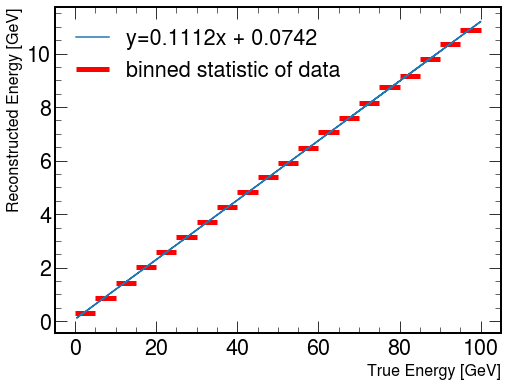

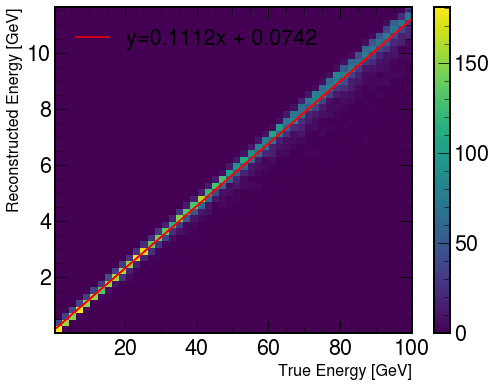

In [30]:
# calculate sfc
#binnings = np.concatenate((np.linspace(0,7,num=8), np.linspace(8, 14, num=4), np.linspace(16,20,num=2),np.array([25, 35, 50, 70, 100])))
binnings = np.linspace(0,100,21)
bin_avg,    bin_edges, binnumber = binned_statistic(particle_energy, event_energy, statistic='mean', bins=binnings, range=(0,100))
bincenters = np.array([0.5 * (binnings[i] + binnings[i+1]) for i in range(len(binnings)-1)])

plt.figure(figsize=(8,6))
plt.hlines(bin_avg, bin_edges[:-1], bin_edges[1:], colors='r', lw=5,
           label='binned statistic of data', linestyles='solid')
#plt.scatter(particle_energy,event_energy,c='red')
plt.xlabel('True Energy [GeV]',size=16)
plt.ylabel('Reconstructed Energy [GeV]',size=16)

particle_energy_array = np.array(particle_energy)
event_energy_array = np.array(event_energy)
m,b = np.polyfit(particle_energy_array,event_energy_array,1)
#m,b = np.polyfit(bincenters,bin_avg,1)
plt.plot(particle_energy_array, m*particle_energy_array + b,label='y={:.4f}x + {:.4f}'.format(m,b))
plt.legend()
print(m)
print(b)
sfc = m
plt.savefig('Sampling Fraction Correction Plot',facecolor='white',edgecolor='white',bbox_inches='tight')

plt.figure(figsize=(8,6))
plt.hist2d(particle_energy,event_energy,bins=50)
plt.colorbar()
plt.ylabel('Reconstructed Energy [GeV]',size=16)
plt.xlabel('True Energy [GeV]',size=16)

plt.plot(particle_energy_array, m*particle_energy_array + b,label='y={:.4f}x + {:.4f}'.format(m,b),c='red')
plt.legend()
plt.savefig('Photon: True vs Reco Energy',facecolor='white',edgecolor='white',bbox_inches='tight')

In [31]:
# energy resolution data
truth_energy = np.array(particle_energy)
reco_energy = np.array(event_energy)
cluster_energy_array = np.array(cluster_energies)

energy=[energy_10,energy_20,energy_30,energy_40,energy_50,energy_60,energy_70,energy_80,energy_90,energy_100]

def func(x, a,b,c): # resolution function
    return np.sqrt((a**2) + (b**2)/x + (c**2)/np.sqrt(x))

def func1(x, A, mu, sig): # gaussian function
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
        
def fitdata(data): # fits data to gaussian function to get mean and std
    n, bin_edges = np.histogram(data, bins=50, density=True)
    mask = n!=0
    bincenters = np.asarray([(bin_edges[i]+bin_edges[i+1])/2.0 for i in range(bin_edges.shape[0]-1)])
    plt.hist(data,
            bins = 50,
            range = [-50,50],
            density = True)
    plt.show()
    popt, pcov = curve_fit(func1, xdata = bincenters[mask], ydata = n[mask], sigma=np.sqrt(n[mask]),absolute_sigma=False,p0=[1,0,.5])
    return popt[1], popt[2]

sigmas = []
means = []
for energy_list in energy: # energy = list of lists, each list has reco-truth energy values for a given bin
    #print(energy_list)
    mean_fit, std_fit = fitdata(np.asarray(energy_list)) # call fitdata to get mean and sigma
    print(std_fit,mean_fit)
    sigmas.append(std_fit)
    means.append(mean_fit)

sigmas = np.array(sigmas)
means = np.array(means)

print(sigmas) # check that it worked :(

NameError: name 'energy_10' is not defined

[95.89768527 57.82059142 38.84367362 ... 82.08787246 31.75406422
 70.35558185]
[90.5348587  56.05830383 37.28092194 ... 86.01119232 30.44054222
 68.28795624]
Truth momentum range: 20,30 GeV
1020 1020
Error for parameter esimations:  [inf inf inf inf inf inf]
Standard deviation (fit) is 0.5620194459409088
Mean (fit) is 0.0759610703191439
Resolution (fit) is 7.398782607717775
[0.10105371 0.07158981 0.07596107 0.56201945 0.91920926 2.        ]


/Users/wmccorma/miniconda3/envs/Sebastian_Res/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


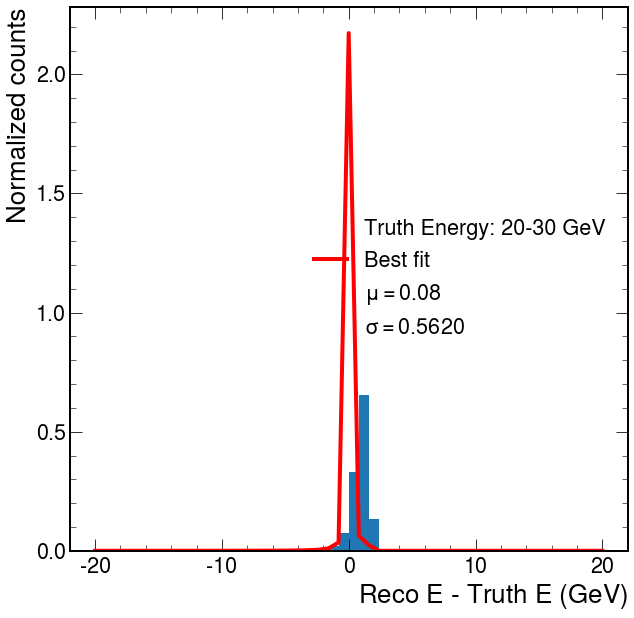

Truth momentum range: 30,40 GeV
991 991
Error for parameter esimations:  [inf inf inf inf inf inf]
Standard deviation (fit) is 0.5695983594874047
Mean (fit) is 0.06080323641267189
Resolution (fit) is 9.367895413026003
[0.08873346 0.02891241 0.06080324 0.56959836 0.8951791  2.        ]


/Users/wmccorma/miniconda3/envs/Sebastian_Res/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


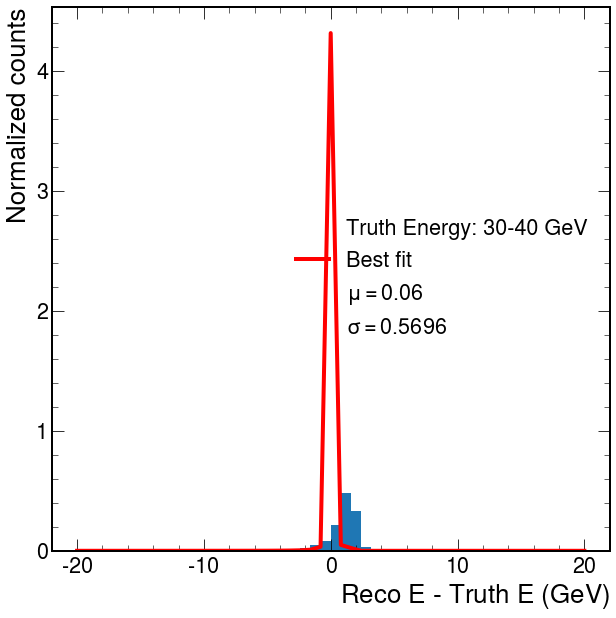

Truth momentum range: 40,50 GeV
1052 1052
Error for parameter esimations:  [inf inf inf inf inf inf]
Standard deviation (fit) is 0.6061360064033758
Mean (fit) is -0.012271099445954404
Resolution (fit) is -49.39541147661465
[-0.12939348  0.1501691  -0.0122711   0.60613601 -0.40822735  2.        ]


/Users/wmccorma/miniconda3/envs/Sebastian_Res/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


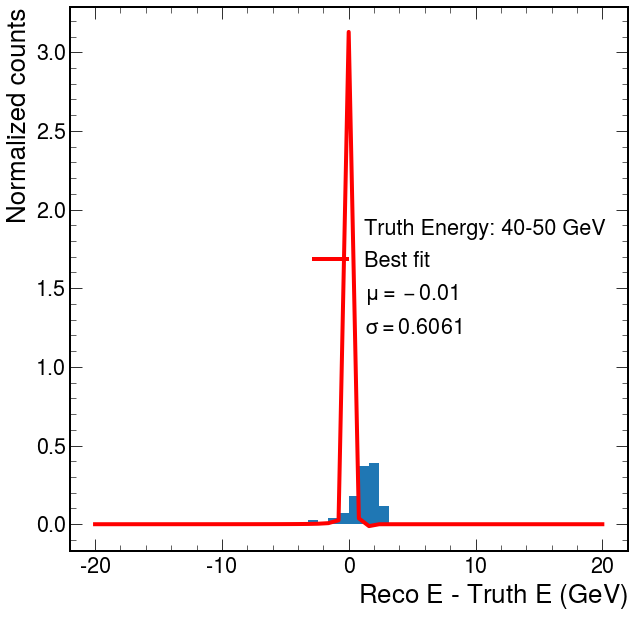

Truth momentum range: 50,60 GeV
940 940
Error for parameter esimations:  [inf inf inf inf inf inf]
Standard deviation (fit) is 0.5712386390079115
Mean (fit) is 0.05752261113789438
Resolution (fit) is 9.930679913652156
[0.07592768 0.01363147 0.05752261 0.57123864 0.86100432 2.        ]


/Users/wmccorma/miniconda3/envs/Sebastian_Res/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


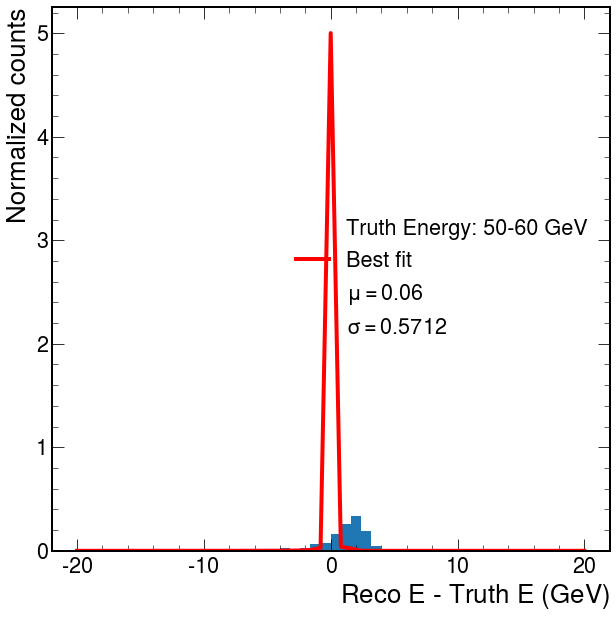

Truth momentum range: 60,70 GeV
977 977
Error for parameter esimations:  [inf inf inf inf inf inf]
Standard deviation (fit) is 0.5716071939545803
Mean (fit) is 0.05678554894097963
Resolution (fit) is 10.066067945362002
[0.06381992 0.0060423  0.05678555 0.57160719 0.832614   2.        ]


/Users/wmccorma/miniconda3/envs/Sebastian_Res/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


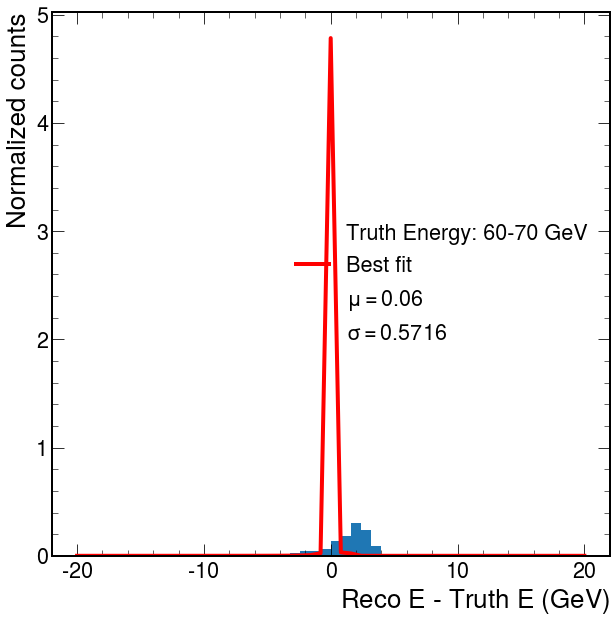

Truth momentum range: 70,80 GeV
1046 1046
Error for parameter esimations:  [1.60838960e+03 7.81982117e+03 4.49250690e+03 5.44229672e-01
 2.20731541e+04 1.89461239e+00]
Standard deviation (fit) is 0.5745023650232575
Mean (fit) is 0.05099525940648677
Resolution (fit) is 11.265799443118016
[ 0.06062775 -0.00951557  0.05099526  0.57450237  0.83204069  2.        ]


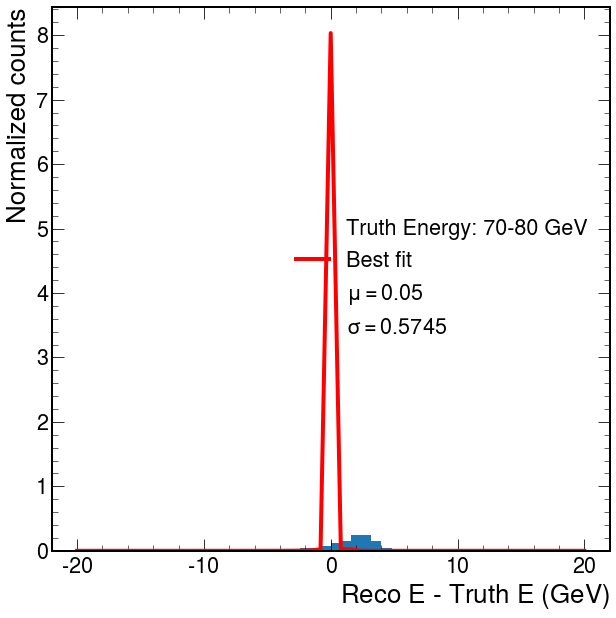

Truth momentum range: 80,90 GeV
1026 1026
Error for parameter esimations:  [inf inf inf inf inf inf]
Standard deviation (fit) is 0.5801573899920504
Mean (fit) is 0.03968508909665051
Resolution (fit) is 14.619027024964312
[ 0.05768309 -0.03660557  0.03968509  0.58015739  0.83608205  2.        ]


/Users/wmccorma/miniconda3/envs/Sebastian_Res/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


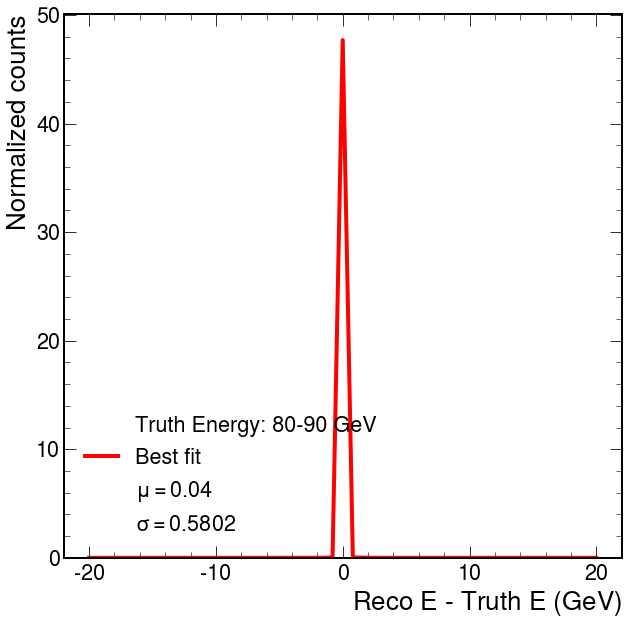

Truth momentum range: 90,100 GeV
999 999
Error for parameter esimations:  [inf inf inf inf inf inf]
Standard deviation (fit) is 0.5748661523754082
Mean (fit) is 0.05026742553942924
Resolution (fit) is 11.436156640337373
[ 0.05674494 -0.01091058  0.05026743  0.57486615  0.81636507  2.        ]


/Users/wmccorma/miniconda3/envs/Sebastian_Res/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


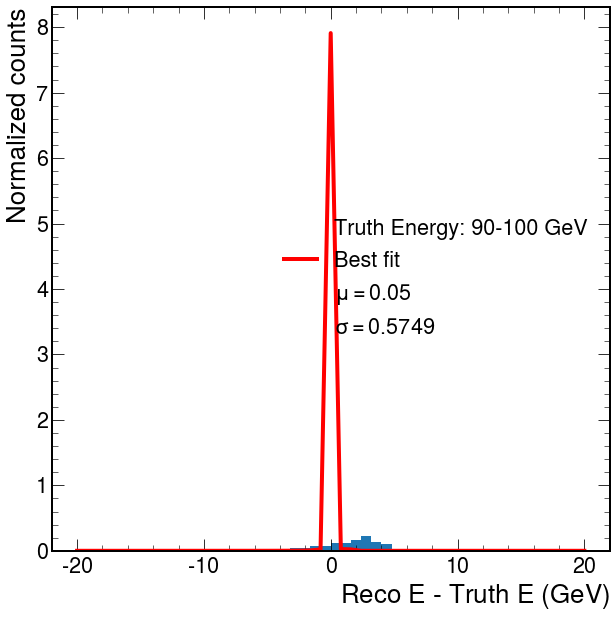

/Users/wmccorma/miniconda3/envs/Sebastian_Res/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


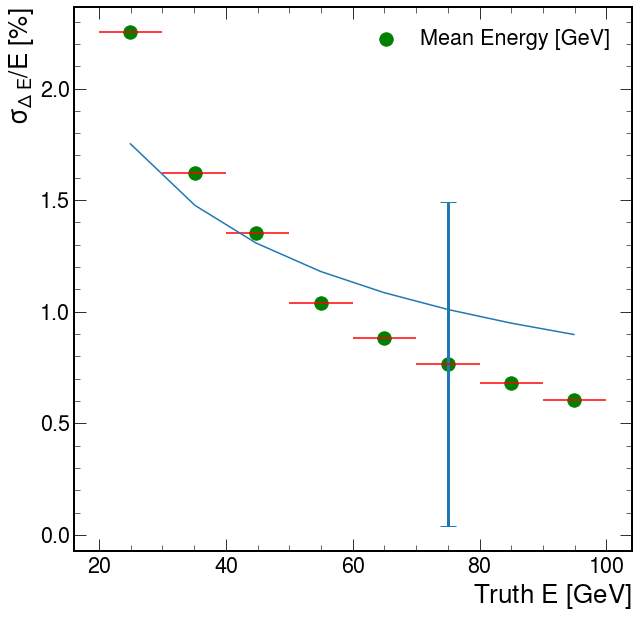

In [32]:
truth_energy = np.array(particle_energy)
reco_energy = np.array(event_energy) / sfc
cluster_energy_array = np.array(cluster_energies)

#print(event_energy)
print(reco_energy)
print(truth_energy)

def func(x, a,b,c): # resolution function
    return np.sqrt((a**2) + (b**2)/x + (c**2)/np.sqrt(x))

e_resolution = [] #To save the resolution (sigma) of the fit
e_average = []
e_ranges = []
e_err = []
    
#Specify the ranges to calculate the resolution in 
for i in [2,3,4,5,6,7,8,9]:
        
    hist_range = [-20,20]
        
    e_range = 10
    e_min = i*e_range #GeV
    e_max = (i+1)*e_range
    e_ranges.append([e_min,e_max]) #Save for resolution later
        
    print("Truth momentum range: {},{} GeV".format(e_min, e_max))
        
    local_selection = (truth_energy >= e_min) & (truth_energy < e_max)
    e_average.append(np.mean(truth_energy[local_selection]))
        
    e_residual = copy.deepcopy(reco_energy[local_selection] - truth_energy[local_selection])
    print(len(reco_energy[local_selection]),len(truth_energy[local_selection]))
    
    #hist_range=[min(e_residual)-2,max(e_residual)+2]
        
    if e_residual.size != 0:
        
        #Initial distribution and labelling
        plt.hist(e_residual,
                bins = 50,
                range = hist_range,
                density = True)
        plt.plot([],[], 'none', label="Truth Energy: {}-{} GeV".format(e_min, e_max))

        ## Gaussian fit
        ## Fit directly on the histogram
        def fit_function(x, A, mu, sig):
            return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
        
        def logistic(x, mu, sig):
            return (np.exp(-(x-mu)/sig)) / (sig*np.power((1+np.exp(-(x-mu)/sig)),2.))
        
        def cauchy(x,mu,sig):
            return (1) / (np.pi*sig*(1+np.power((x-mu)/sig,2)))
        
        def crystal_ball(x, A, B, mu, sig, N,a):
            y = np.piecewise(x,
                            [(x-mu)/sig > a, (x-mu)/sig <= a],
                            [lambda x: N*np.exp(-np.power(x-mu,2.) / (2*np.power(sig,2.))) ,
                             lambda x: N*A*np.power(B-((x-mu)/sig),-2)])
            return y

        bins = np.linspace(hist_range[0], hist_range[1], 51)
        binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
        data_entries, _ = np.histogram(e_residual, bins=bins,
                                           range = hist_range, density = True)

        mask = data_entries!=0
        #Fit the function to the histogram data.
        #popt, pcov = curve_fit(fit_function,
                                #xdata=binscenters[mask],
                                #ydata=data_entries[mask],
                                #sigma = np.sqrt(data_entries[mask]),
                                #absolute_sigma = False,
                                #p0=[1, 0, 0.5])

        popt, pcov = curve_fit(crystal_ball,
                                xdata=binscenters[mask],
                                ydata=data_entries[mask],
                                sigma = np.sqrt(data_entries[mask]),
                                absolute_sigma = False,
                                p0=[.15, 0.0, 0.0, 0.5,1.,2.],
                                maxfev=40000)

        #Error for parameter estimations
        err = np.sqrt(np.diag(pcov))
        print("Error for parameter esimations: ", err)
        #e_err.append(err[2])
        e_err.append(err[3])

        #std_fit = np.abs(popt[2])
        std_fit = np.abs(popt[3])
        #mean_fit = popt[1]
        mean_fit = popt[2]
        res_fit = std_fit/mean_fit
        #sigma_res = err[2]/mean_fit
        sigma_res = err[3]/mean_fit
        print("Standard deviation (fit) is", std_fit)
        print("Mean (fit) is", mean_fit)
        print("Resolution (fit) is {}".format(res_fit))
        e_resolution.append(std_fit)

        #Plot fitted gaussian
        #plt.plot(bins,
                #fit_function(bins, *popt),
                #"r-",
                #linewidth=4,
                #label='Best fit')
        
        print(popt)
        plt.plot(bins,
                crystal_ball(bins, *popt),
                "r-",
                linewidth=4,
                label='Best fit')

        #plt.plot([],[], 'none', label=r'$\mu=%.2f$'%popt[1])
        #plt.plot([],[], 'none', label=r'$\sigma=%.4f$'%popt[2])
        
        plt.plot([],[], 'none', label=r'$\mu=%.2f$'%popt[2])
        plt.plot([],[], 'none', label=r'$\sigma=%.4f$'%popt[3])

        #Label the axes
        plt.xlabel(r'Reco $E$ - Truth $E$ (GeV)')
        plt.ylabel('Normalized counts')

        plt.legend()
        fig = plt.gcf()
        plt.show()
        #fig.savefig('{}-{} GeV'.format(e_min,e_max),facecolor='white',edgecolor='white',bbox_inches='tight')

#MAIN PLOT
#Plot momentum average
#plt.scatter(p_average, p_resolution, s=180, c='#2ca02c', label = "Average p [GeV]", zorder = 10)
    
#Plot the resolution based on energy range.
plt.scatter(e_average,
            [x/y*100 for x, y in zip(e_resolution, e_average)],
            s = 180,
            label='Mean Energy [GeV]',
            c='green')

#Plot the error bars
plt.errorbar(e_average,
            [x/y*100 for x, y in zip(e_resolution, e_average)],
            yerr=[x/y*100 for x, y in zip(e_err, e_average)],
            fmt='none',
            elinewidth=3,
            capsize=8)

#Plot the bins
plt.hlines([x/y*100 for x, y in zip(e_resolution, e_average)],
            [e_range[0] for e_range in e_ranges],
            [e_range[1] for e_range in e_ranges],
            colors='red')

#Plot resolution function
popt, pcov = curve_fit(func,
                        xdata=e_average,
                        ydata=[x/y*100 for x, y in zip(e_resolution, e_average)],
                        )
plt.plot(e_average,func(e_average,*popt),
        #label='{:.3f}+$\frac{{:.3f}}{<E>} + \frac{{:.3f}}{\sqrt{<E>}}$'.format(*popt)
        )

#Label axes
plt.xlabel(r'Truth $E$ [GeV]')
plt.ylabel(r'$\sigma_{\Delta~E}/E$ [%]')
    
plt.legend()
fig = plt.gcf()
plt.show()

#fig.savefig('Photon 1910cm: Energy Resolution',facecolor='white',edgecolor='white',bbox_inches='tight')


[[Model]]
    Model(crystal_ball)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 91
    # data points      = 50
    # variables        = 5
    chi-square         = 0.11575162
    reduced chi-square = 0.00257226
    Akaike info crit   = -293.416580
    Bayesian info crit = -283.856465
[[Variables]]
    A:    0.05906850 +/- 811.329597 (1373540.14%) (init = 0.15)
    B:   -0.01554662 +/- 8456.36679 (54393601.84%) (init = 0)
    mu:   0.04891402 +/- 4852.98721 (9921463.83%) (init = 0)
    sig:  0.57554101 +/- 900.353817 (156436.09%) (init = 0.5)
    N:    0.76855297 +/- 8151.79299 (1060667.68%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(B, mu)   = -1.000
    C(A, mu)   =  1.000
    C(A, B)    = -1.000
    C(A, N)    = -1.000
    C(mu, N)   = -1.000
    C(B, N)    =  1.000
    C(B, sig)  =  1.000
    C(mu, sig) = -1.000
    C(A, sig)  = -1.000
    C(sig, N)  =  1.000


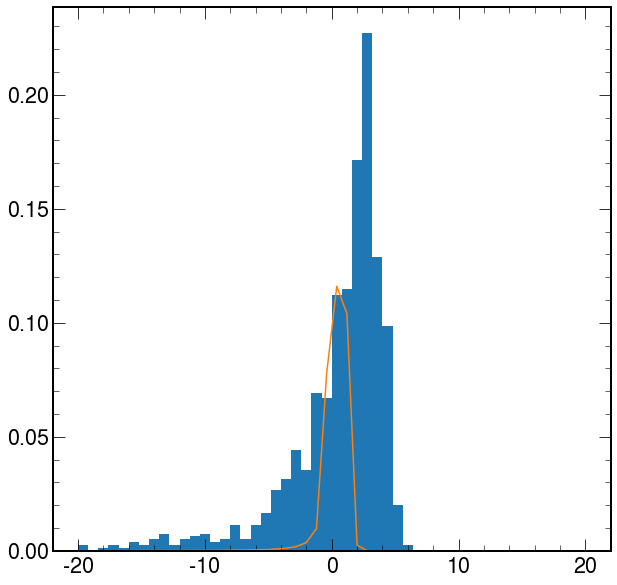

In [33]:
# try using lmfit instead
def crystal_ball(x, A, B, mu, sig, N):
            y = np.piecewise(x,
                            [(x-mu)/sig > 2, (x-mu)/sig <= 2],
                            [lambda x: N*np.exp(-np.power(x-mu,2.) / (2*np.power(sig,2.))) ,
                             lambda x: N*A*np.power(B-((x-mu)/sig),-2)])
            return y
cbmodel = Model(crystal_ball)
result = cbmodel.fit(data_entries,
                    x=binscenters,
                    A = .15,
                    B = 0.0,
                    mu= 0.0,
                    sig = 0.5,
                    N = 1)

print(result.fit_report())
plt.figure()
plt.hist(e_residual,
        bins = 50,
        range = hist_range,
        density = True)
plt.plot(binscenters, result.best_fit)

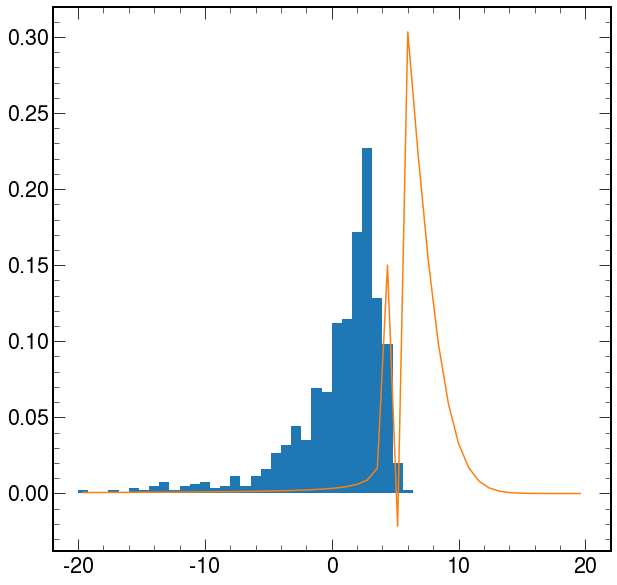

In [34]:
# test if initial values are a good guess
def crystal_ball(x, A, B, mu, sig, N):
        y = np.piecewise(x,
                        [(x-mu)/sig > 1, (x-mu)/sig <= 1],
                        [lambda x: N*np.exp(-np.power(x-mu,2.) / (2*np.power(sig,2.))) ,
                        lambda x: N*A*np.power(B-((x-mu)/sig),-1)])
        return y

plt.figure()
plt.hist(e_residual,
        bins = 50,
        range = hist_range,
        density = True)
plt.plot(binscenters, crystal_ball(binscenters,.01,.5,3,3,.5))

999


(array([0.0025227 , 0.        , 0.00126135, 0.0025227 , 0.00126135,
        0.00378406, 0.0025227 , 0.00504541, 0.00756811, 0.0025227 ,
        0.00504541, 0.00630676, 0.00756811, 0.00378406, 0.00504541,
        0.01135217, 0.00504541, 0.01135217, 0.01639758, 0.0264884 ,
        0.0315338 , 0.04414733, 0.03531786, 0.06937437, 0.06685166,
        0.11226034, 0.11478305, 0.1715439 , 0.22704339, 0.12865792,
        0.09838547, 0.02018163, 0.0025227 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([-20. , -19.2, -18.4, -17.6, -16.8, -16. , -15.2, -14.4, -13.6,
        -12.8, -12. , -11.2, -10.4,  -9.6,  -8.8,  -8. ,  -7.2,  -6.4,
         -5.6,  -4.8,  -4. ,  -3.2,  -2.4,  -1.6,  -0.8,   0. ,   0.8,
          1.6,   2.4,   3.2,   4. ,   4.8,   5.6,   6.4,   7.2,   8. ,
          8.8,   9.6,  10.4,  11.2

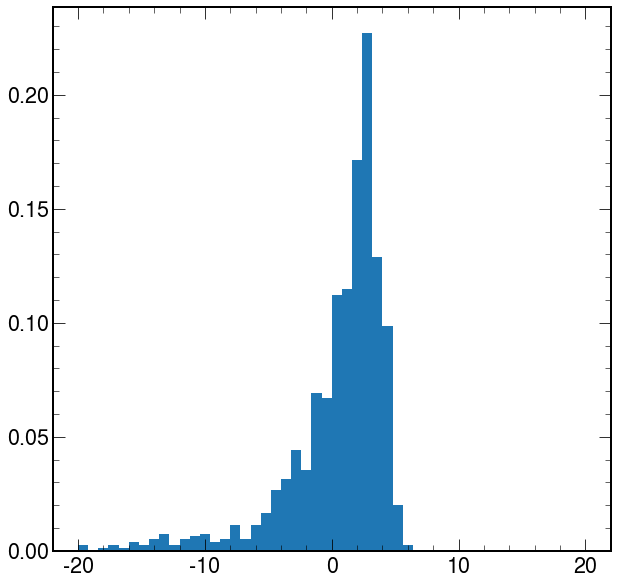

In [35]:
plt.figure()
print(np.size(e_residual))
plt.hist(e_residual,
        bins = 50,
        range = hist_range,
        density = True)

In [36]:
test_hist = ROOT.TH1F('res1','',50,-20,20)
for eres in e_residual:
    test_hist.Fill(eres)

In [37]:
#crfun = ROOT.TF1('fitFunction', ROOT.Math.crystalball_function(1,2,1,1,0), -20, 20)
f1 = ROOT.TF1('fitFunction', "crystalball", -20, 20)
#f1 = ROOT.TF1('fitFunction', "ROOT::Math::crystalball_function(x, 2, 1, 1, 1)", -20, 20)
f1.SetParameters(100, 1, 1, 1, 1);
#crfun = ROOT.Math.crystalball_function(x[0], par[0], par[1], par[2], par[3])

In [38]:
test_hist.Fit(f1, 'S')

 FCN=38.7549 FROM MIGRAD    STATUS=CONVERGED     307 CALLS         308 TOTAL
                     EDM=8.00531e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.64694e+02   7.93793e+00   6.56469e-03   1.50950e-05
   2  Mean         2.69179e+00   1.01999e-01  -4.31987e-05   1.57529e-03
   3  Sigma        1.17373e+00   6.36435e-02   1.81008e-07   1.55145e-03
   4  Alpha        4.81102e-01   6.30670e-02   9.59095e-06  -1.84905e-03
   5  N            5.53569e+00   1.96493e+00   5.52367e-04  -3.53332e-05


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


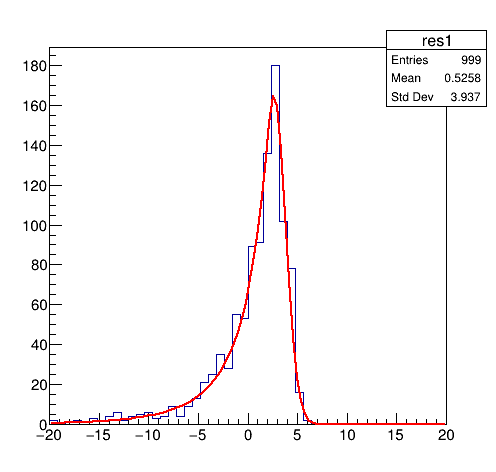

In [39]:
can1 = ROOT.TCanvas('a','a', 500, 500)
test_hist.Draw()
f1.Draw('same')
can1.Draw()